In [1]:
from ROOT import *
import warnings
import pandas as pd
from HEPAnalysis.Analysis import DelphesSignal

Welcome to JupyROOT 6.22/06


In [2]:
warnings.filterwarnings("ignore")
from multiprocessing import Pool
signal_list=["SingleLQ_0500", "SingleLQ_1000", "SingleLQ_1500", "SingleLQ_2000", 
             "SingleLQ_2500", "SingleLQ_3000", "SingleLQ_3500"]
bkg_list=["bkg_ttbar","bkg_DYw","bkg_DYz","bkg_DBww","bkg_DBzz"] #"bkg_DBwz" 


signal_list+=bkg_list

def f(name):
    a=DelphesSignal(name).eventSelection()
    return name, a

with Pool(8) as p:
    histoList_dict=dict(p.map(f,signal_list))

SingleLQ_3500 imported!
500000 events have been loaded from
/disco4/SIMULACIONES/Cristian/Madgraph/Single_LQ/Single_vlq_mlq3500

SingleLQ_0500 imported!
500000 events have been loaded from
/disco4/SIMULACIONES/Cristian/Madgraph/Single_LQ/Single_vlq_mlq500

SingleLQ_3500   0% (     0/500000) [                         ] eta --:-- /
SingleLQ_2500 imported!
500000 events have been loaded from
/disco4/SIMULACIONES/Cristian/Madgraph/Single_LQ/Single_vlq_mlq2500

SingleLQ_1000 imported!
500000 events have been loaded from
/disco4/SIMULACIONES/Cristian/Madgraph/Single_LQ/Single_vlq_mlq1000

SingleLQ_2500   0% (     0/500000) [                         ] eta --:-- /
SingleLQ_2000 imported!
500000 events have been loaded from
/disco4/SIMULACIONES/Cristian/Madgraph/Single_LQ/Single_vlq_mlq2000

SingleLQ_0500   0% (     0/500000) [                         ] eta --:-- /
SingleLQ_1000   0% (     0/500000) [                         ] eta --:-- /
SingleLQ_3000 imported!
500000 events have been loaded f

    %%  TToottaall        %%  RReecceeiivveedd  %%  XXffeerrdd    AAvveerraaggee  SSpepeede d    T iTmime    Time     Time  Current
     e         T i m e            T i m e     C u r r e n t 
D l o a d     U p l o a d       T o t a l       S p e n t         LDelfota d  S pUepeldo
T o t0a l       S0p e n t  0      L e f0t     S p0e e d 
     0    0      0      0  0- - : - - :0- -   - -0: - - : - -0  - - : - - :0- -          00 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  % Total    % Received % Xferd  Average Speed   Time    Time    

In [3]:
e_dataDict = dict.fromkeys(signal_list)
m_dataDict = dict.fromkeys(signal_list)

for name in signal_list:
    e_dataDict[name] = pd.read_csv('DataFiles/'+name+'_electrons.csv')
    m_dataDict[name] = pd.read_csv('DataFiles/'+name+'_muons.csv')

In [4]:
observables = {'Pt' : ('p_{T}', 'p_{T} (GeV)', 30, 0., 1500.),
               'eta': ('#eta', '#eta', 20, -5., 5.),
               'phi': ('#phi', '#phi (rad)', 20, -3.5, 3.5),
               'M': ('M', 'Reconstructed Mass (GeV)', 40, 0., 3500.),
               'DeltaEta': ('#Delta#eta', '#Delta#eta', 40, -5., 5.),
               'DeltaPhi': ('#Delta#phi', '#Delta#phi (rad)', 28, -3.5, 3.5),
               'vDeltaPT': ('#Delta#vec{p}_{T}', '#Delta p_{T} (GeV)', 40, 0., 2000.),
               'sDeltaPT': ('#Delta p_{T}', '#Delta p_{T} (GeV)', 40, -1000., 1000.),
               'vDeltaP': ('#Delta#vec{p}', '#Delta p (GeV)', 40, 0., 2000.)
              }

def defineHisto(lst, name, title, x_label, y_label, bins, lo, hi):
    h=TH1F(name, "{}; {}; {}".format(title, x_label, y_label), bins, lo, hi)
    h.SetDirectory(0)
    lst.Add(h)

for name in signal_list:
    histo_list = histoList_dict[name]
    e_data = e_dataDict[name]
    m_data = m_dataDict[name]
    
    for col in list(e_data.columns):
        for key in observables.keys():
            if key in col:
                params = observables[key]
                title = col.replace(' ', ',')
                title = title.replace(key, params[0])
                j = title.find('lpt')
                if j == -1:
                    title += ' (lpt channel)'
                i = title.find('tau')
                if i != -1:
                    title = title[:i]+'#'+title[i:]
                title1 = title.replace('lpt', 'e')
                title2 = title.replace('lpt', '#mu')
                
                defineHisto(histo_list, 'e_'+col, title1, params[1], 'a.u.', *params[2:])
                defineHisto(histo_list, 'm_'+col, title2, params[1], 'a.u.', *params[2:])
                
                for entry in e_data[col]:
                    histo_list.FindObject('e_'+col).Fill(entry)
                    
                for entry in m_data[col]:
                    histo_list.FindObject('m_'+col).Fill(entry)
                
                break

In [5]:
def writeList(name):
    !rm -rf ROOTFiles+{name}.root
    f =TFile('ROOTFiles/'+name+".root","RECREATE")
    histoList_dict[name].Write("histlist", TObject.kSingleKey)
    f.ls()
    print(name+" Done!")
    
try:
    !mkdir ROOTFiles
except:
    pass
for name in signal_list:
    writeList(name)

SingleLQ_0500 Done!
SingleLQ_1000 Done!
SingleLQ_1500 Done!
SingleLQ_2000 Done!
SingleLQ_2500 Done!
SingleLQ_3000 Done!
SingleLQ_3500 Done!
bkg_ttbar Done!
bkg_DYw Done!
bkg_DYz Done!
bkg_DBww Done!
bkg_DBzz Done!
TFile**		ROOTFiles/SingleLQ_0500.root	
 TFile*		ROOTFiles/SingleLQ_0500.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_1000.root	
 TFile*		ROOTFiles/SingleLQ_1000.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_1500.root	
 TFile*		ROOTFiles/SingleLQ_1500.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_2000.root	
 TFile*		ROOTFiles/SingleLQ_2000.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_2500.root	
 TFile*		ROOTFiles/SingleLQ_2500.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_3000.root	
 TFile*		ROOTFiles/SingleLQ_3000.root	
  KEY: TList	histlist;1	Doubly linked list
TFile**		ROOTFiles/SingleLQ_3500.root	
 TFile*		ROOTFiles/Si

In [10]:
import os
from ROOT import *
current_path = os.getcwd()
current_path += '/ROOTFiles/'
files=next(os.walk(current_path))[2]
files.sort()
print(current_path)

try:
    !mkdir Histos
except:
    pass
names=[]
for file in files:
    if ".root" in file:
        names+=[file.removesuffix('.root')]
names.sort()
print(names)
colors = [kViolet-6, kAzure-3, kTeal, kSpring-1, kOrange-3, kRed-4, kBlack,
          kViolet-6, kAzure-3, kTeal, kSpring-1, kOrange-3, kRed-4]
linestyles = [1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10]

f =TFile.Open('ROOTFiles/'+names[0]+".root")
histlist=f.Get("histlist")
plots = []
for h in histlist:
    plots.append(h.GetName())
l=TList()
for i, plot in enumerate(plots) :
    hs = THStack("hs", plot)
    c2 = TCanvas(plot,"Histos",1280,1024)
    c2.SetGrid()
    x_1 = 0.65
    x_2 = 0.89
    legend = TLegend(x_1,0.55,x_2,0.89)
    for j,name in enumerate(names):
        f =TFile.Open('ROOTFiles/'+name+".root")
        histlist=f.Get("histlist")
        h=histlist.FindObject(plot)
        h.SetDirectory(0)
        h.SetLineColor(colors[j])
        h.SetLineStyle(linestyles[j])
        h.SetLineWidth(2)
        
        if (plots[i]=="e-cutflow" or plots[i]=="mu-cutflow"):
            c2.SetLogy()
            legend.SetX1(0.12)
            legend.SetY2(0.52)
            legend.SetY1(0.12)
            legend.SetX2(0.37)
            gbin=h.GetBin(1)
            scale=1./h.GetBinContent(gbin)
            h.Scale(scale)
        else:
            integral=h.Integral()
            if not(integral==0):
                h.Scale(1.0/integral)
        legend.AddEntry(h,name,"l")
        legend.SetBorderSize(0)
        hs.Add(h)
        xlabel=h.GetXaxis().GetTitle()
        title=h.GetTitle()
    hs.Draw("NOSTACK HIST")
    hs.SetTitle(title)
    hs.GetXaxis().SetTitle(xlabel)
    hs.GetYaxis().SetTitle("a.u.")
    legend.Draw()
    l.Add(c2)
    c2.SaveAs('Histos/'+plot+".png")
    c2.SaveAs('Histos/'+plot+".pdf")

/root/nootebooks/FullAnalysis/ROOTFiles/
mkdir: cannot create directory ‘Histos’: File exists
['SingleLQ_0500', 'SingleLQ_1000', 'SingleLQ_1500', 'SingleLQ_2000', 'SingleLQ_2500', 'SingleLQ_3000', 'SingleLQ_3500', 'bkg_DBww', 'bkg_DBzz', 'bkg_DYw', 'bkg_DYz', 'bkg_ttbar']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: e-cutflow
Info in <TCanvas::Print>: png file Histos/e-cutflow.png has been created
Info in <TCanvas::Print>: pdf file Histos/e-cutflow.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: mu-cutflow
Info in <TCanvas::Print>: png file Histos/mu-cutflow.png has been created
Info in <TCanvas::Print>: pdf file Histos/mu-cutflow.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: n_jets
Info in <TCanvas::Print>: png file Histos/n_jets.png has been created
Info in <TCanvas::Print>: pdf file Histos/n_jets.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: n_good_jets
Info in <TCanvas::Print>: png file Histos/n_good_jets.png has been created
Info in <TCanvas::Print>: pdf file Histos/n_good_jets.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: e_M(b+tau)
Info in <TCanvas::Print>: png 

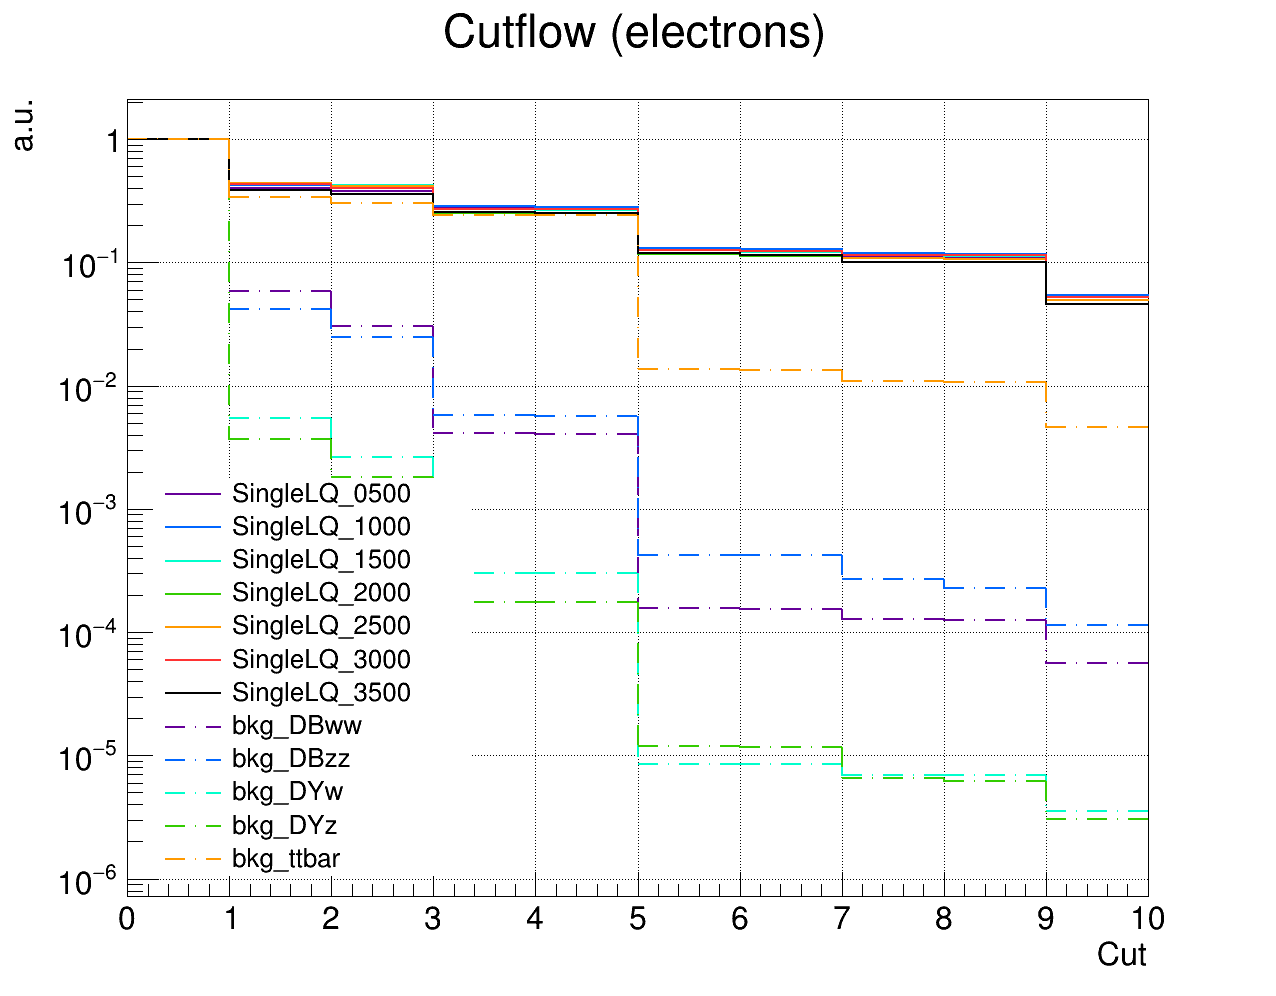

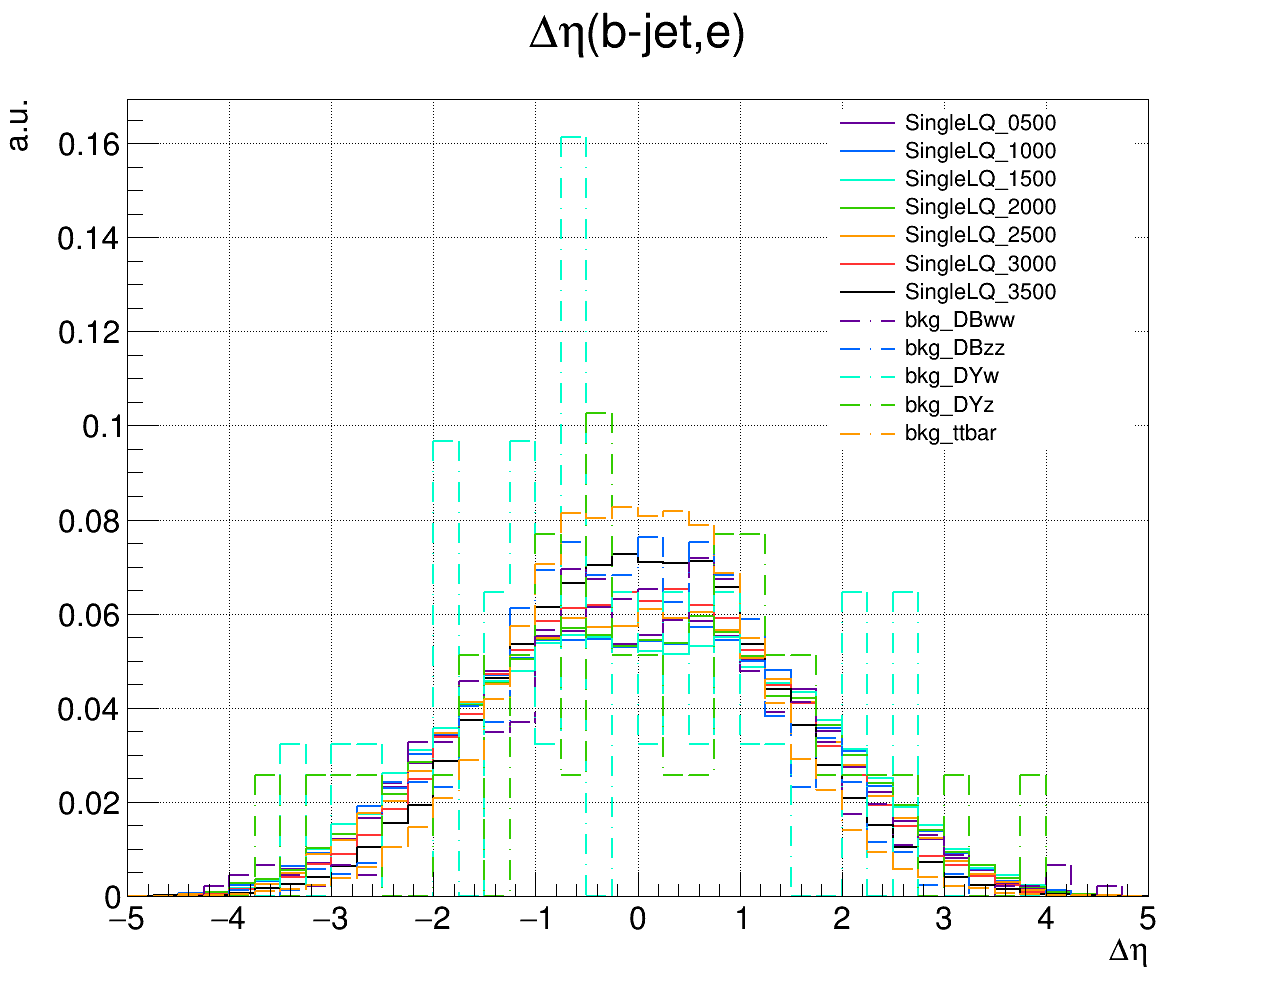

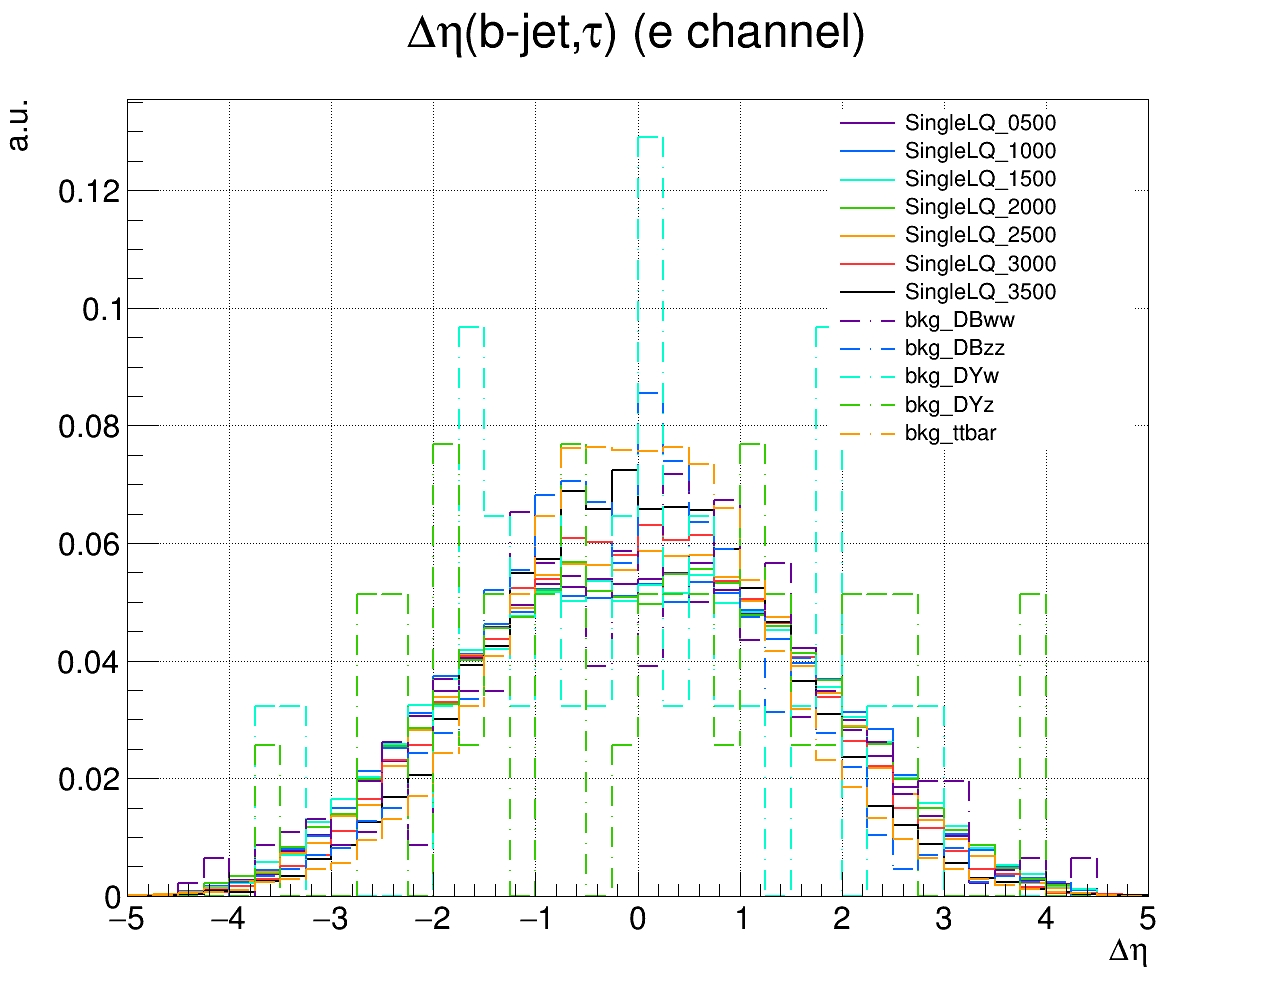

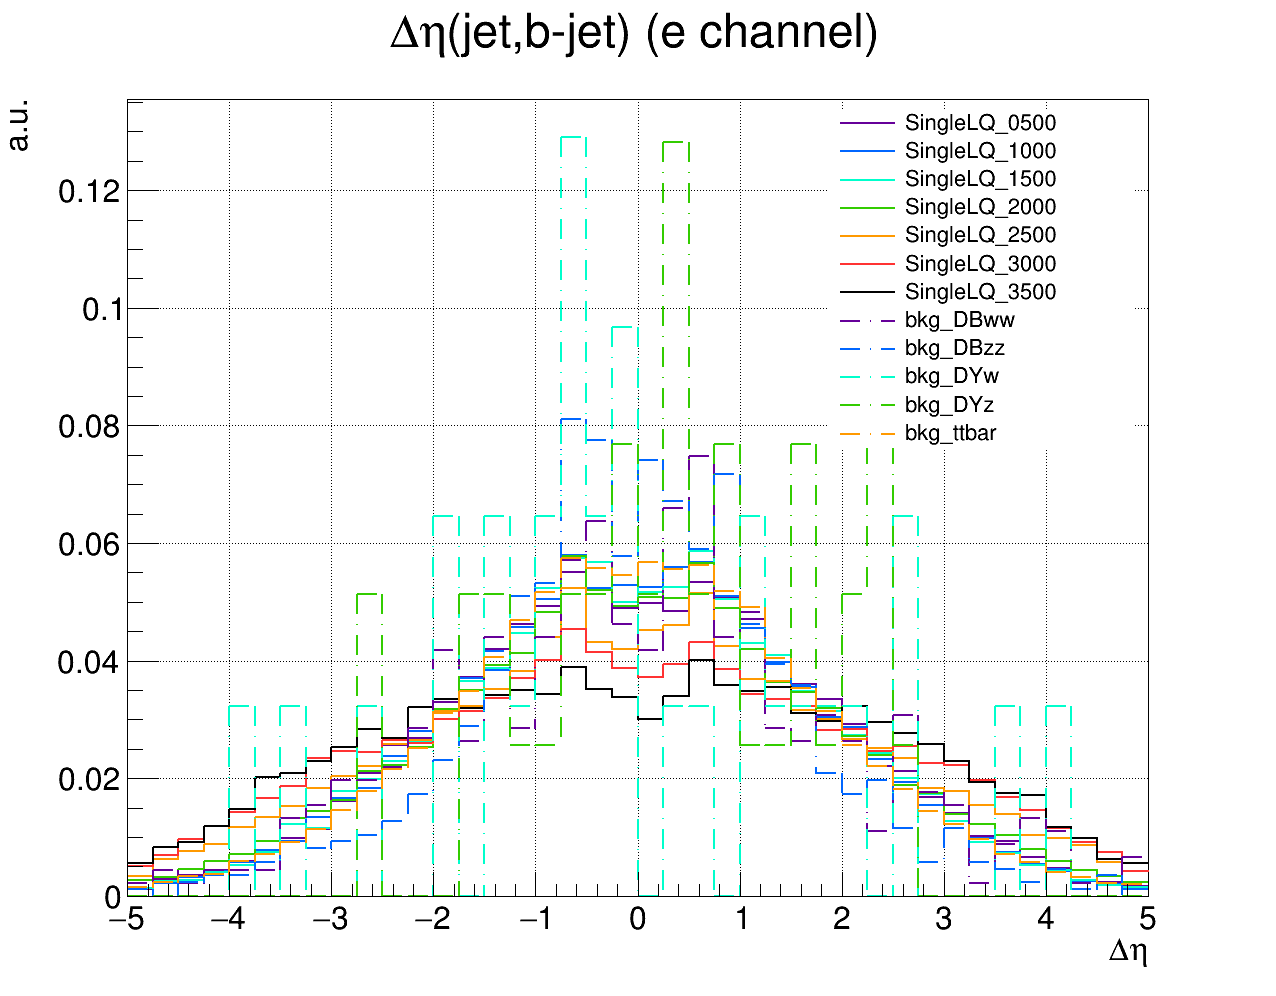

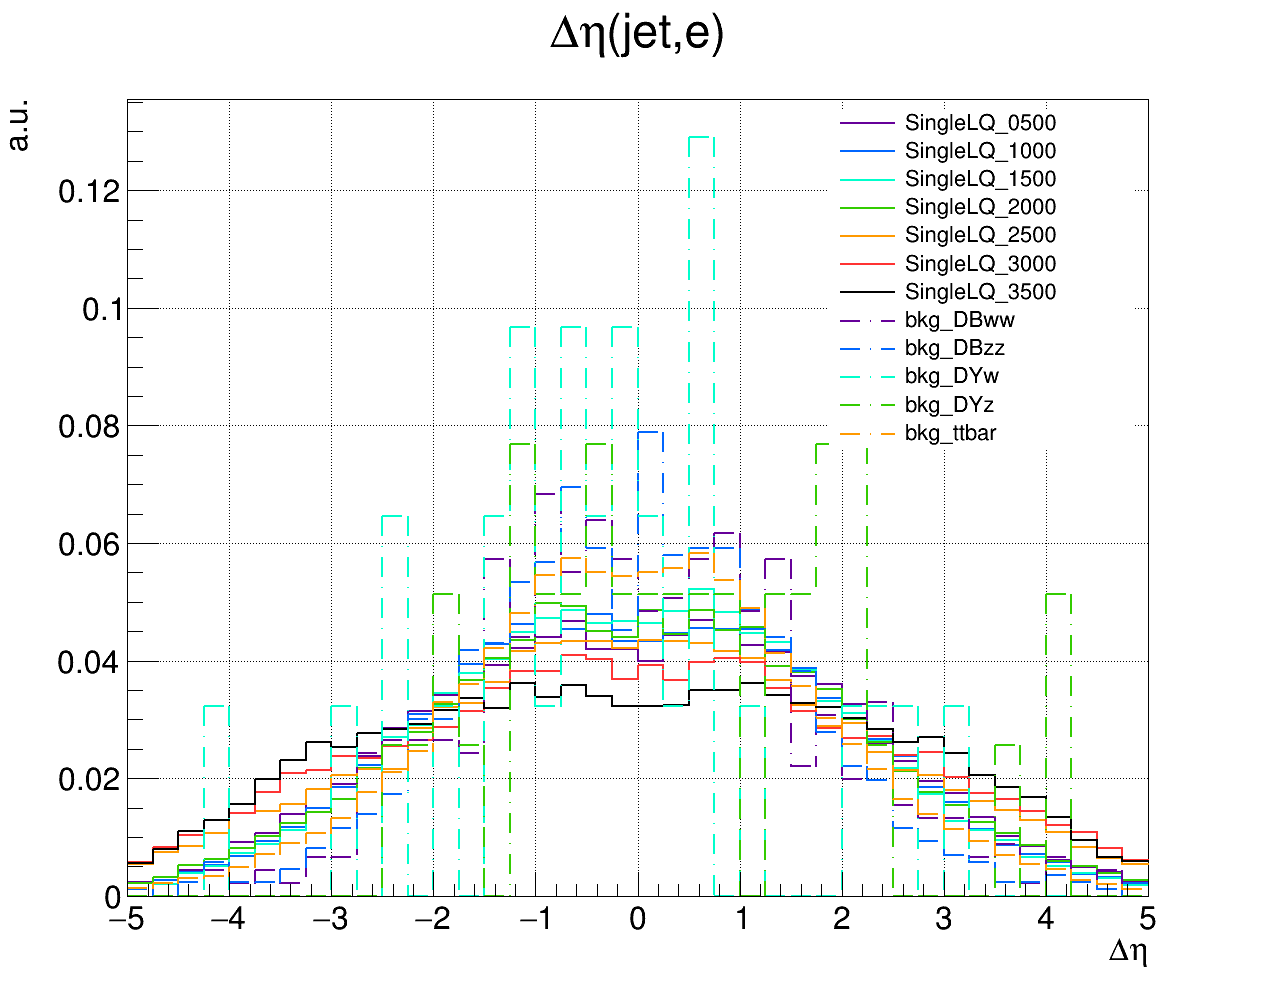

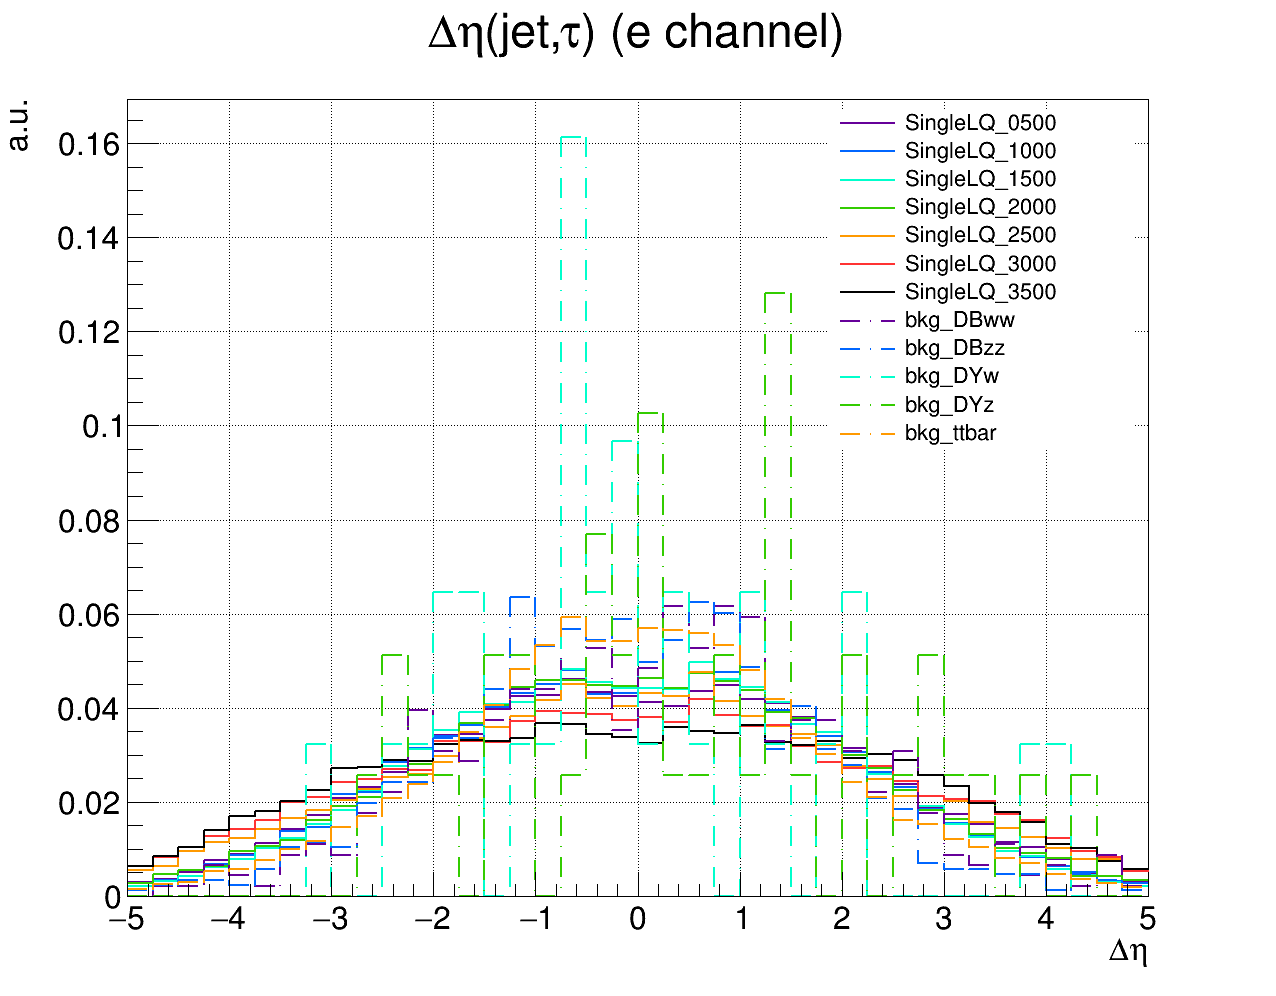

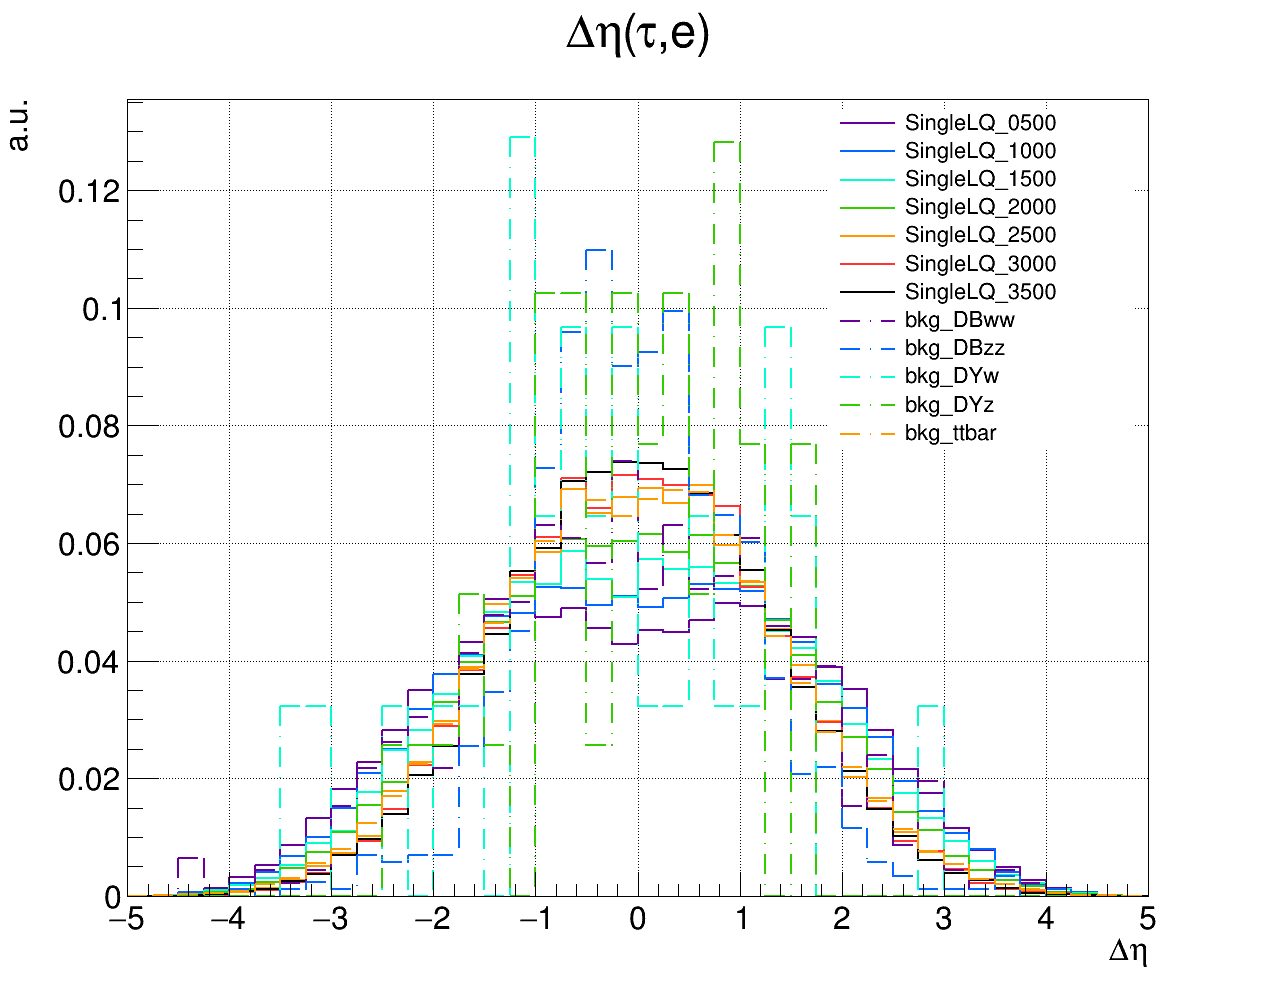

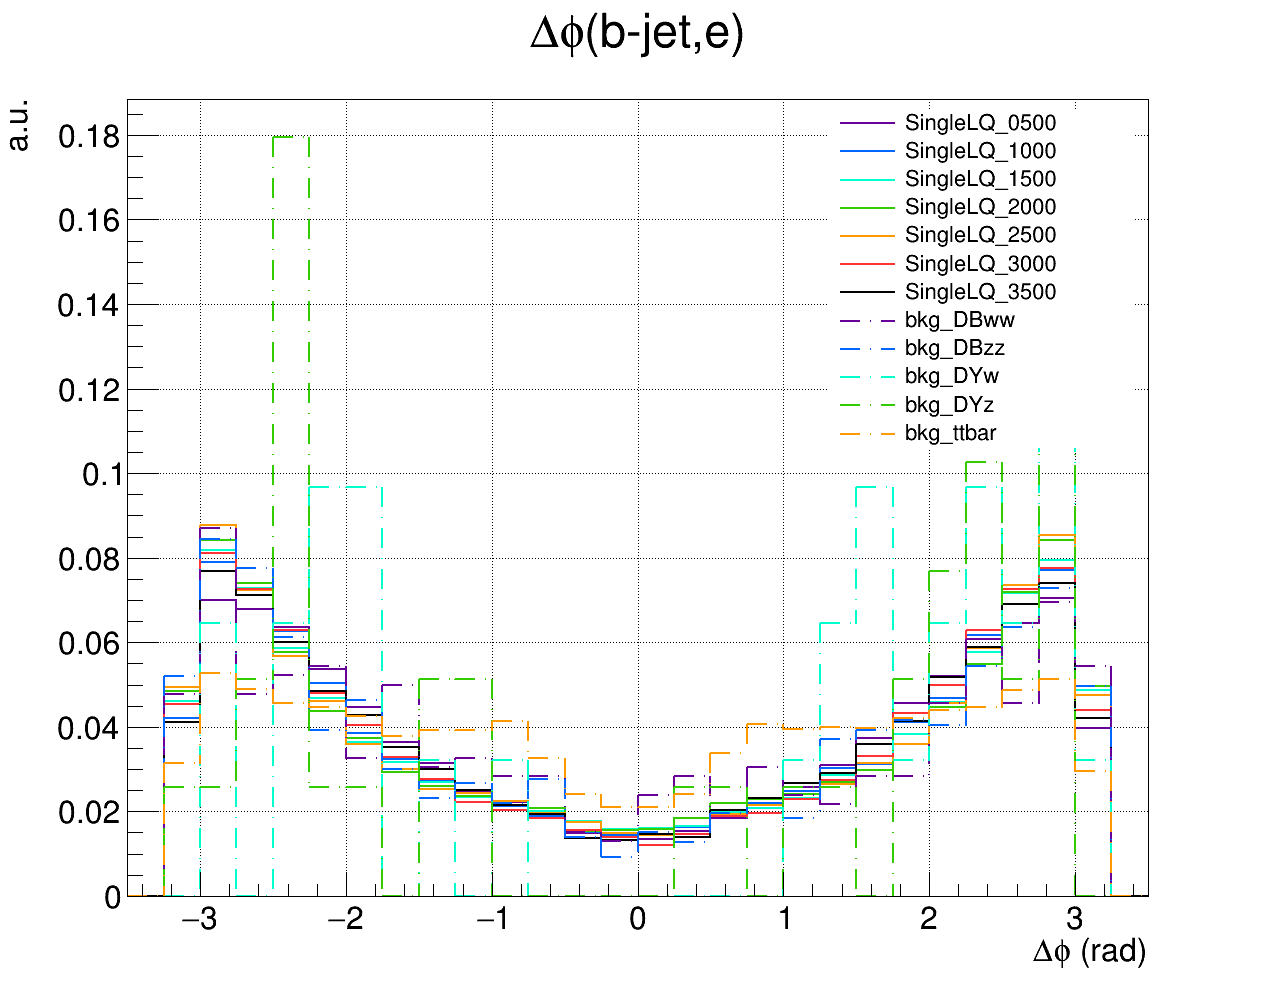

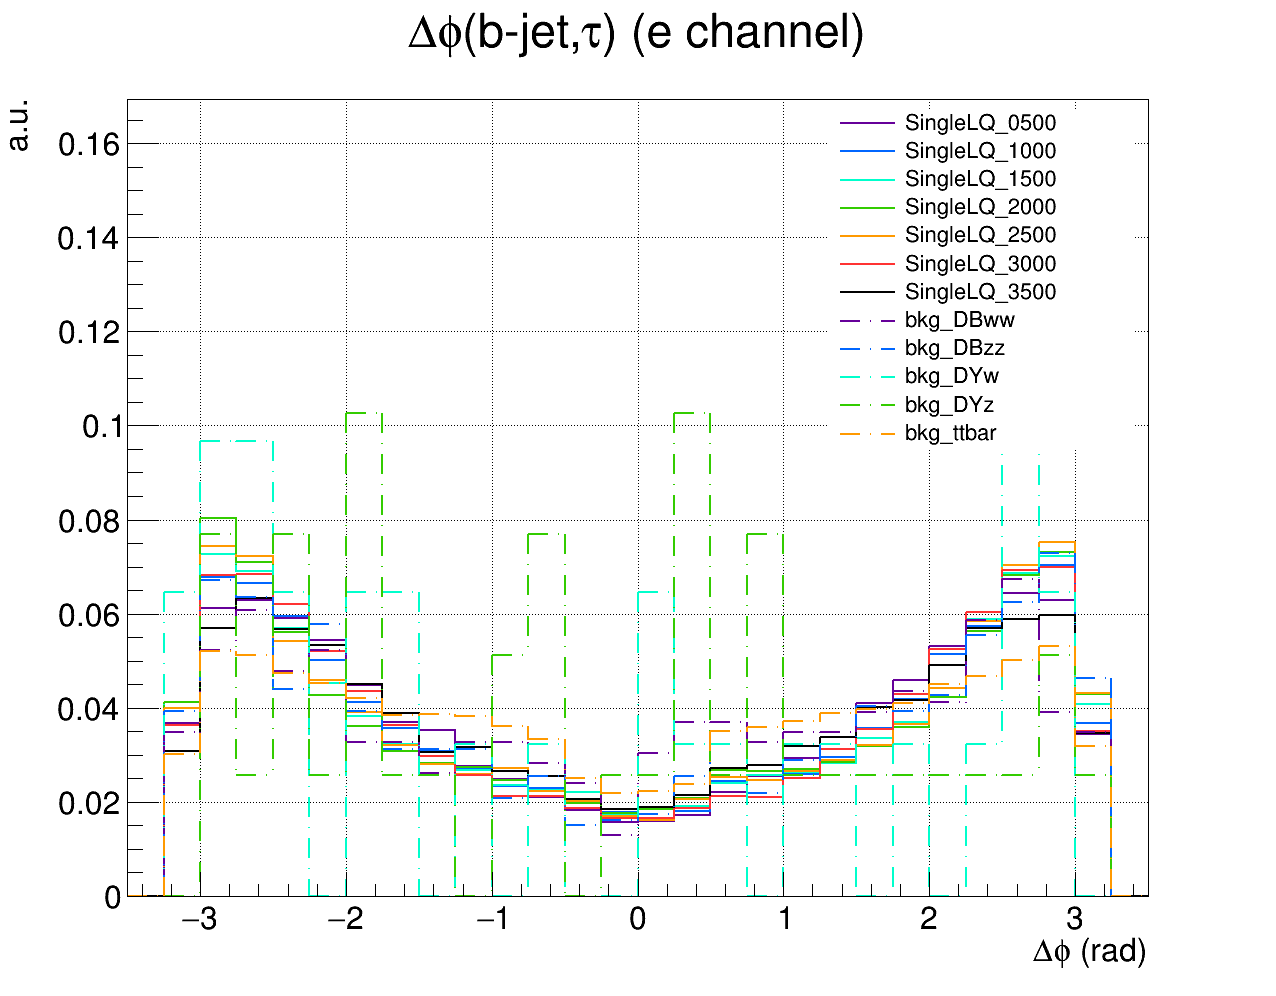

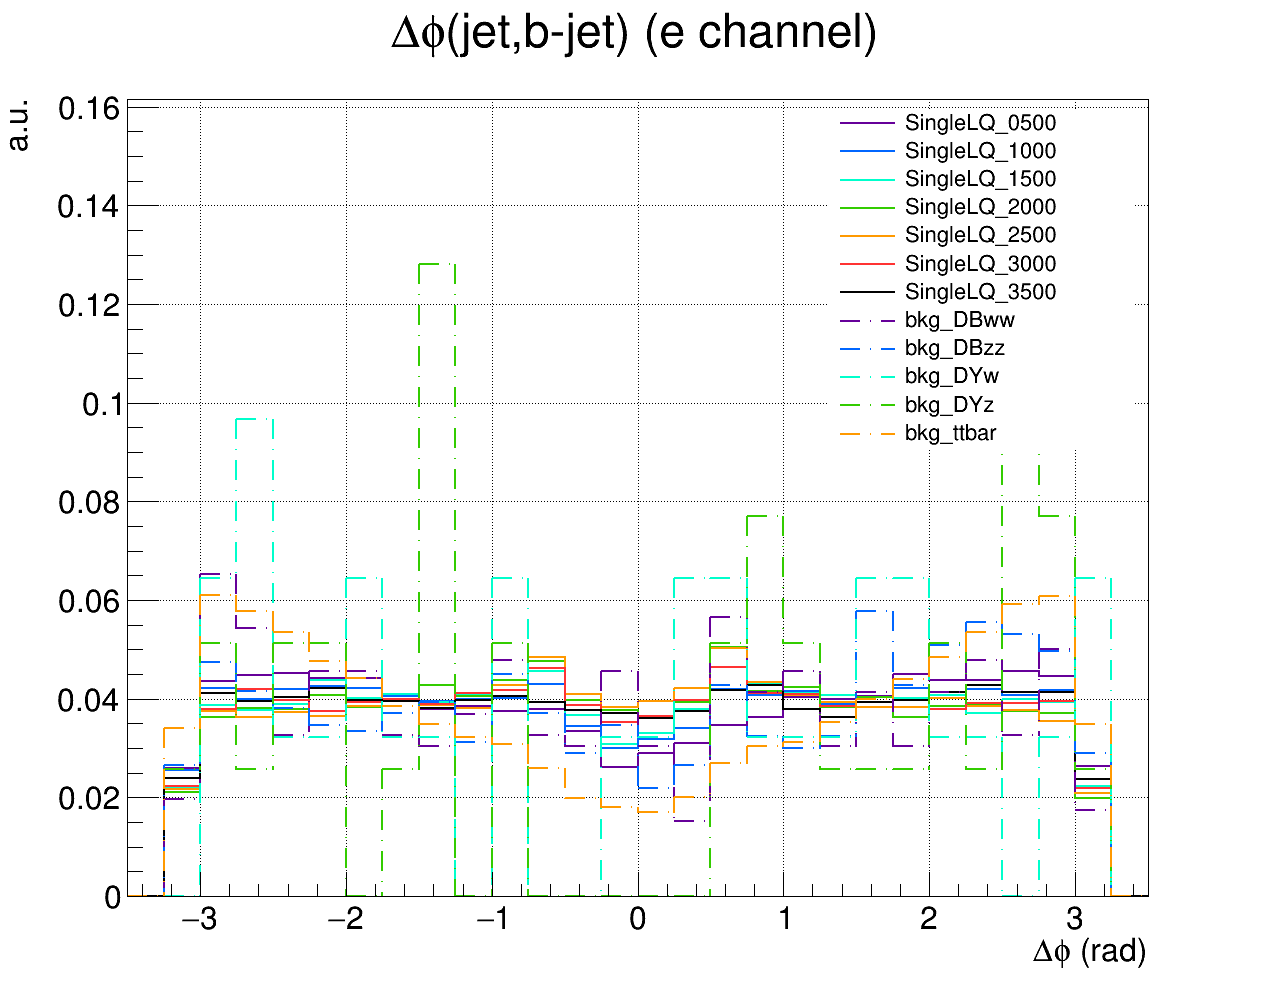

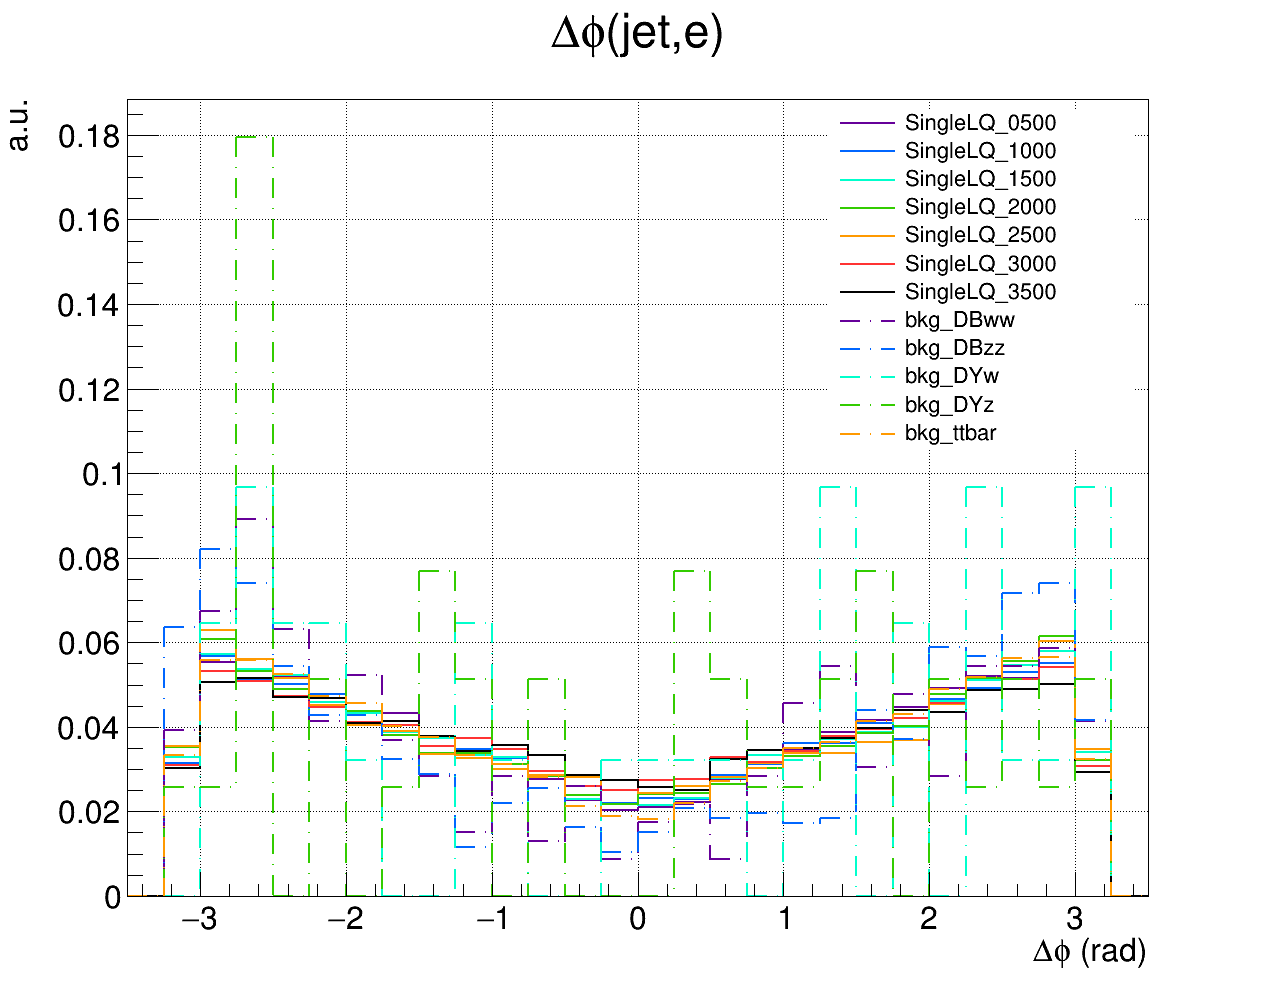

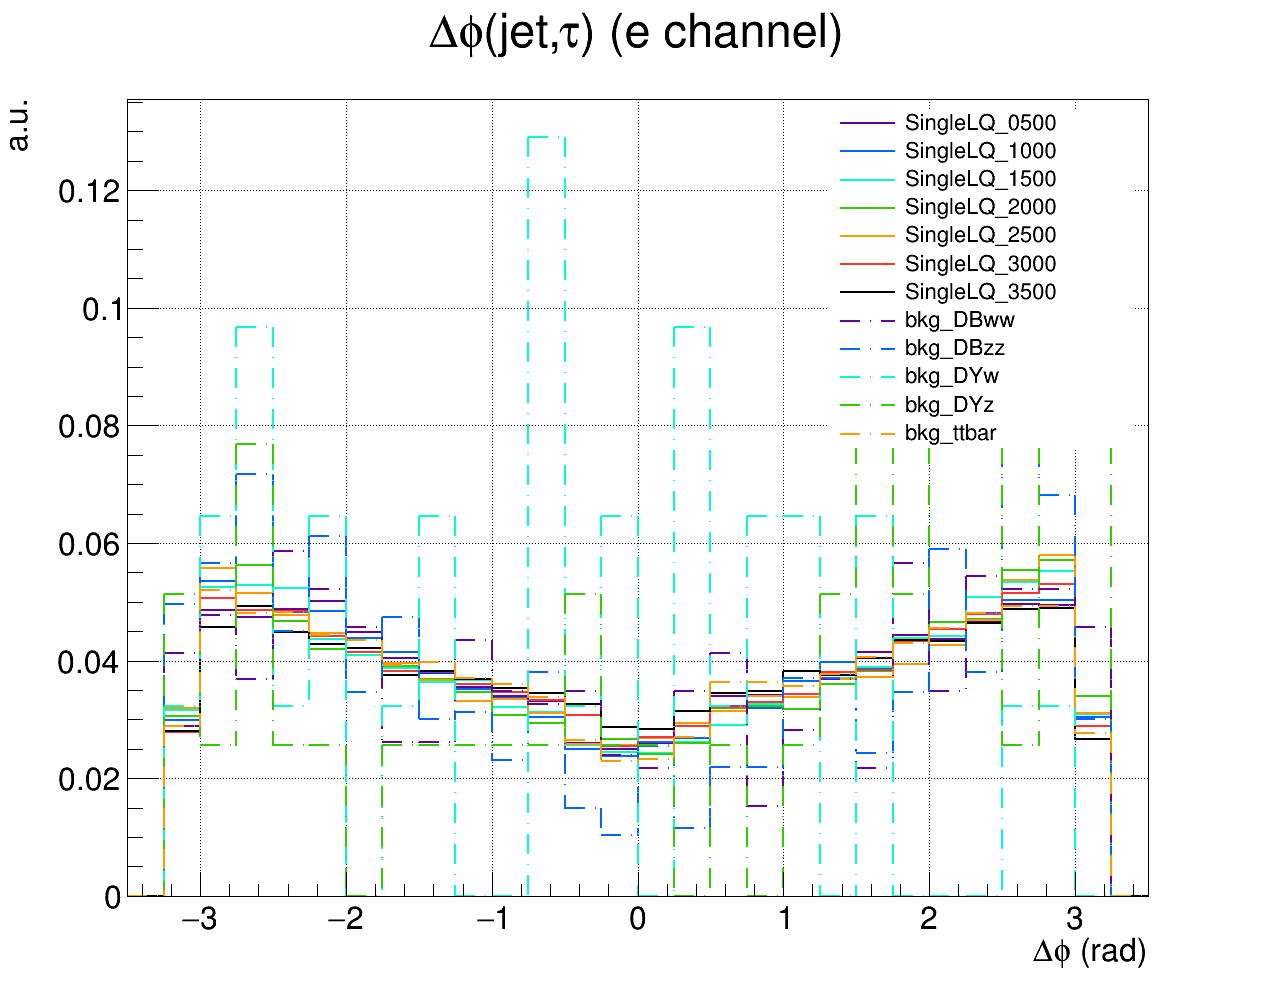

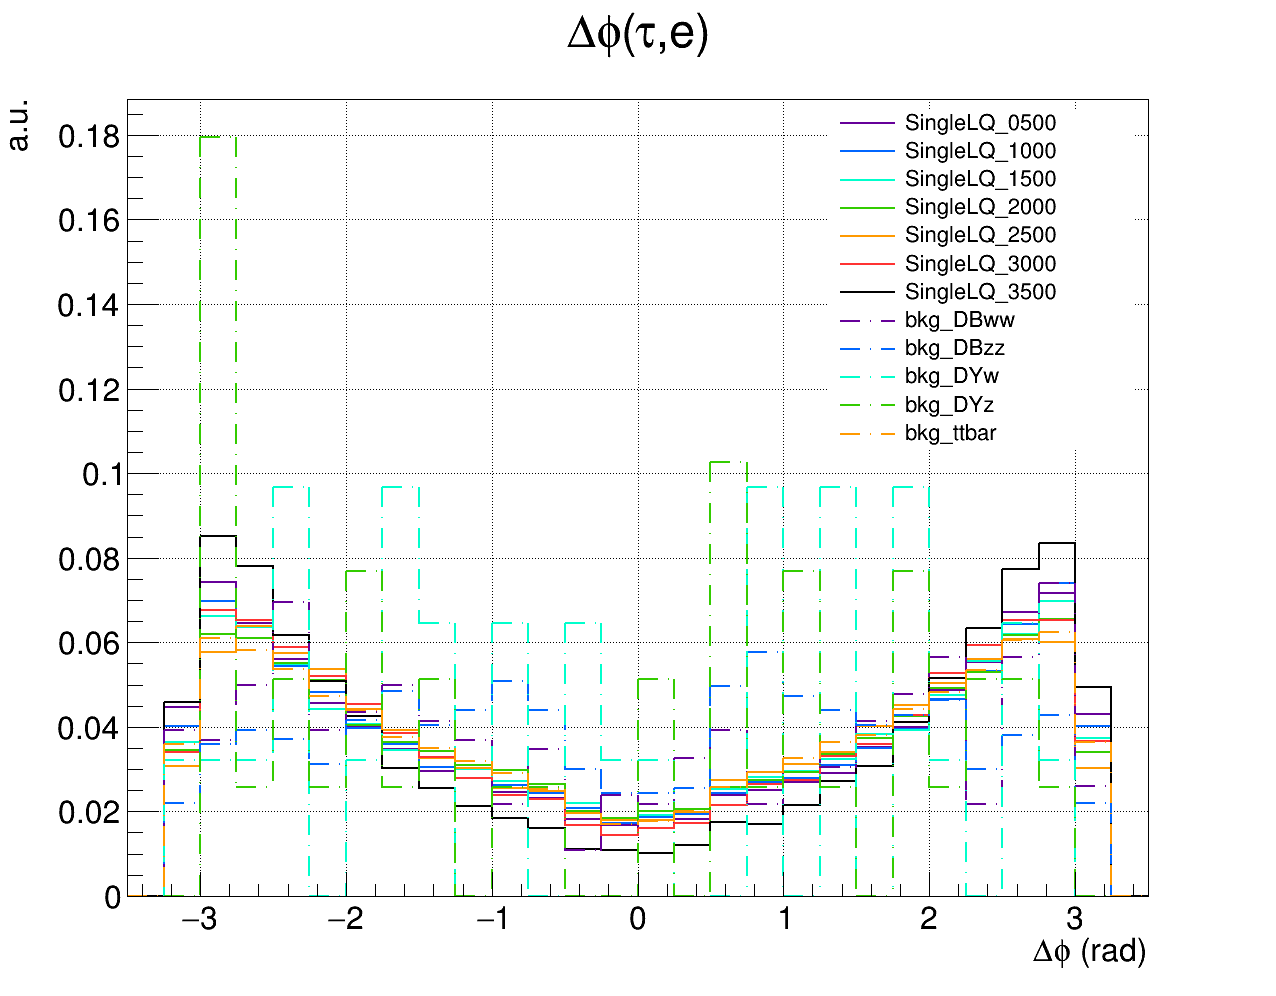

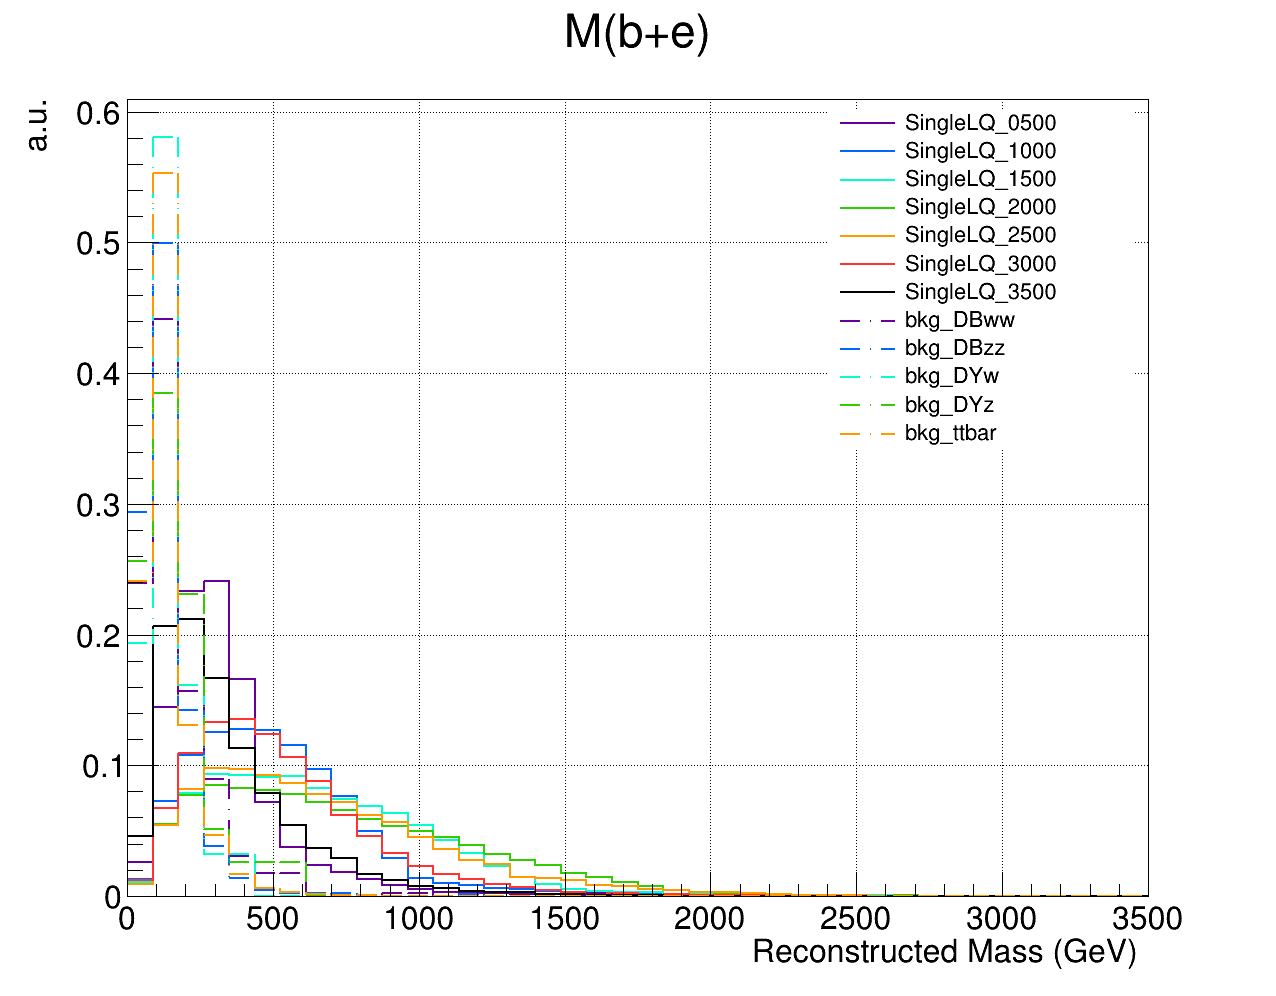

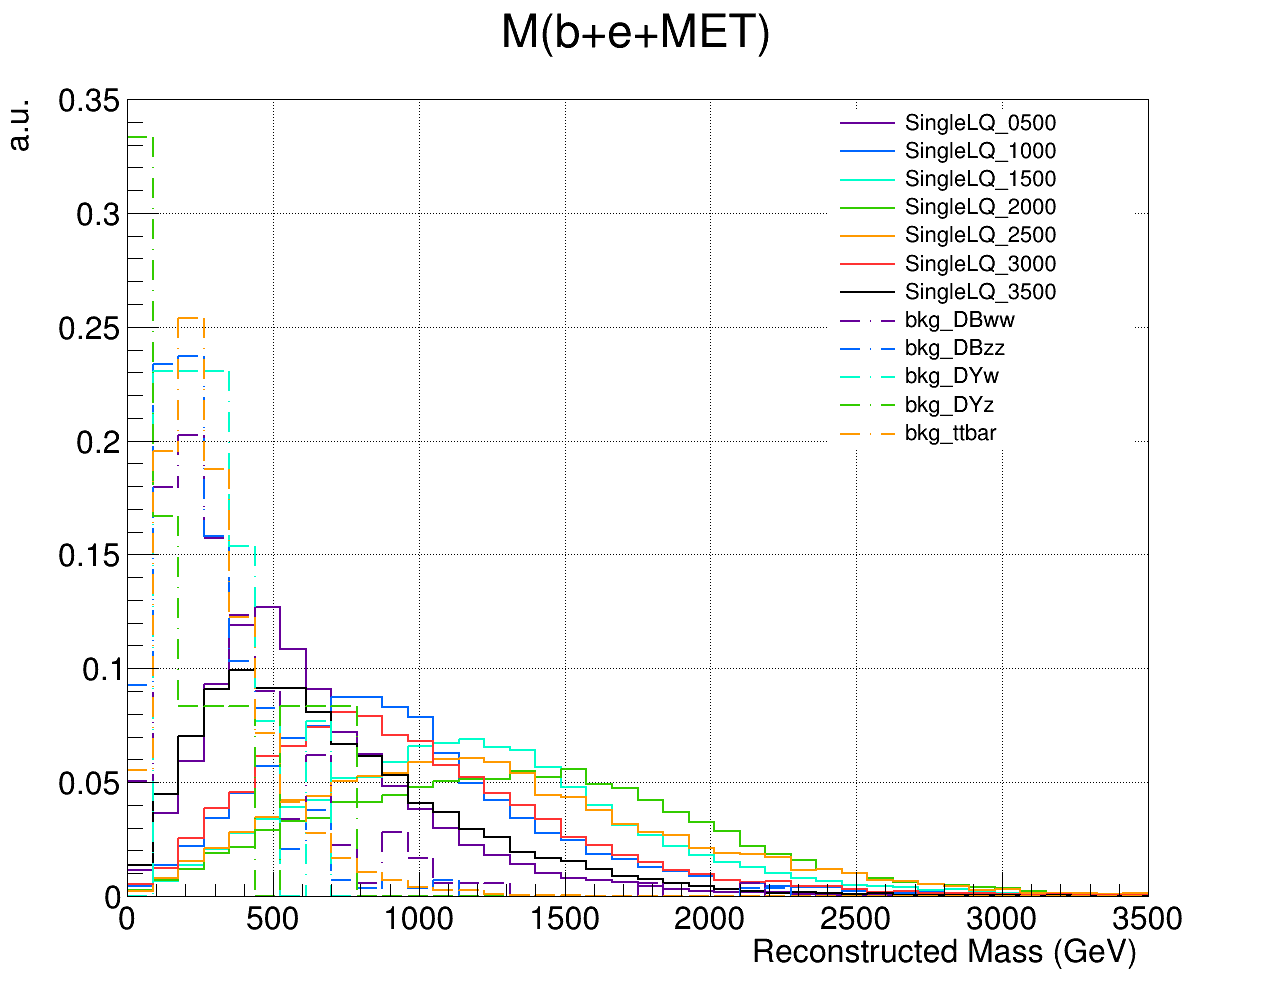

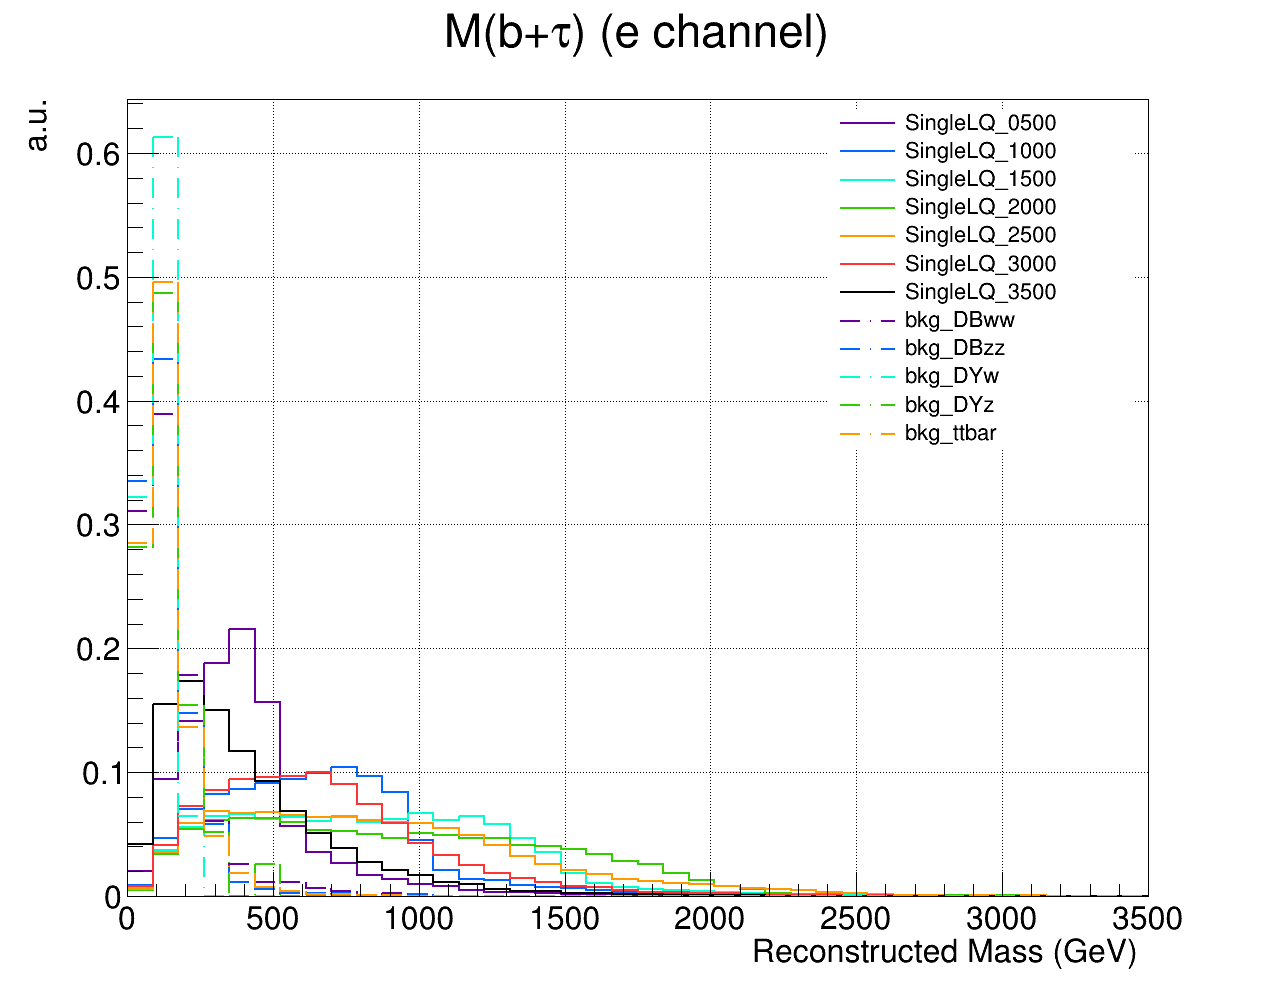

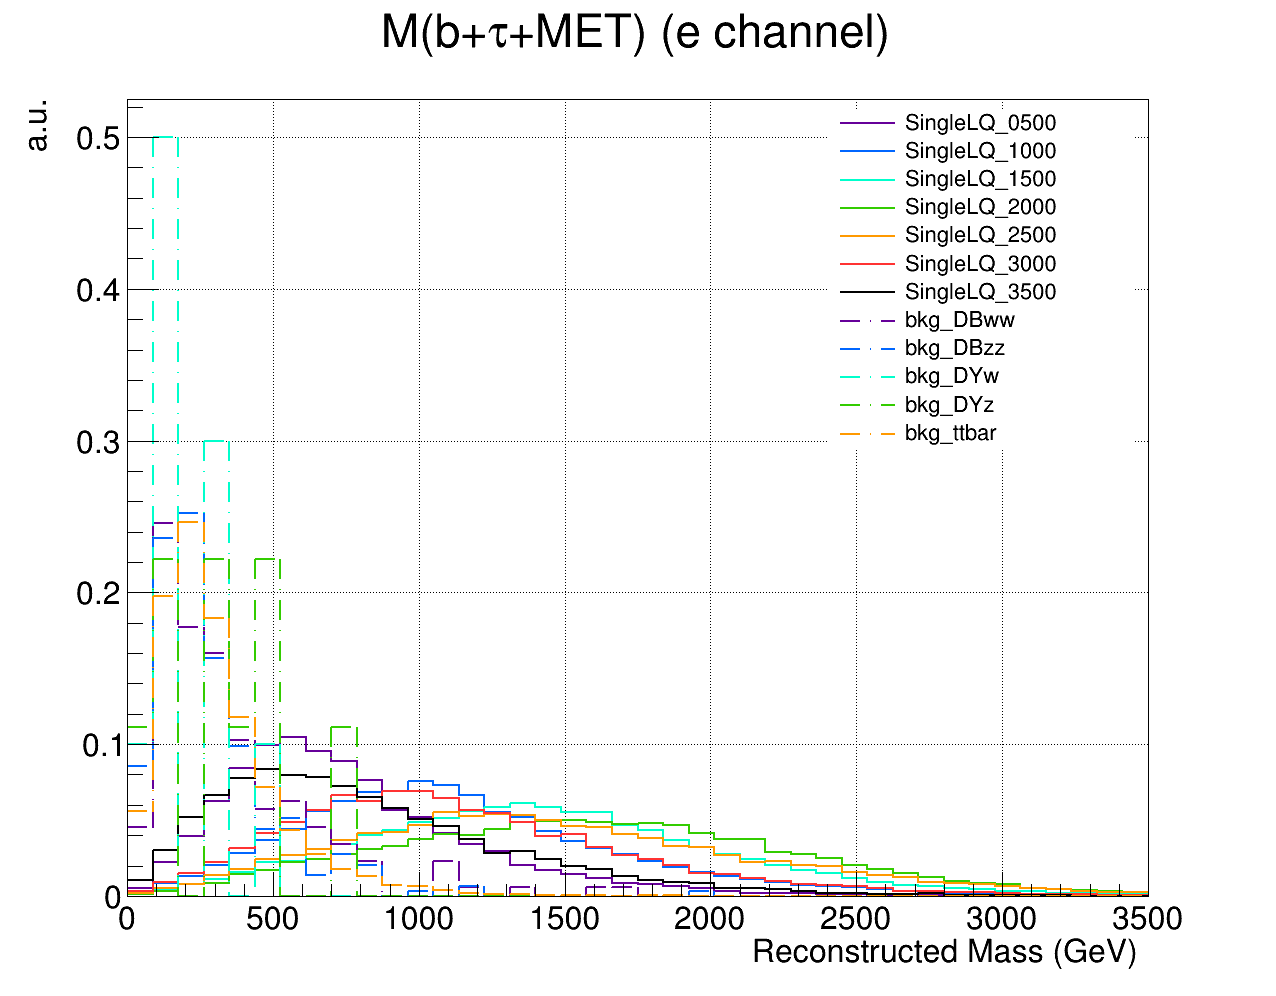

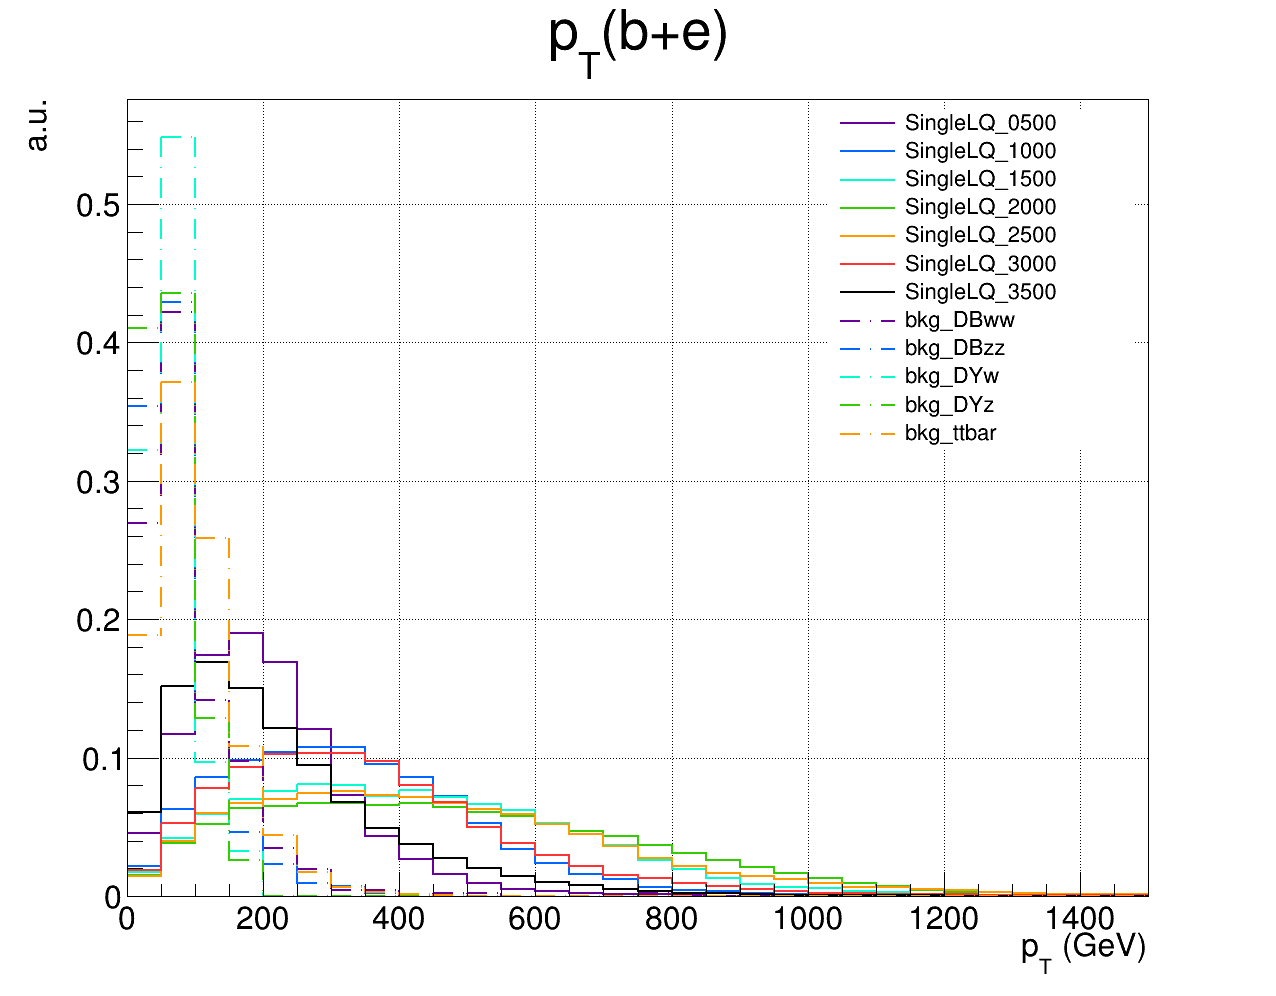

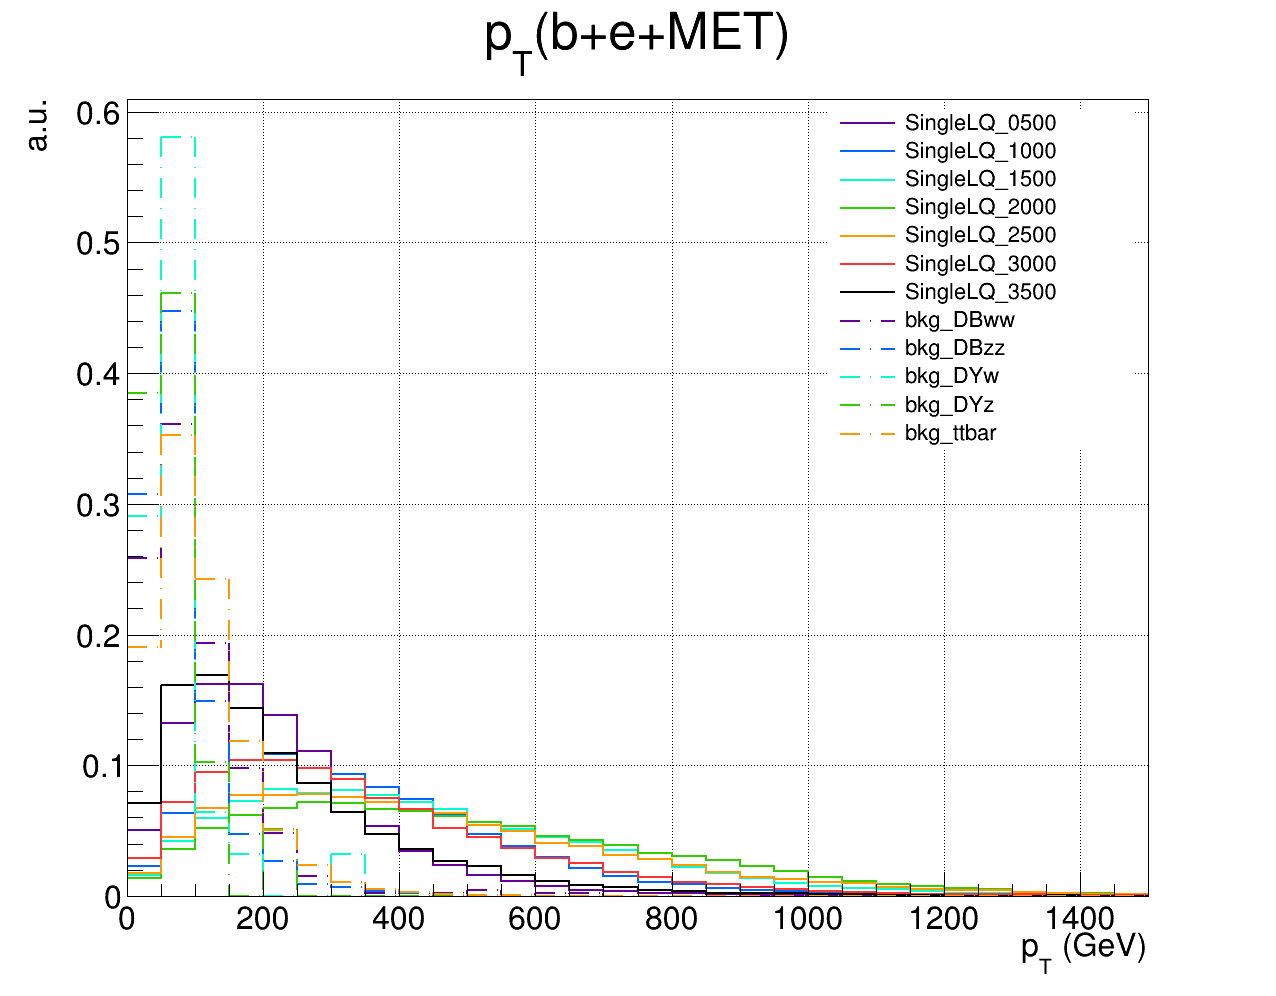

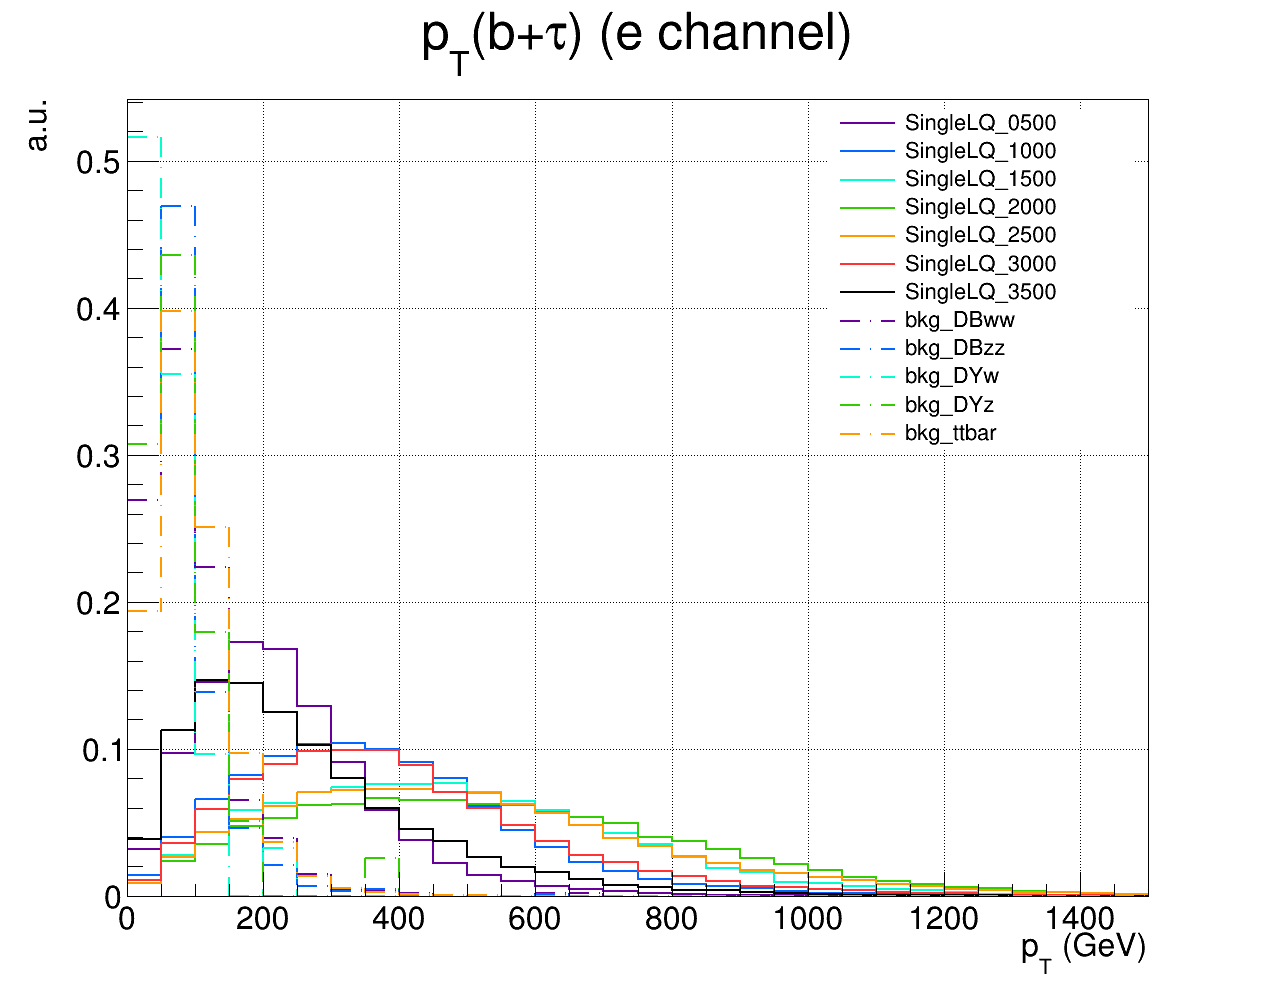

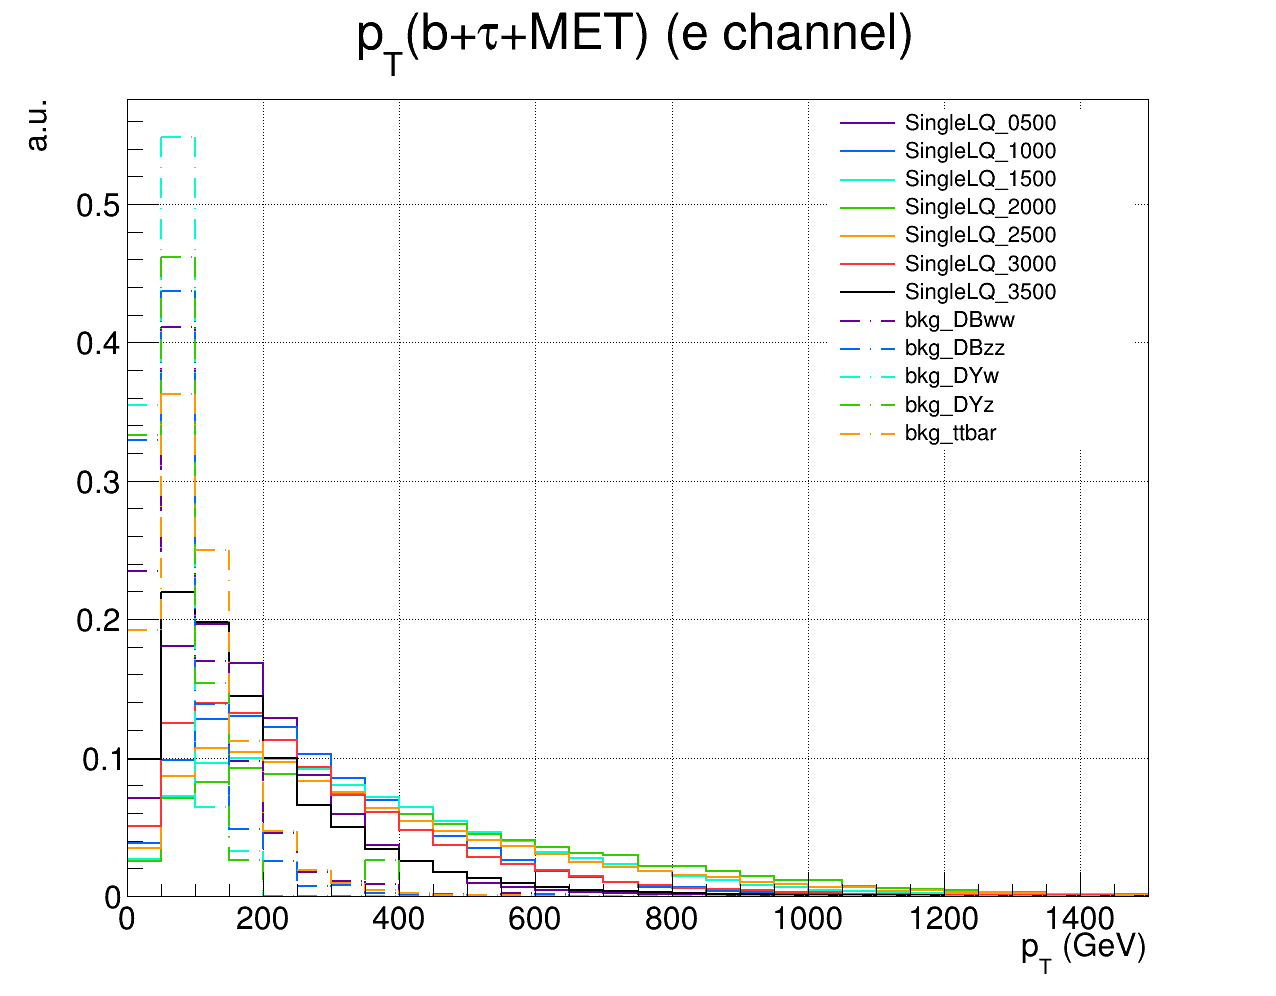

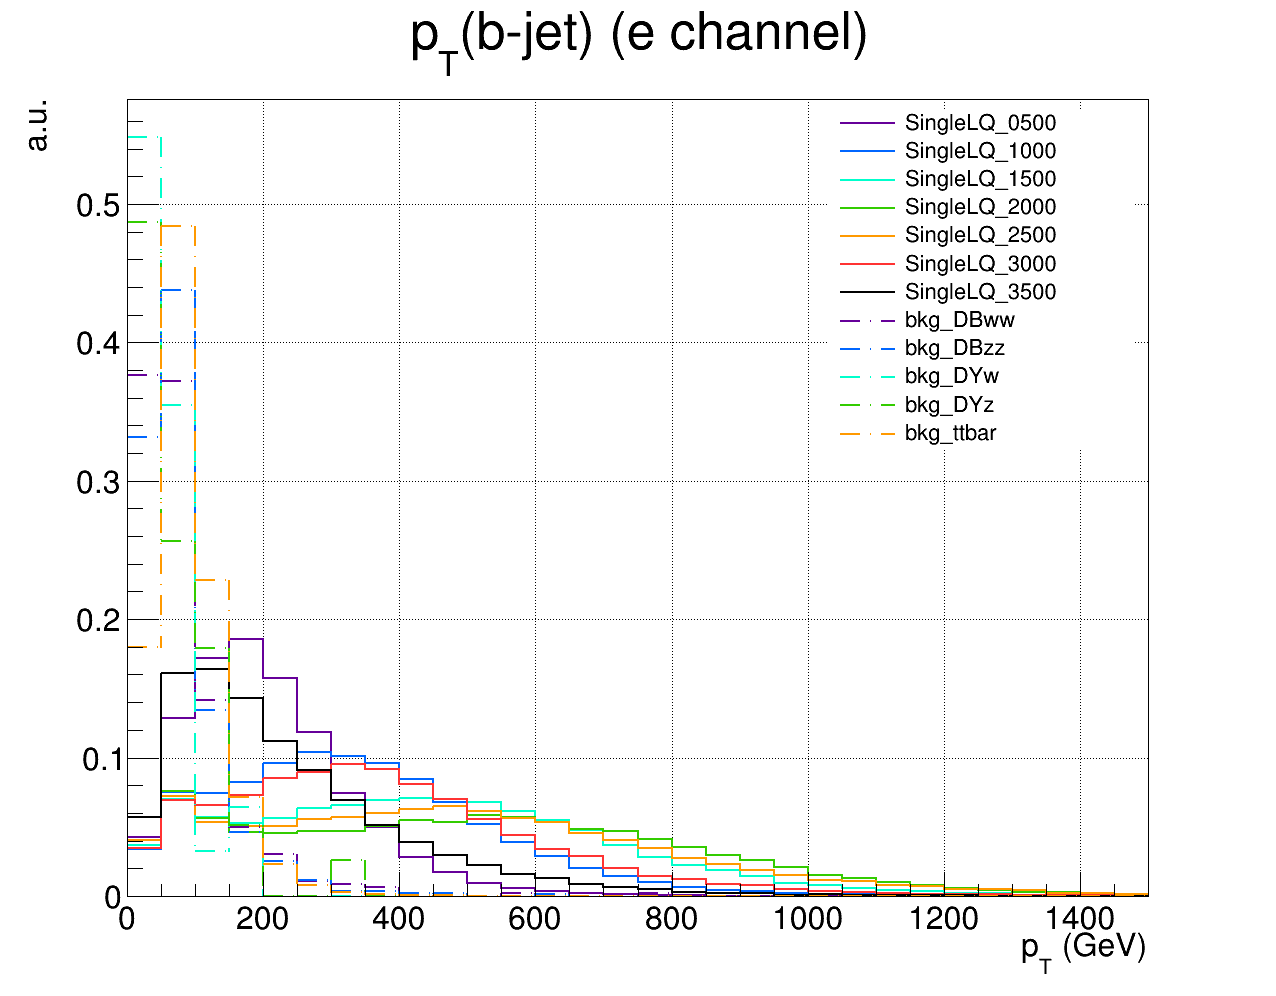

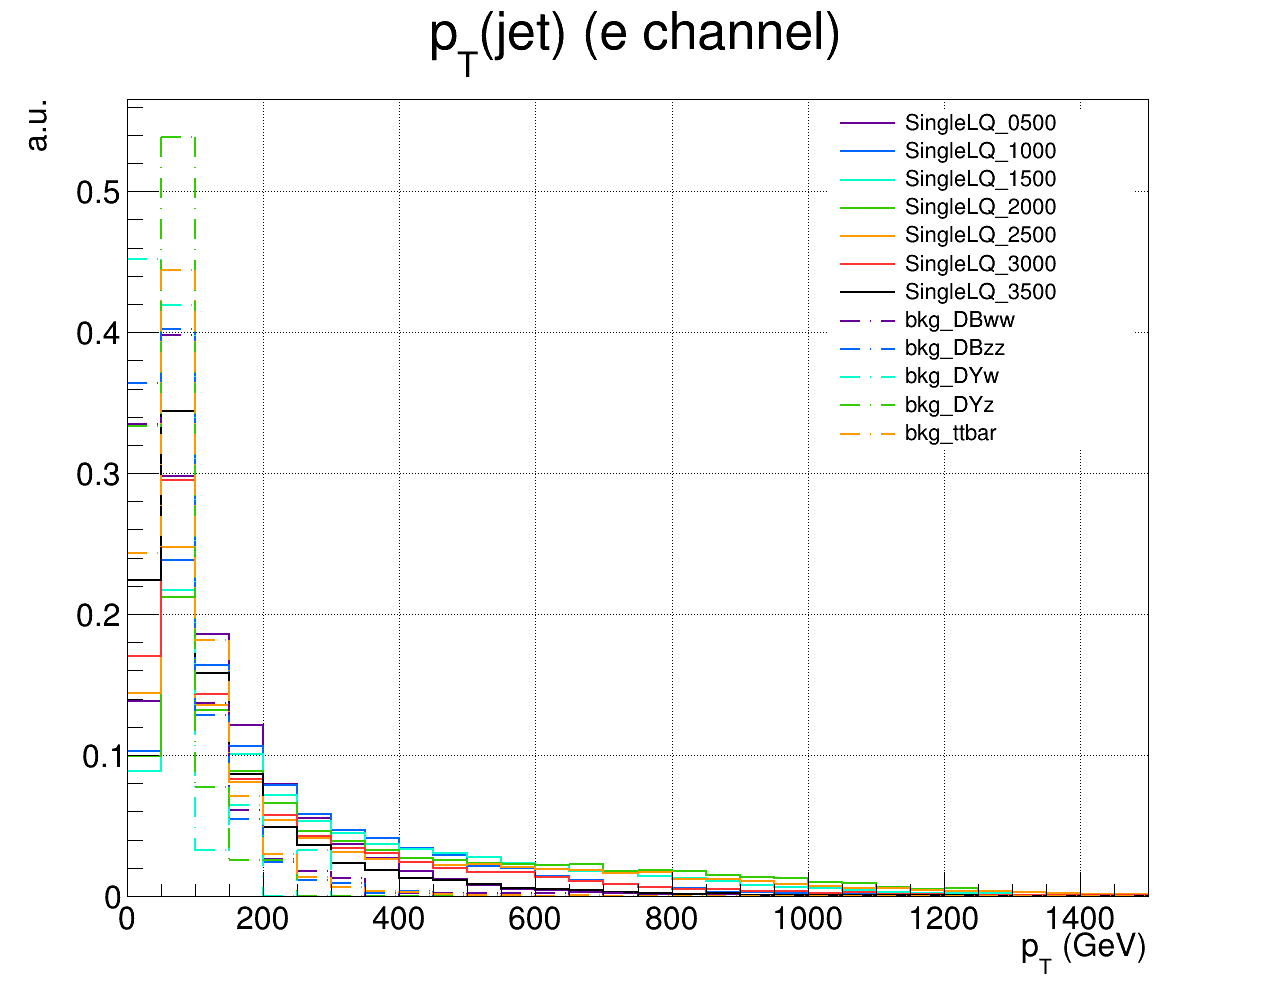

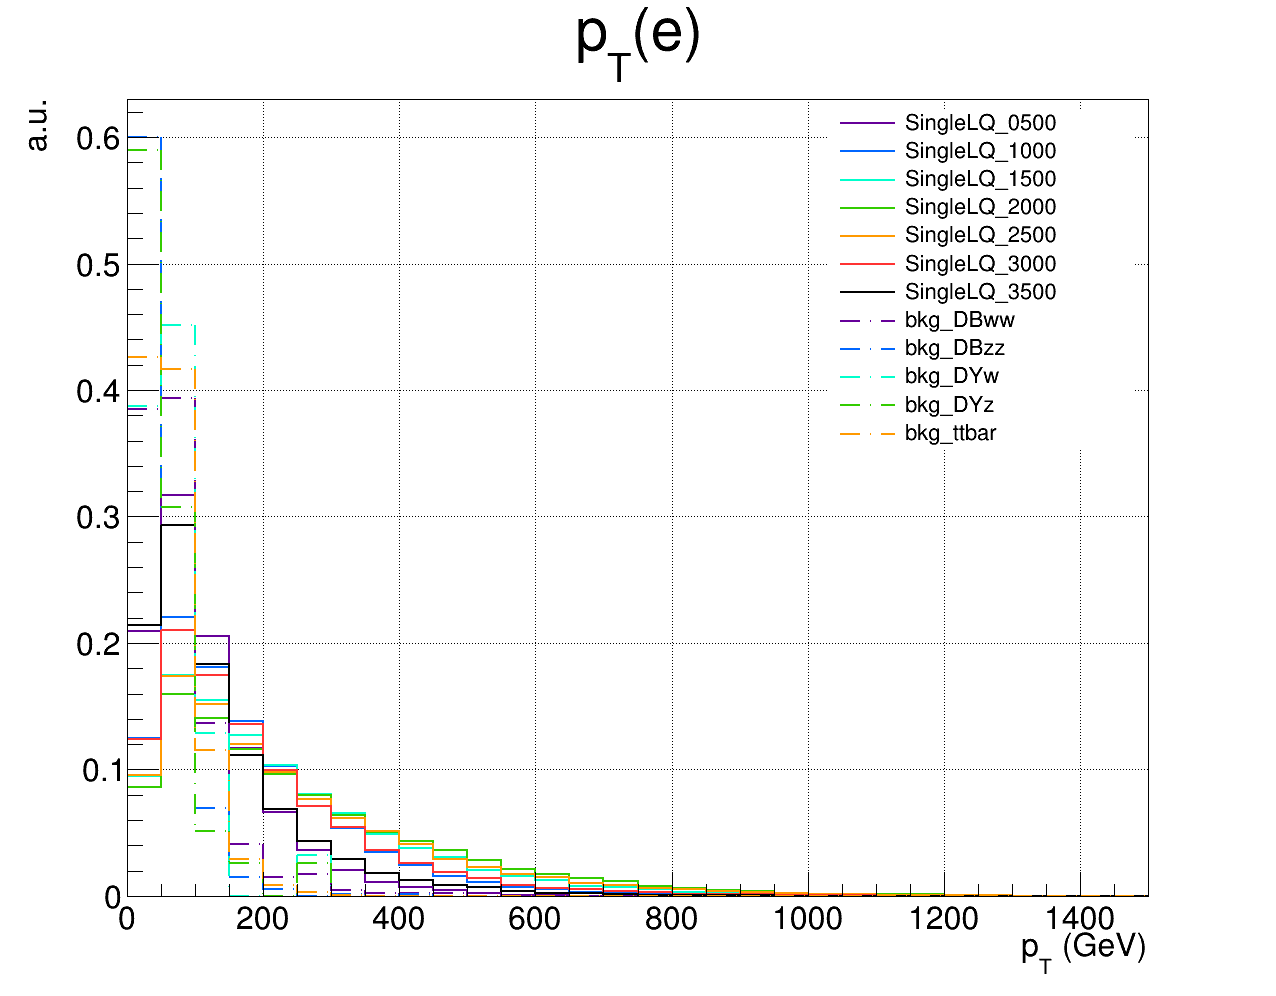

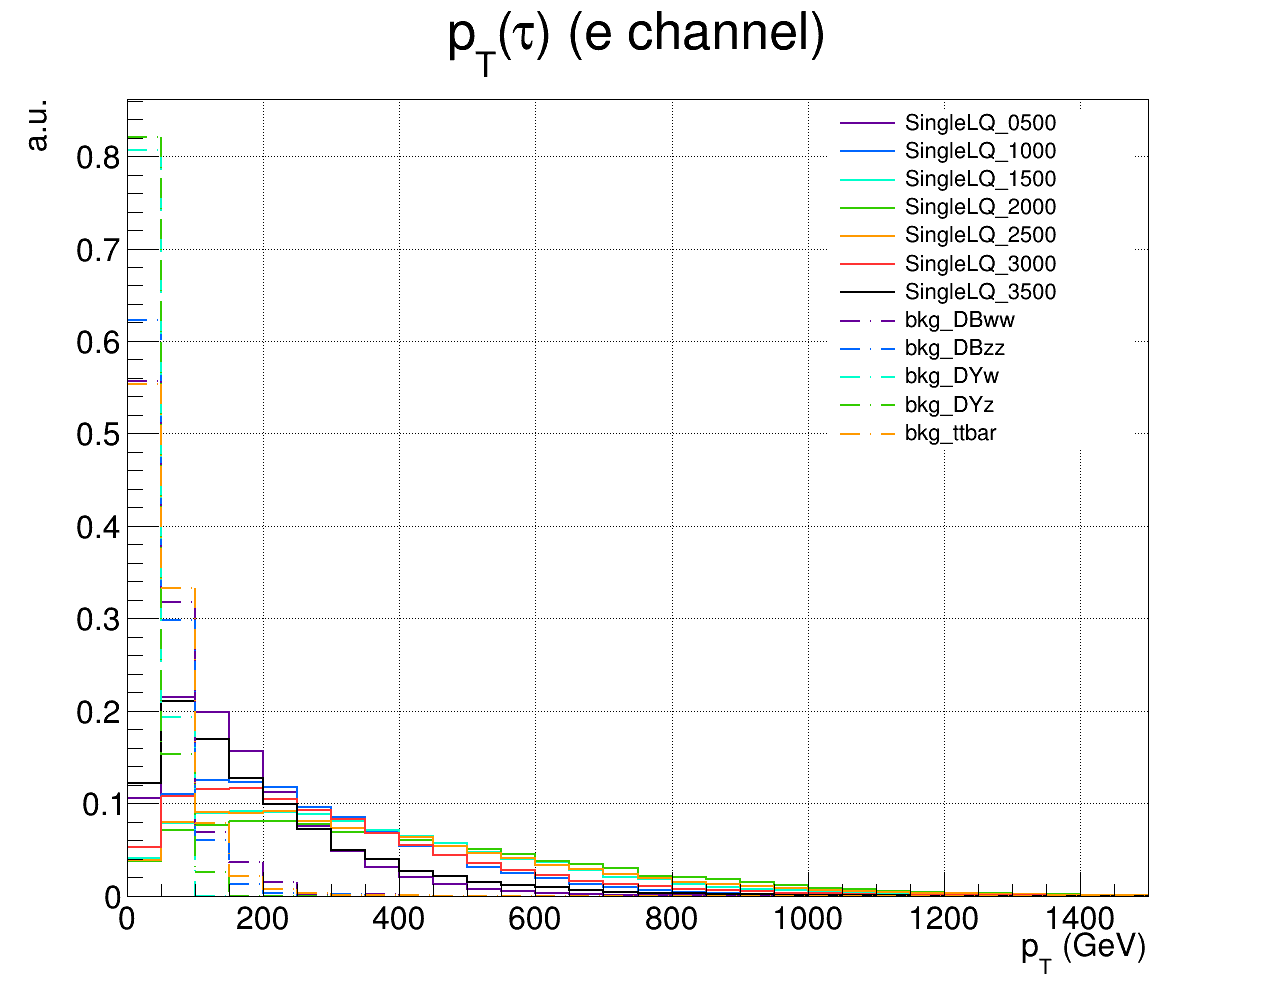

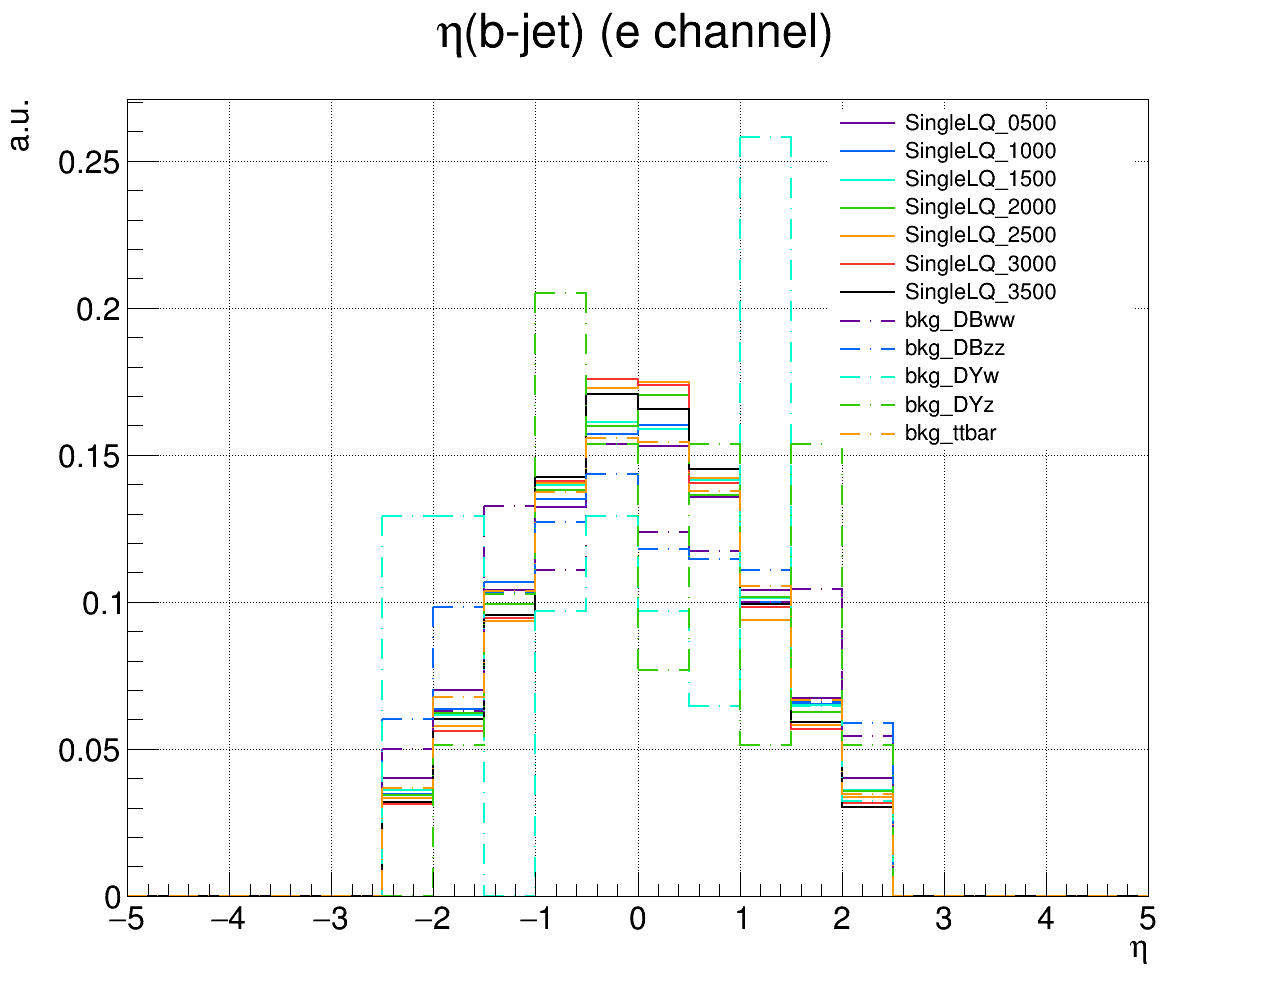

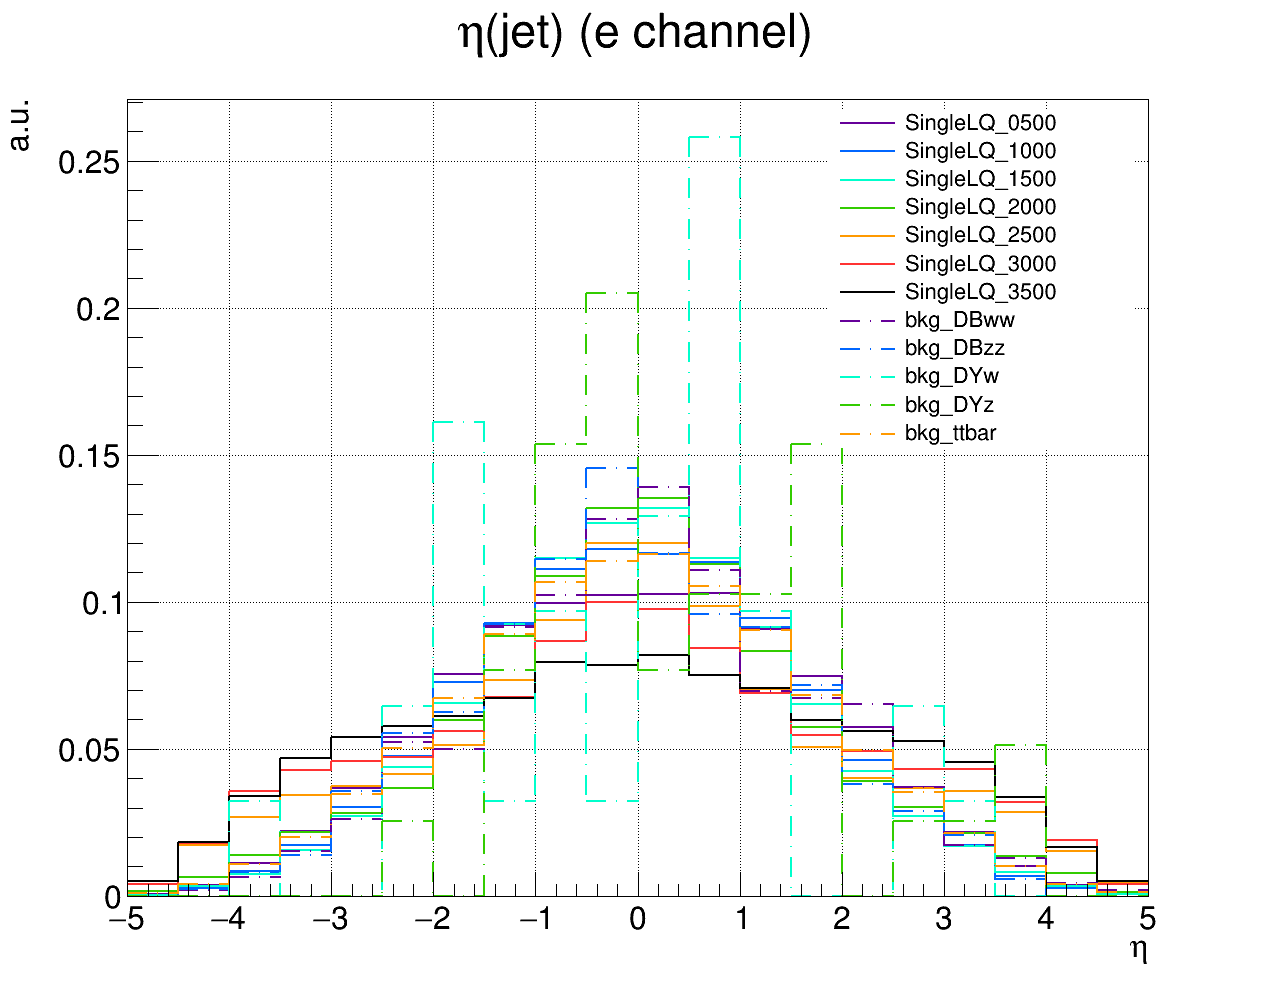

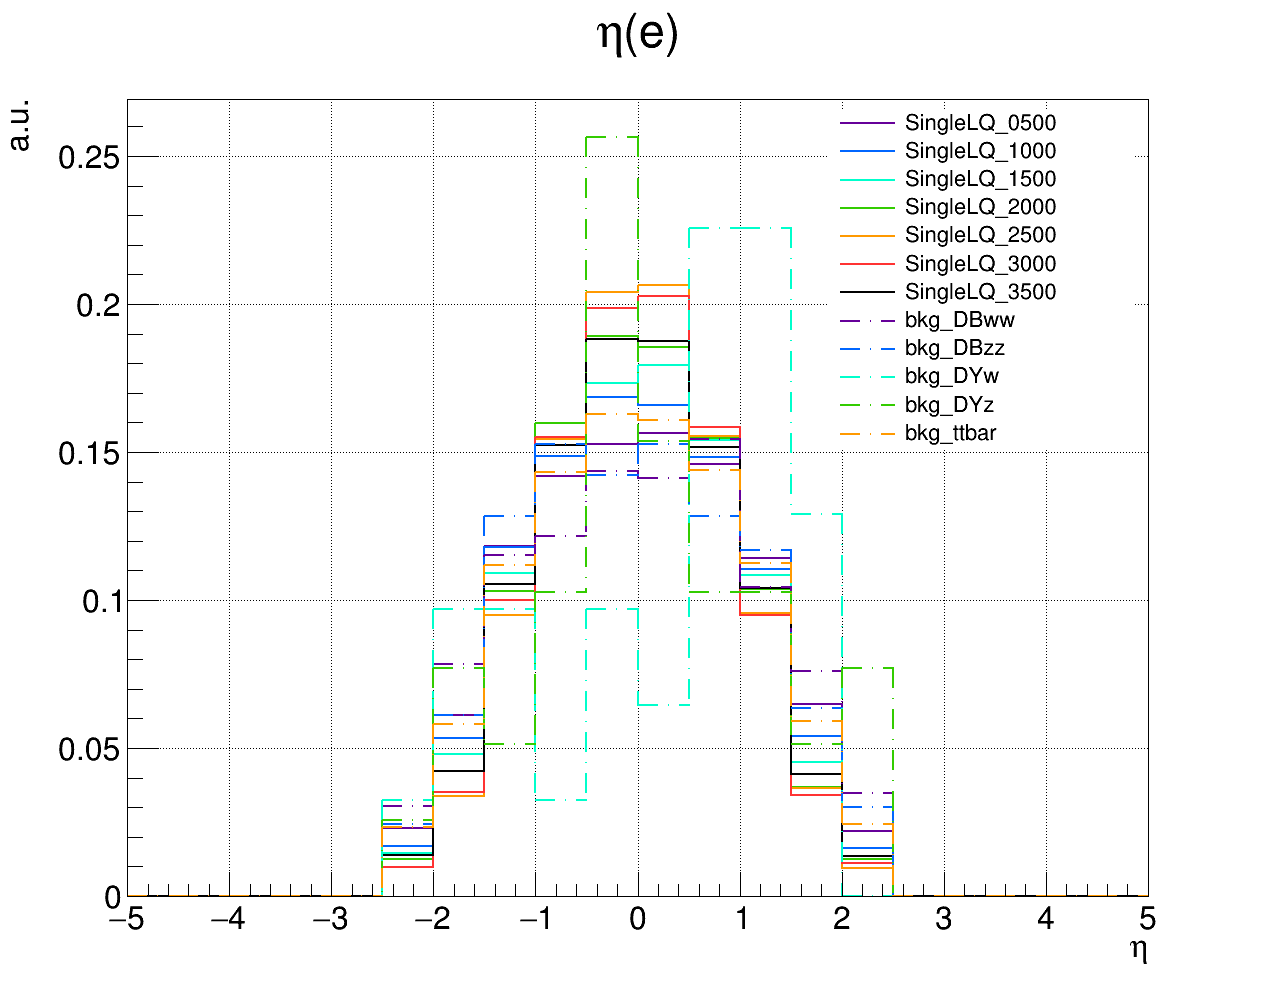

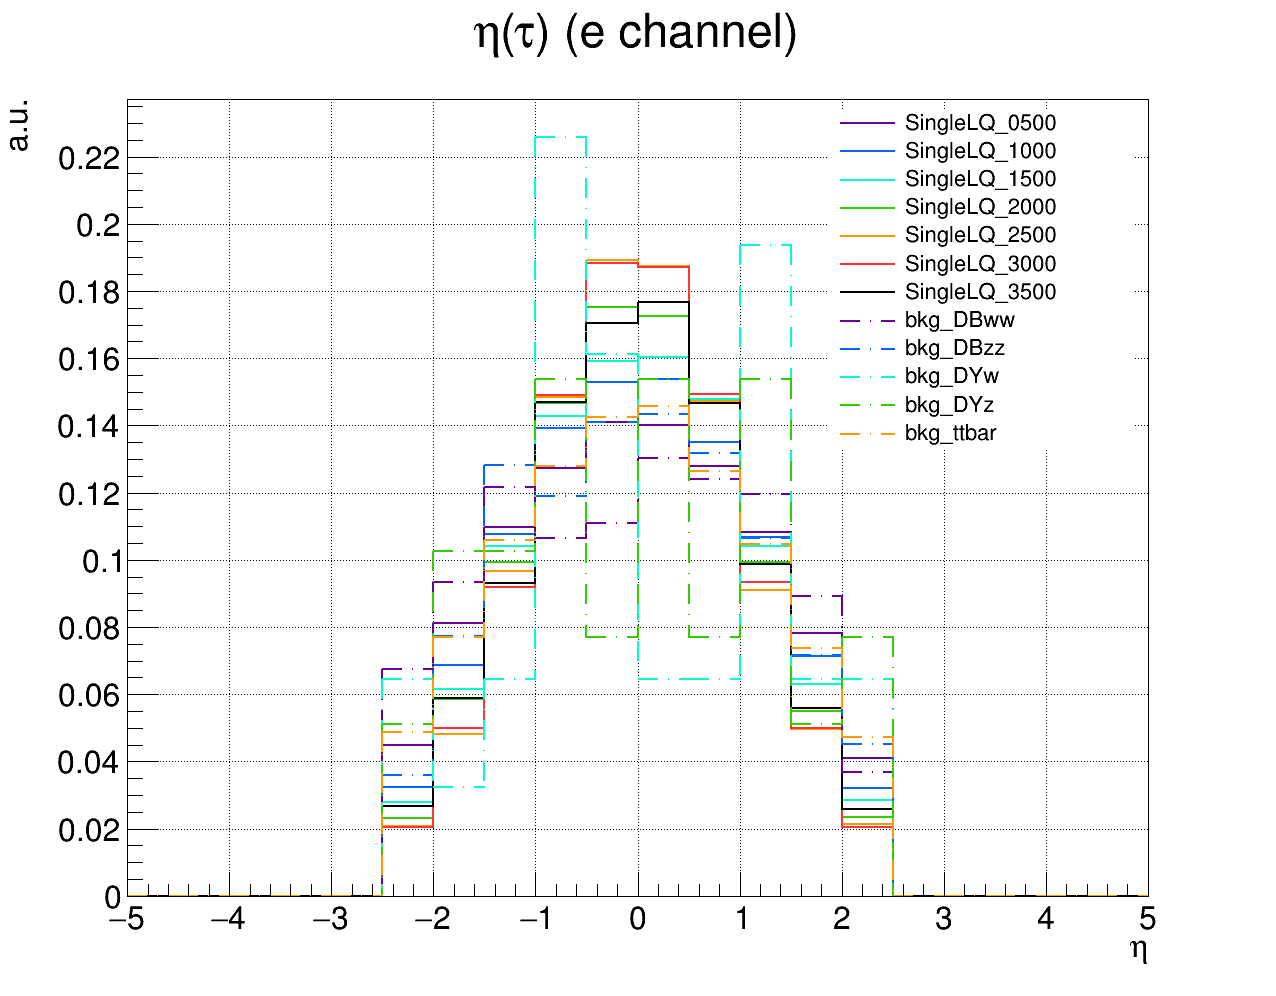

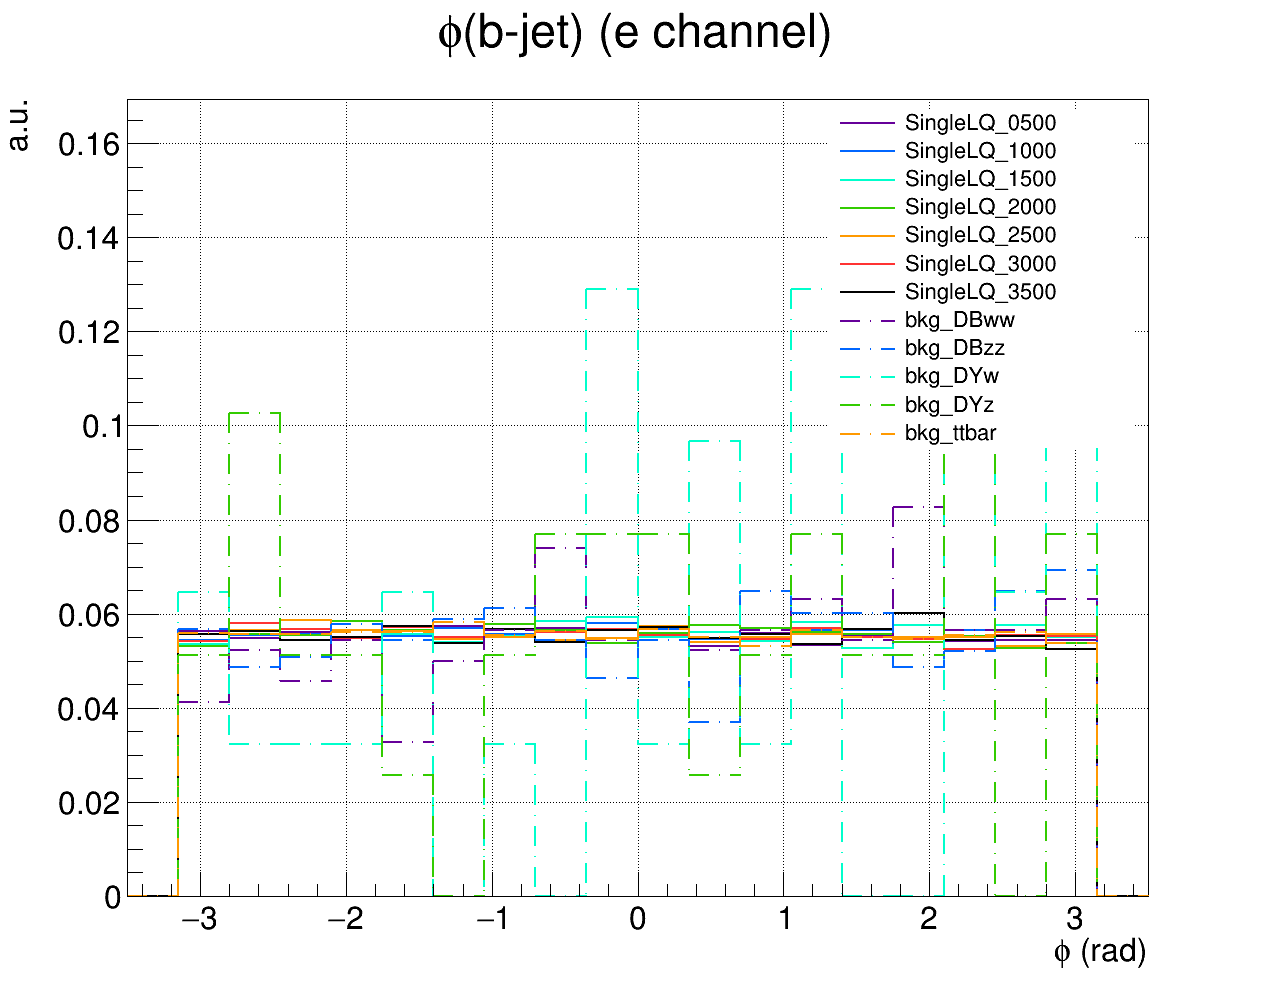

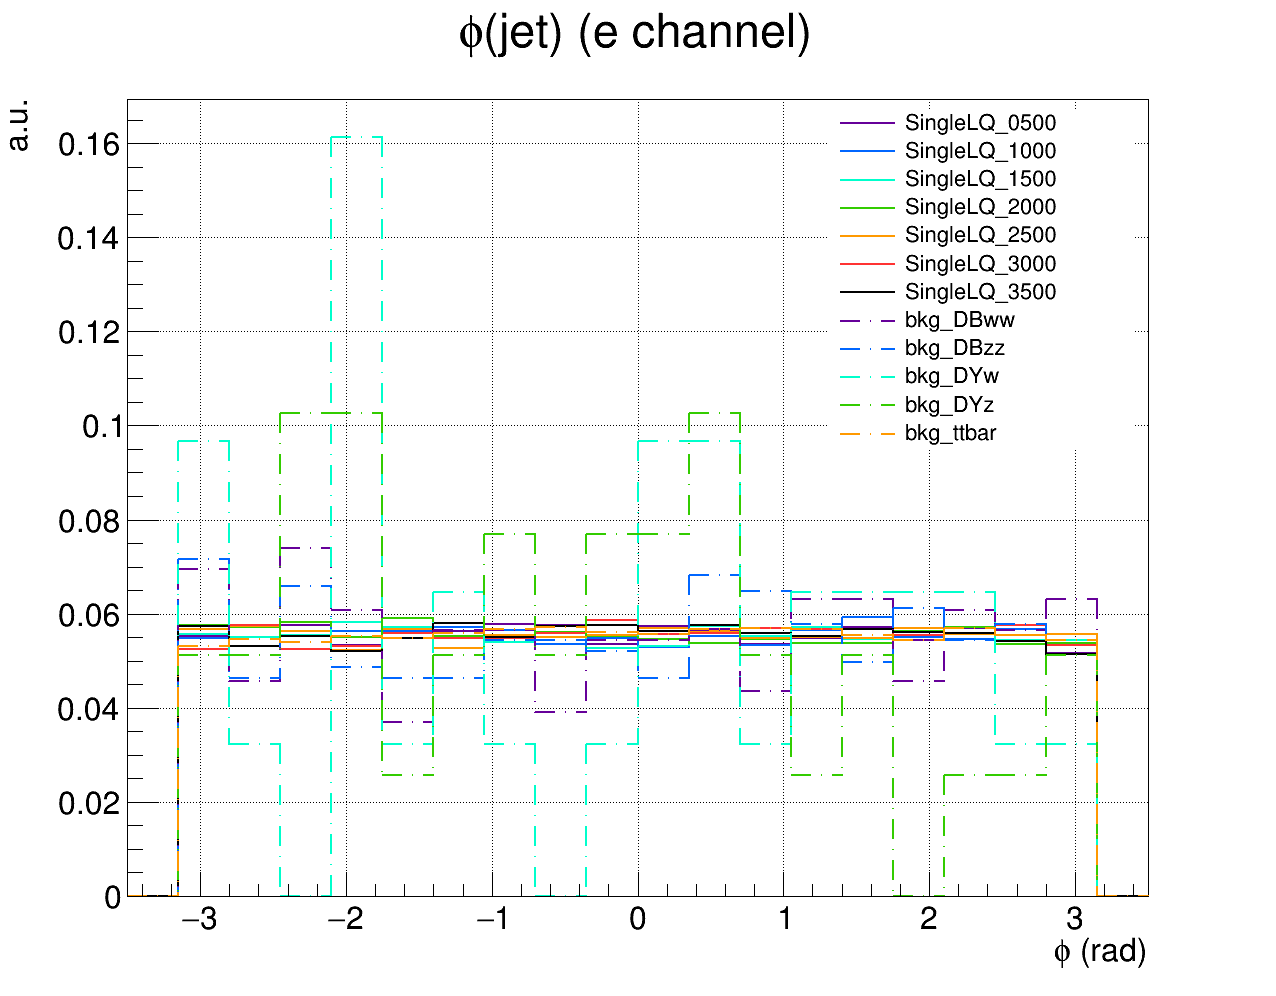

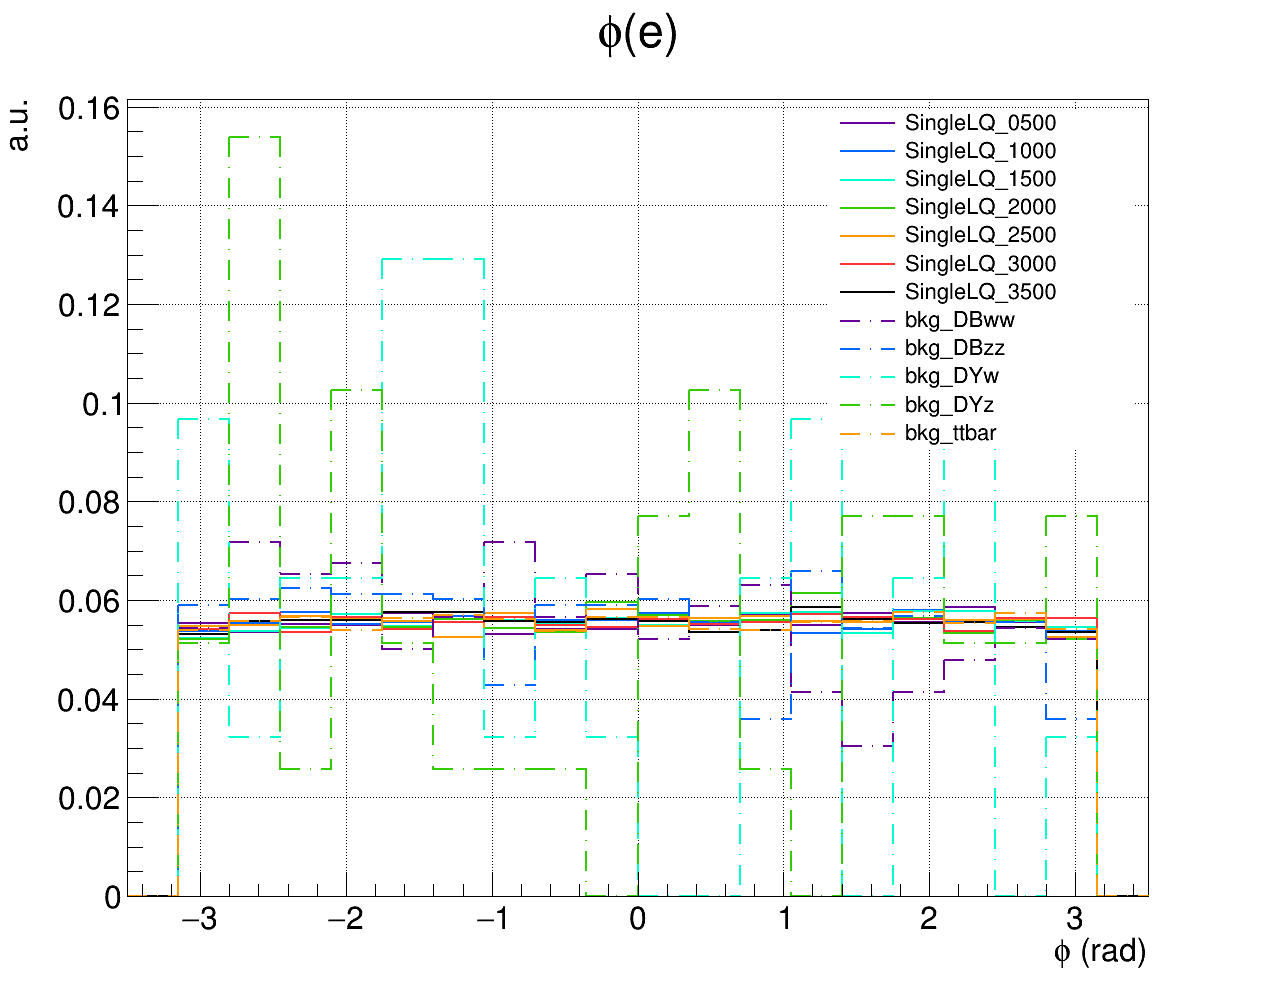

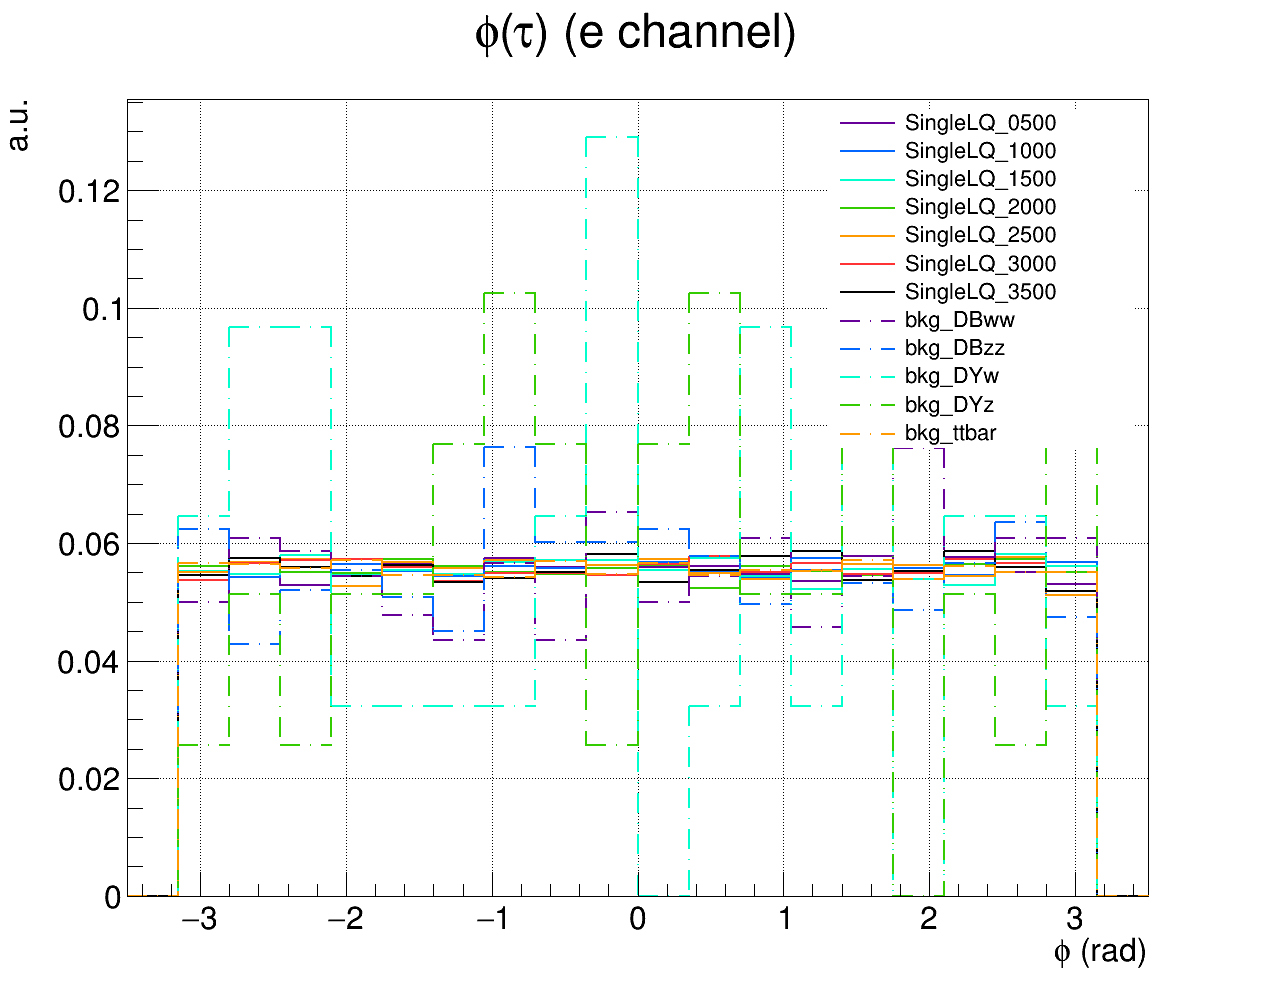

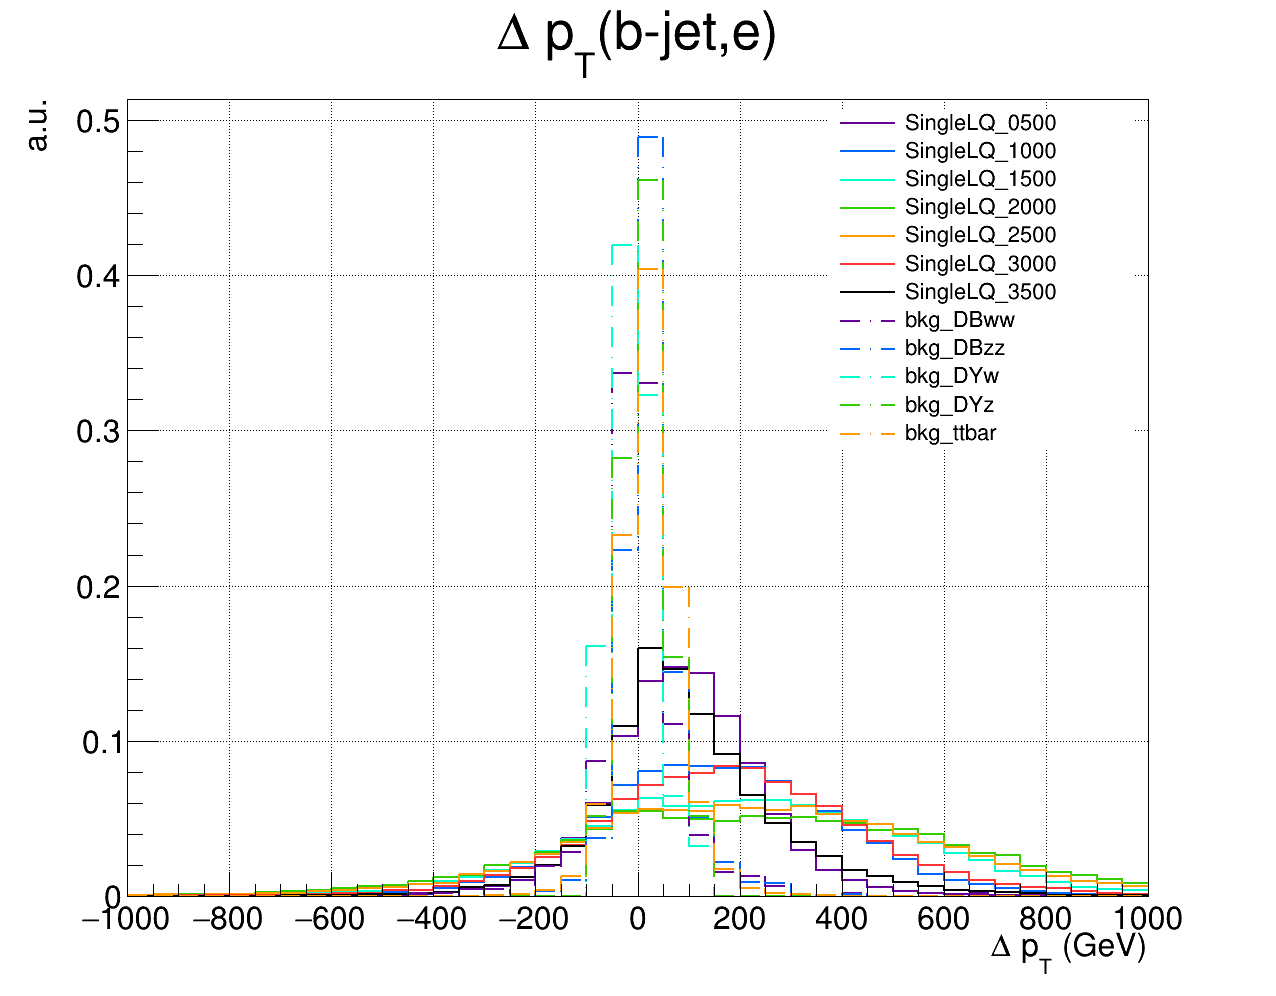

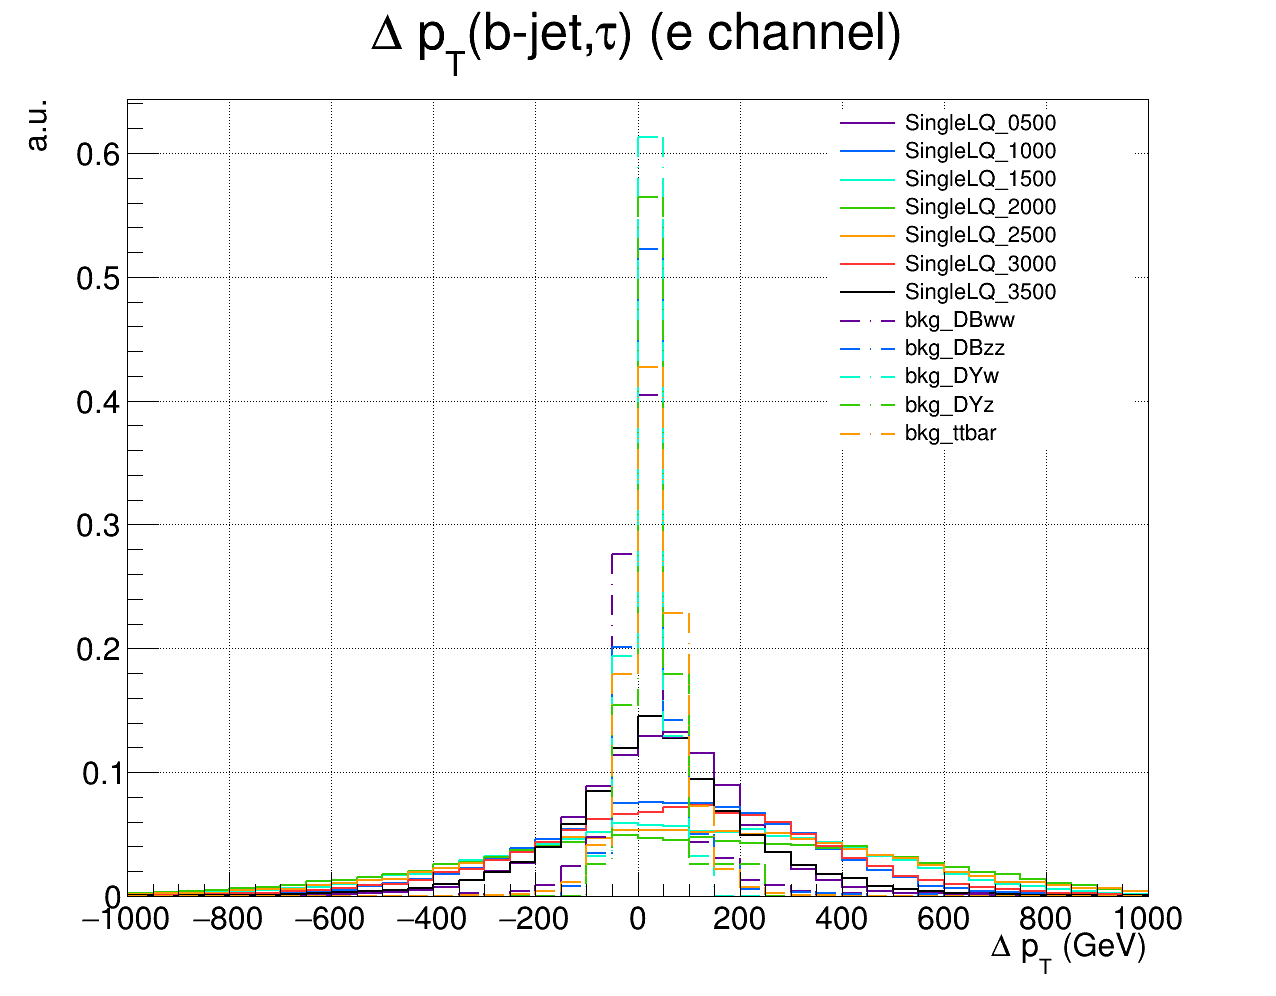

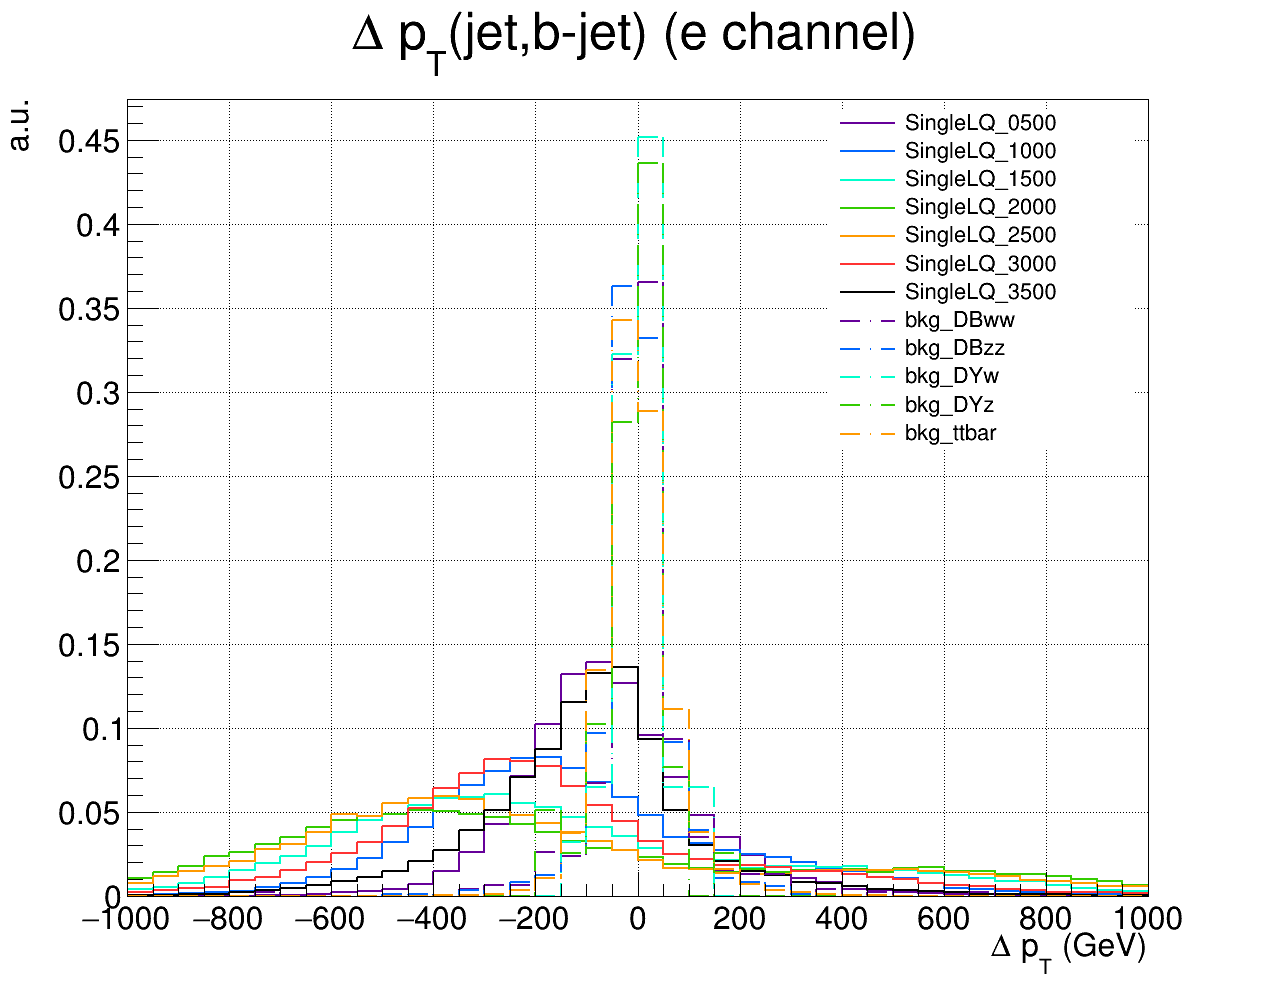

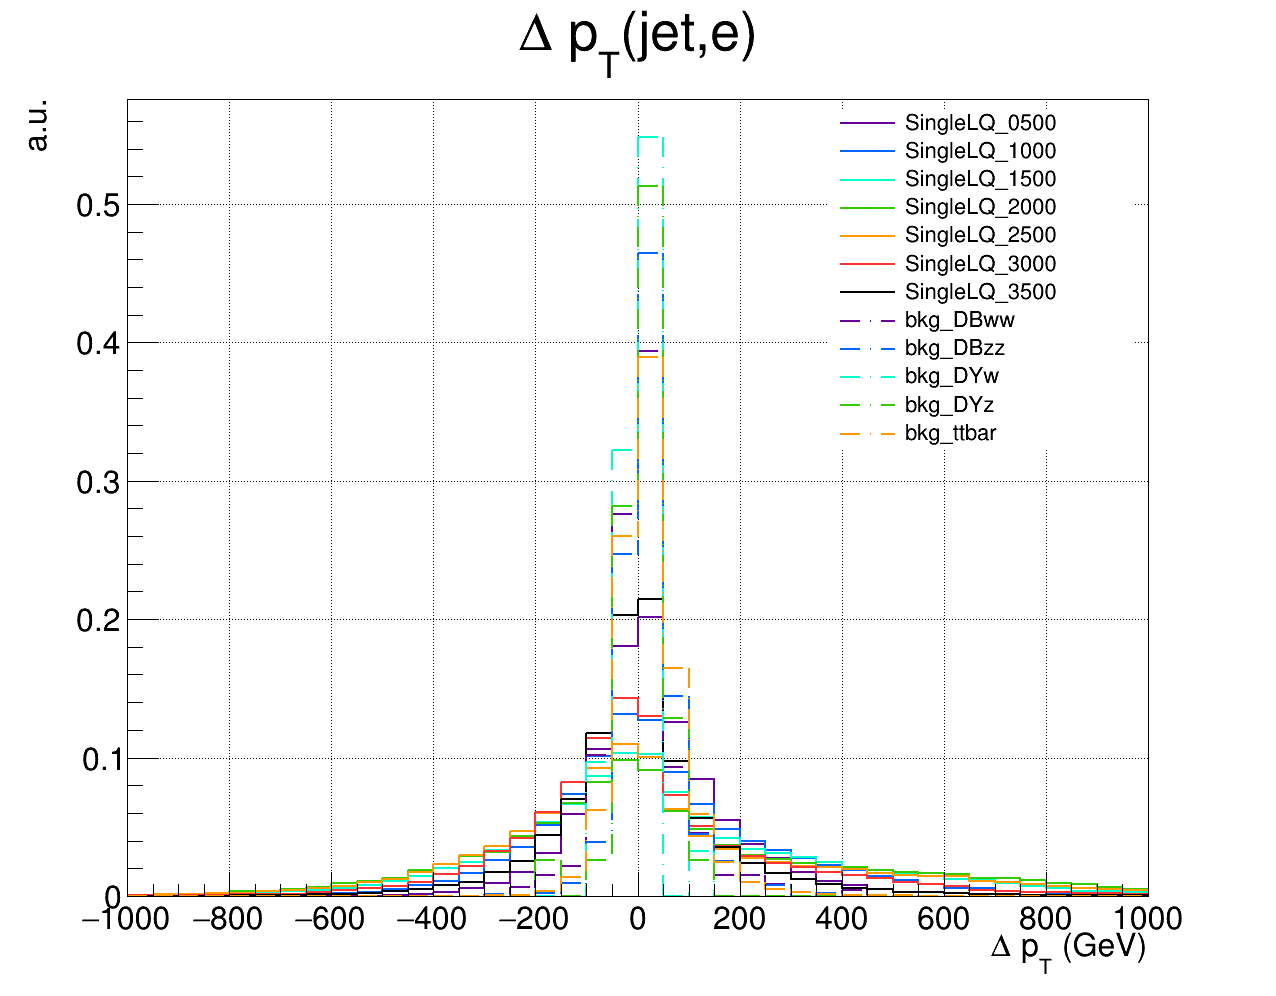

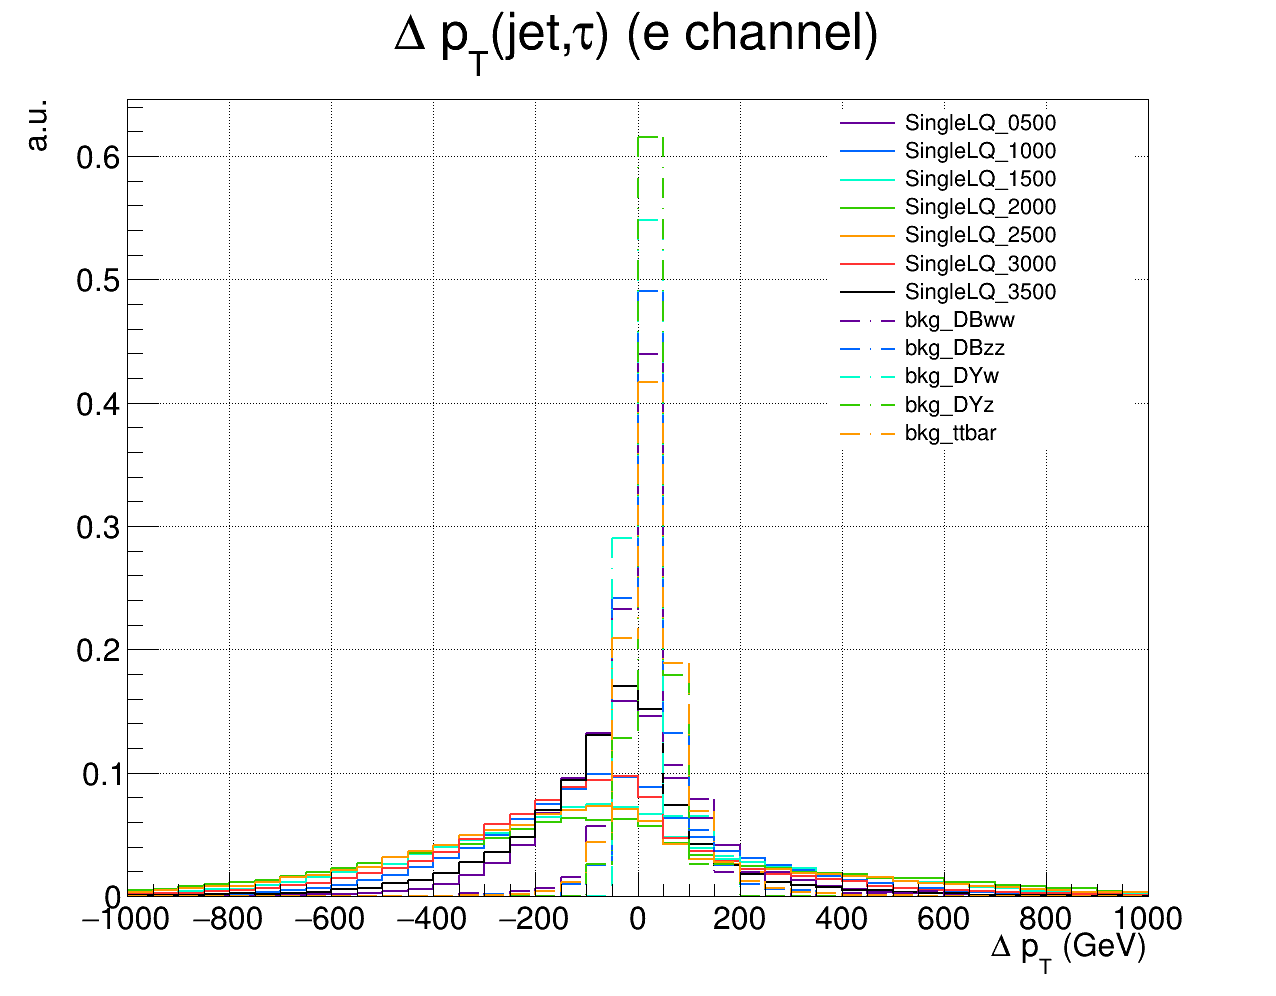

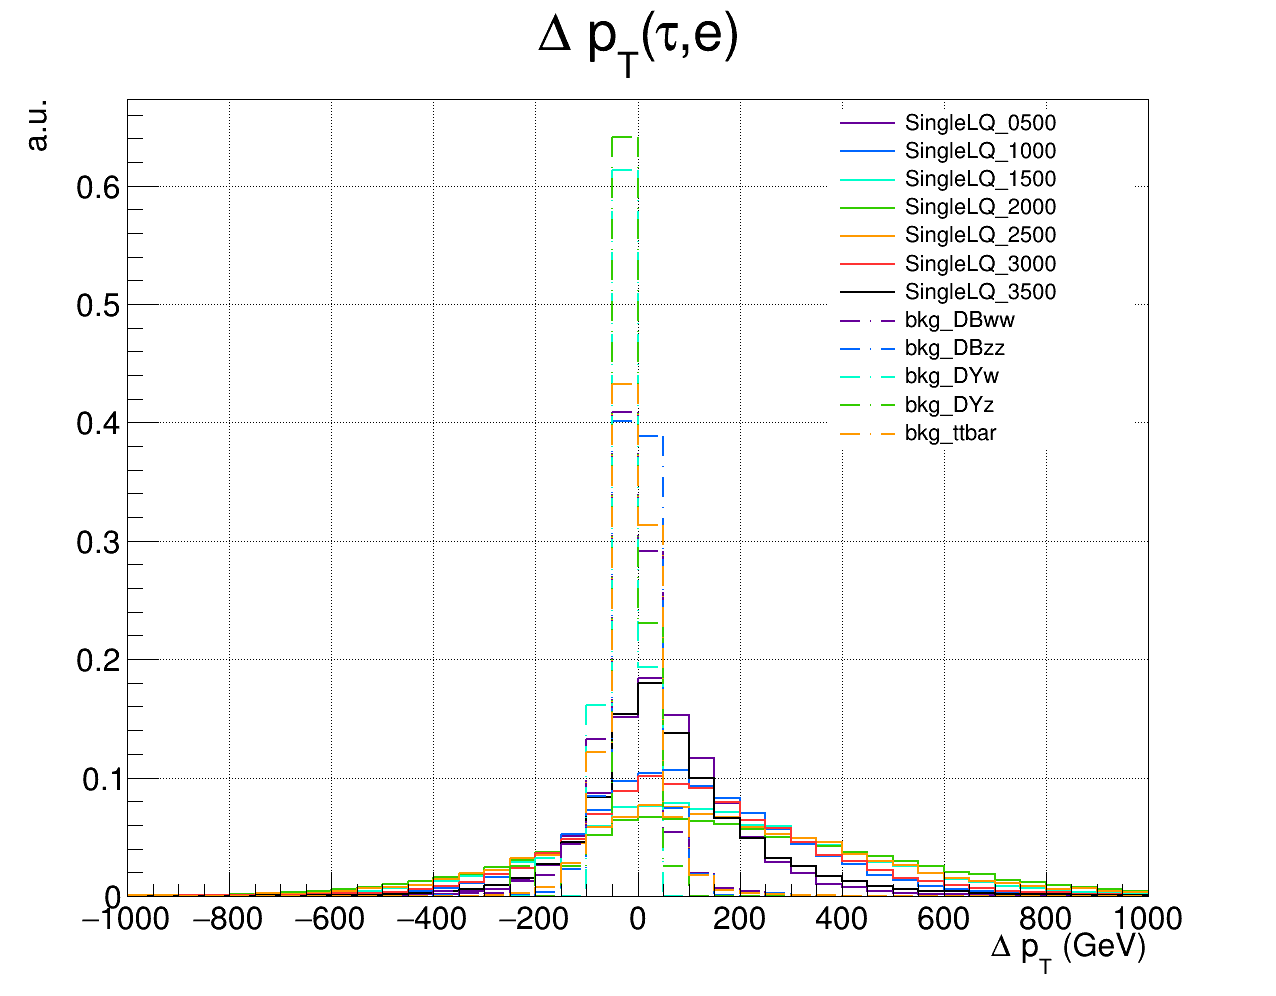

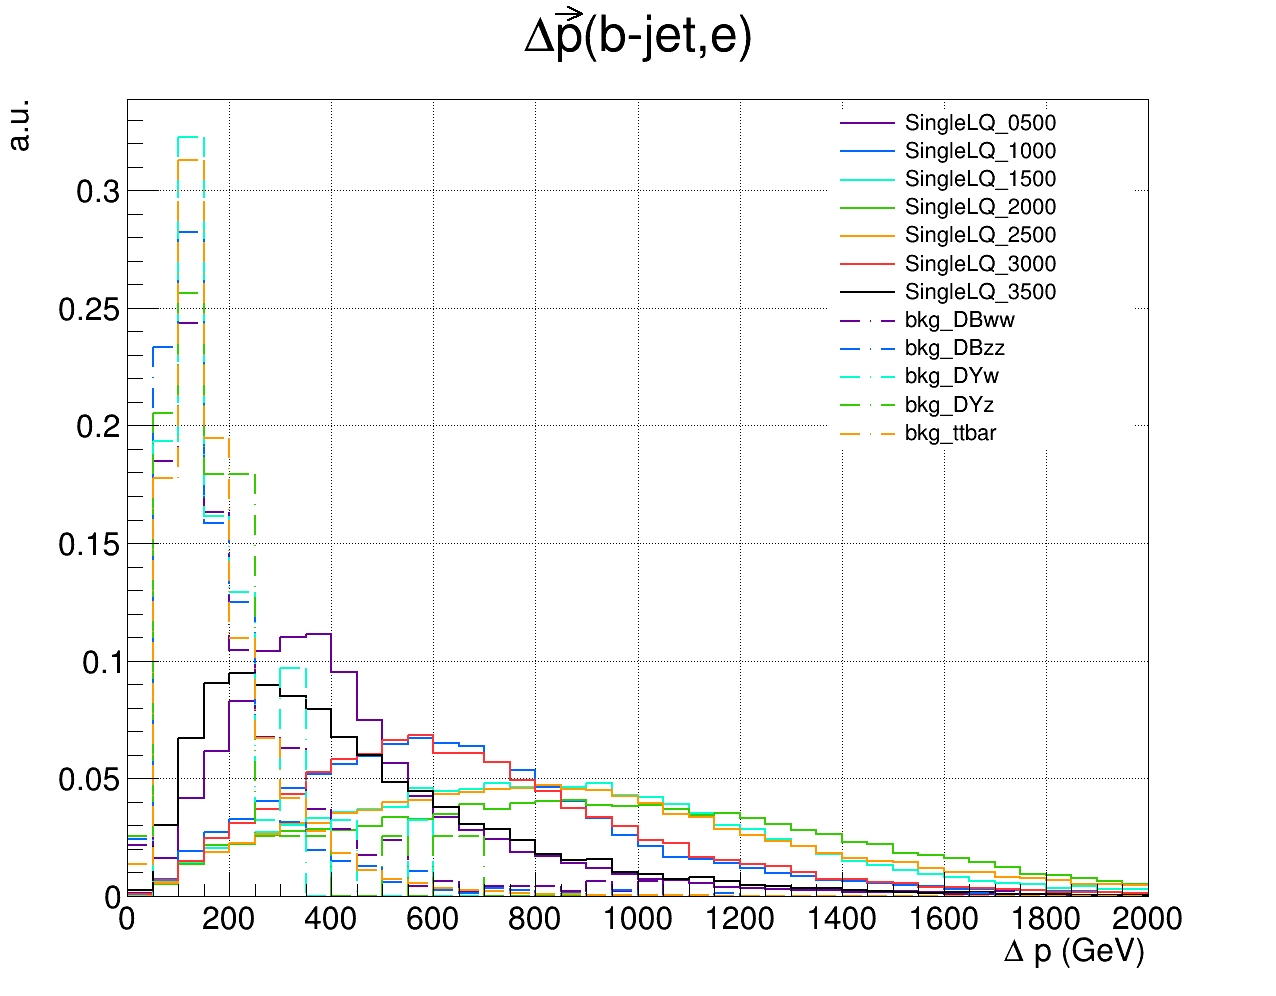

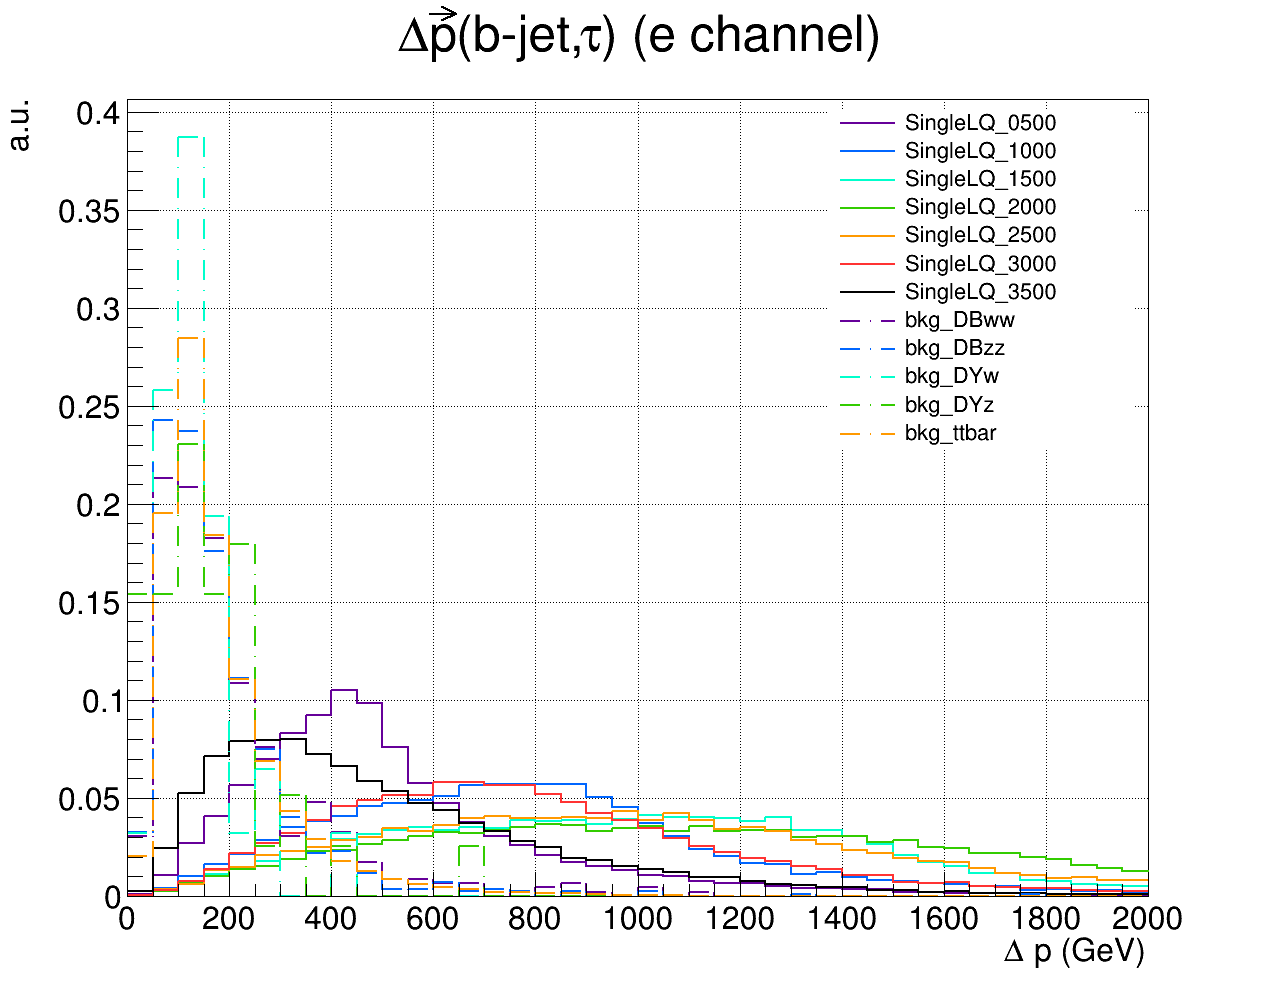

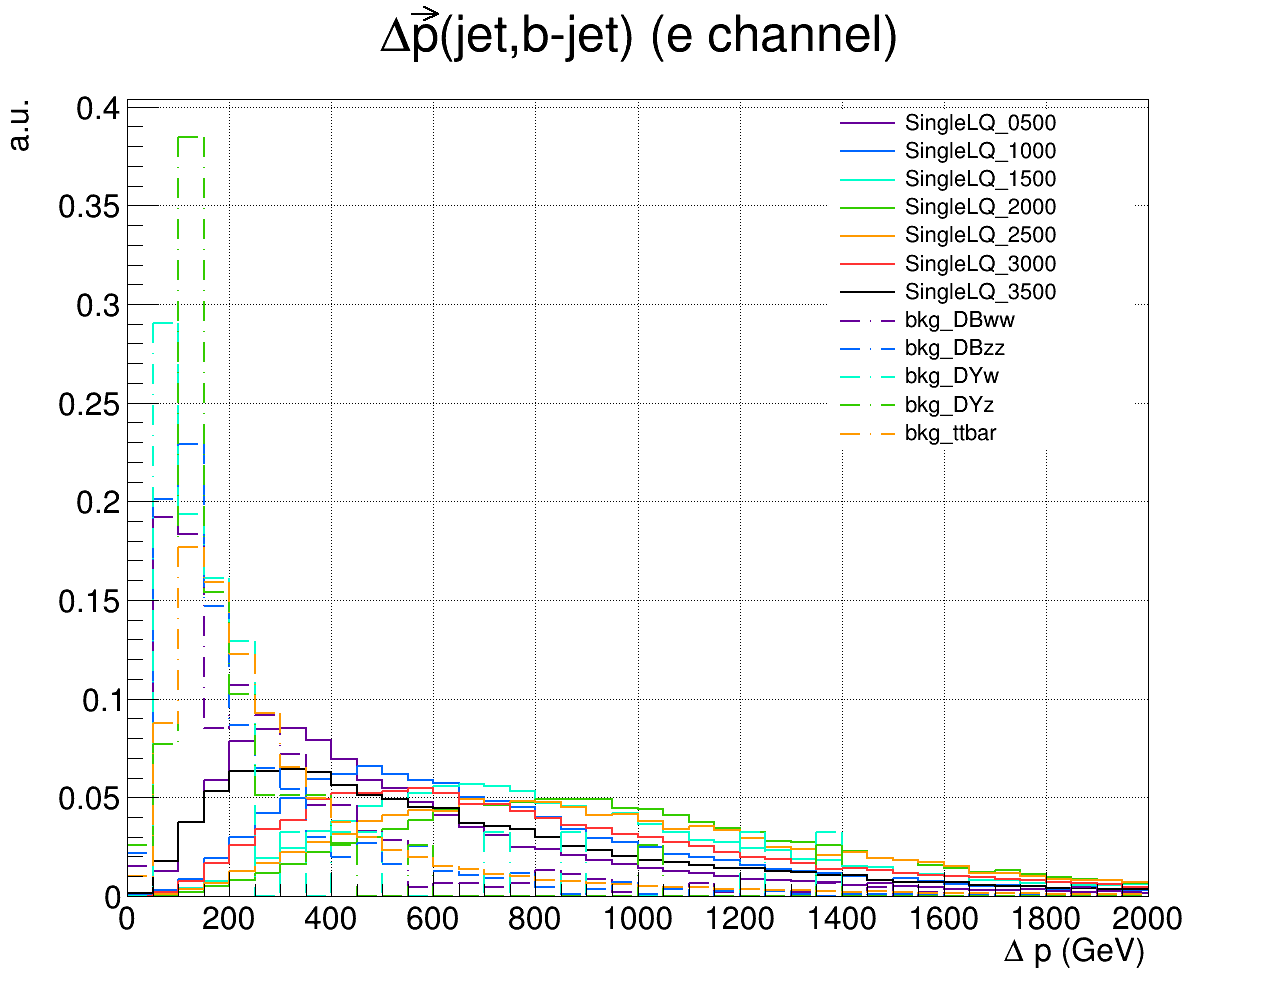

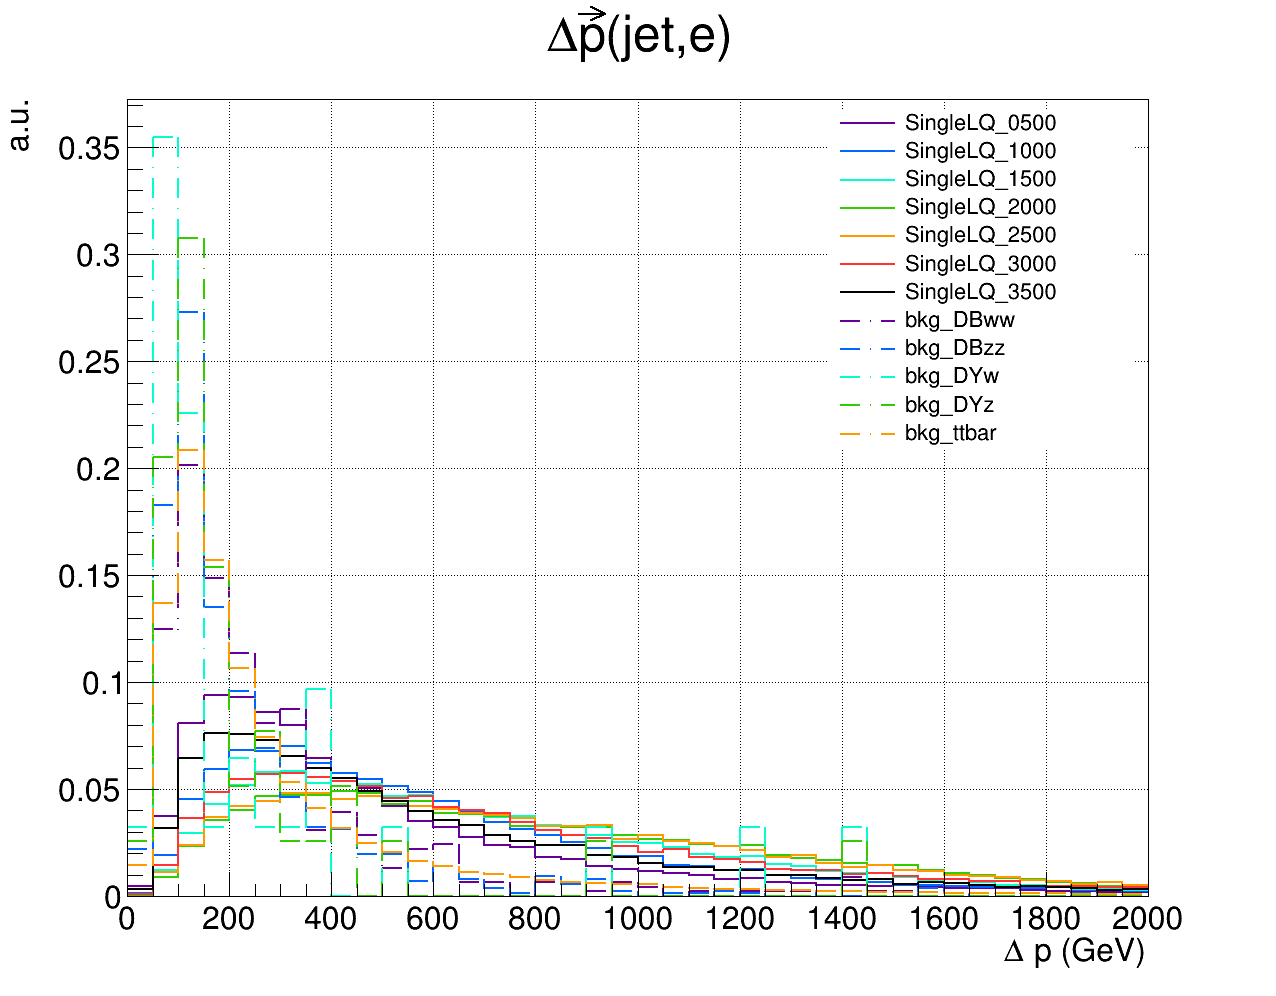

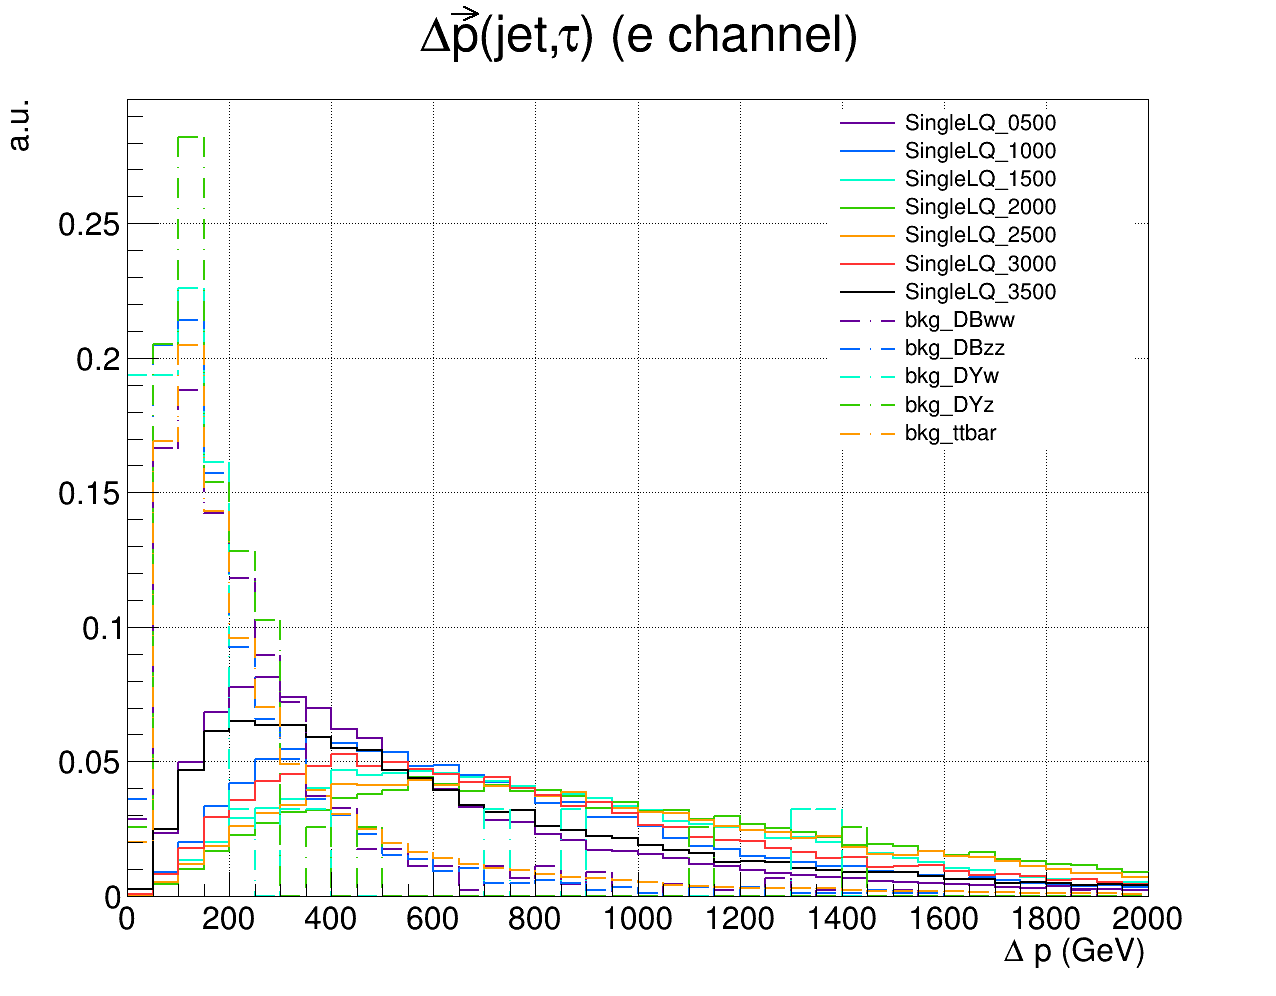

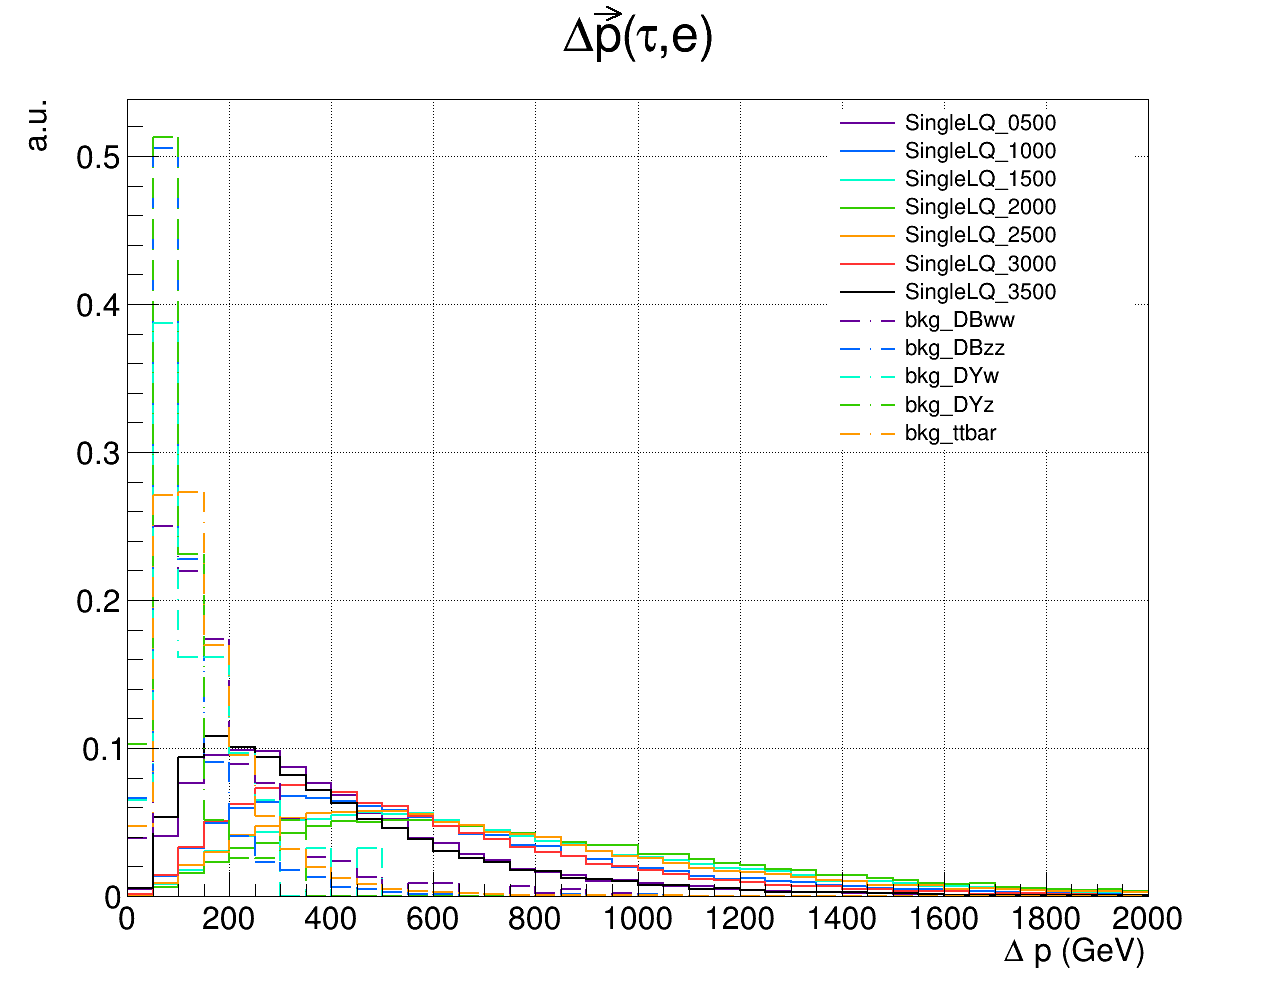

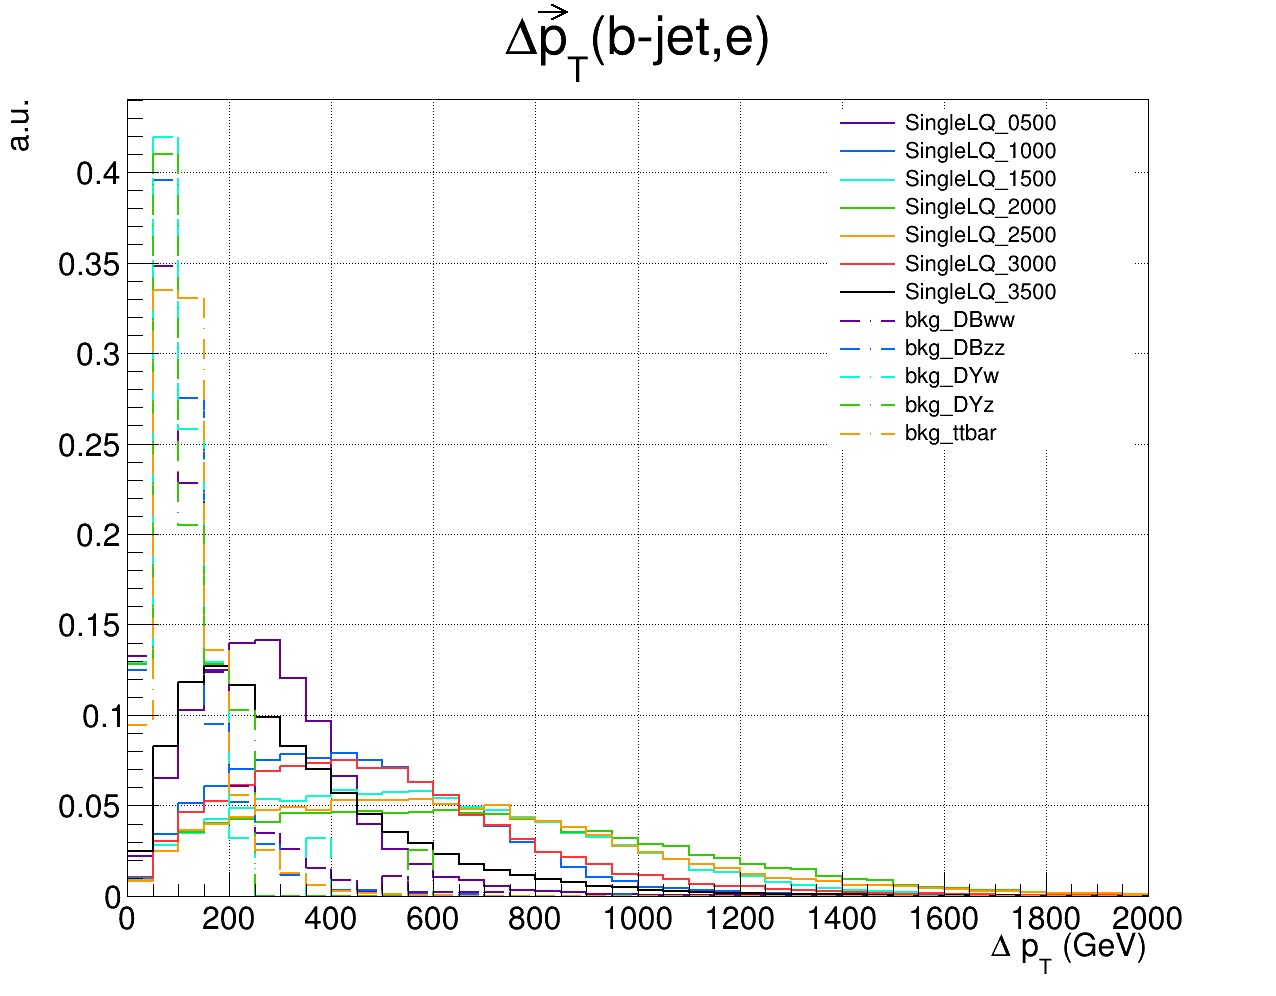

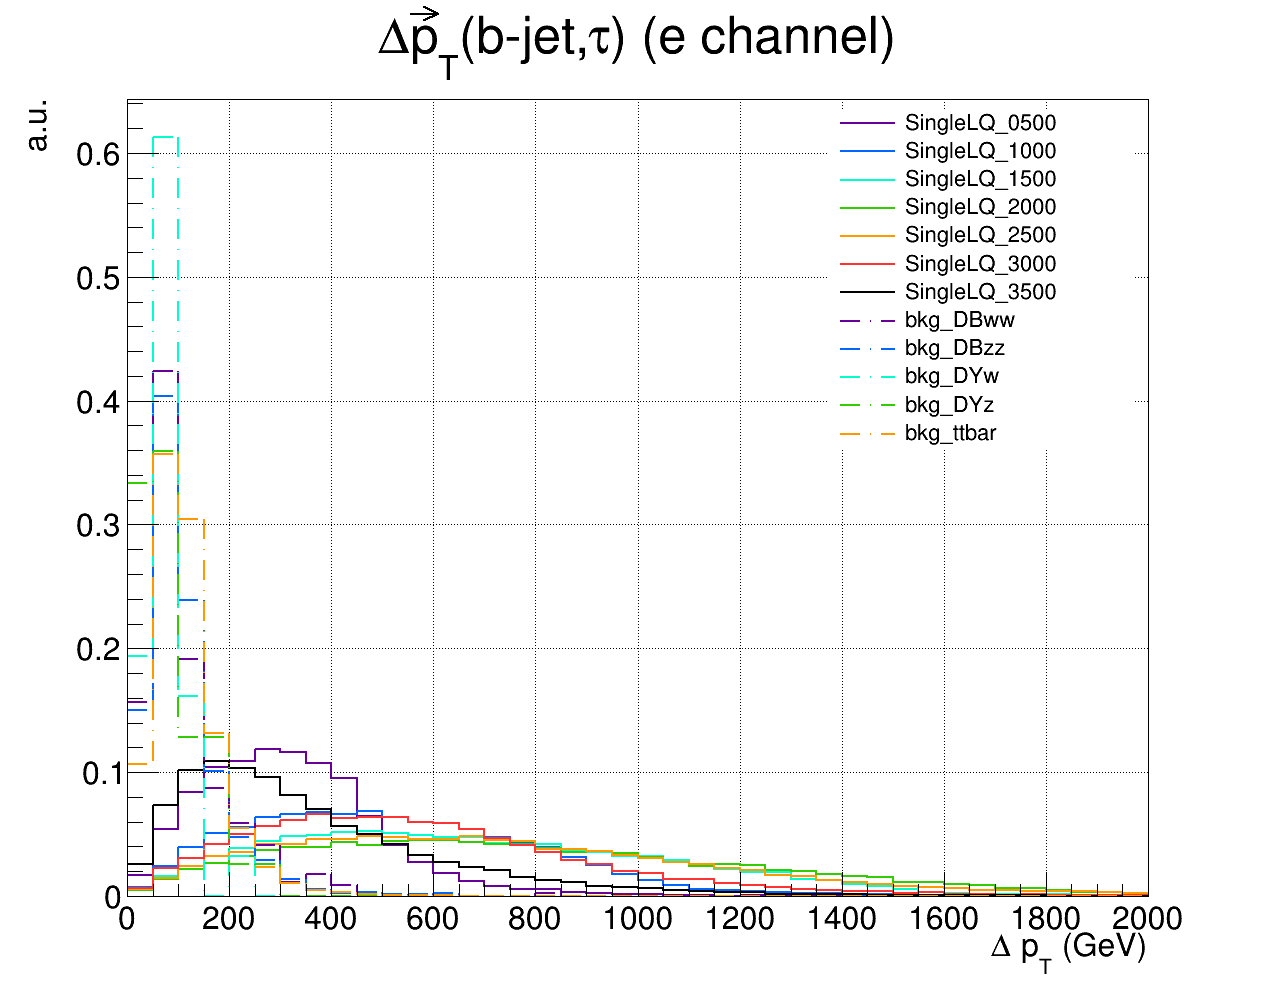

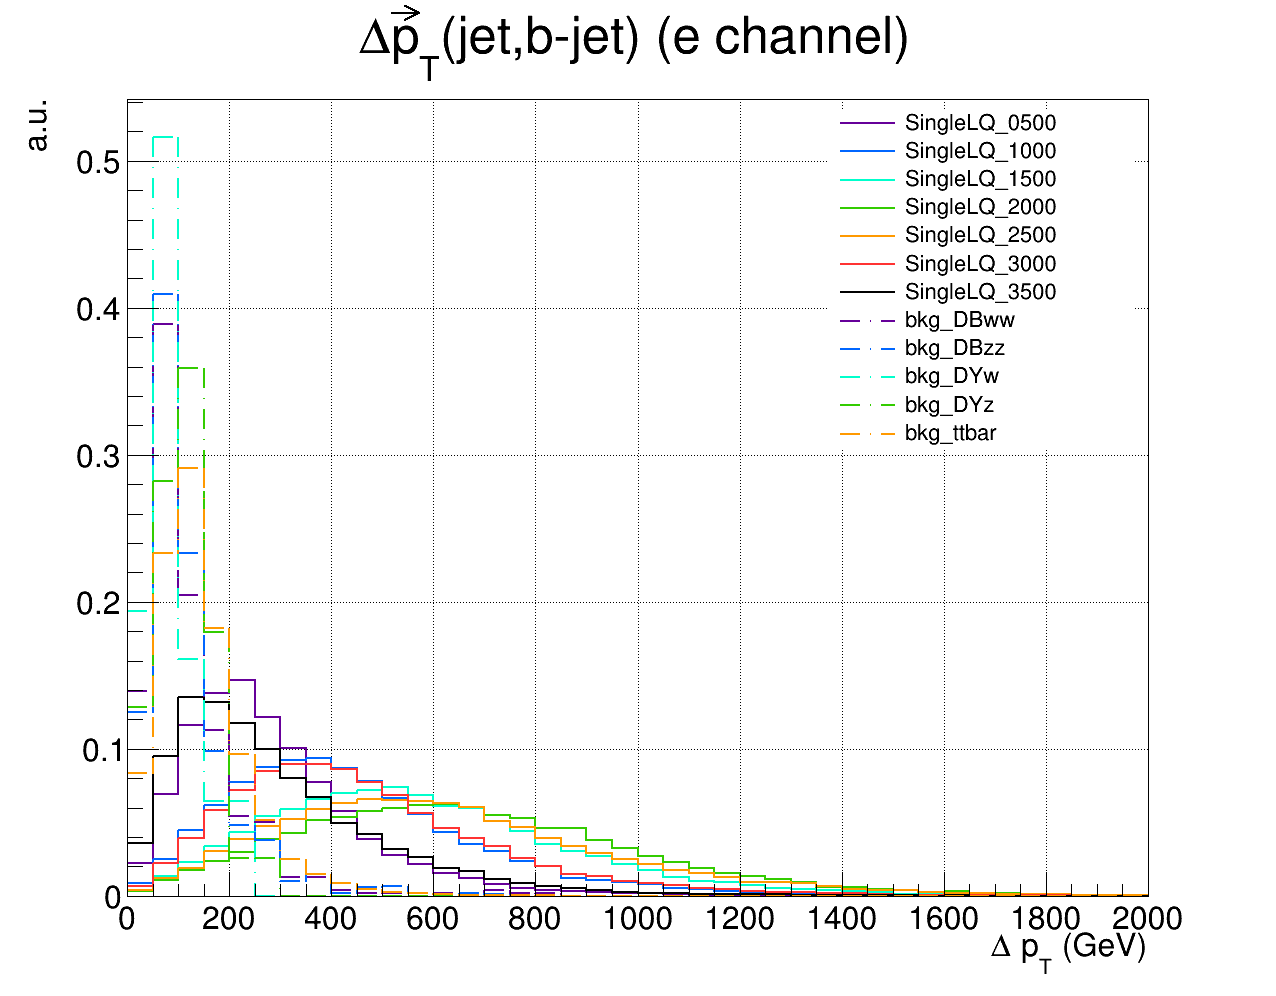

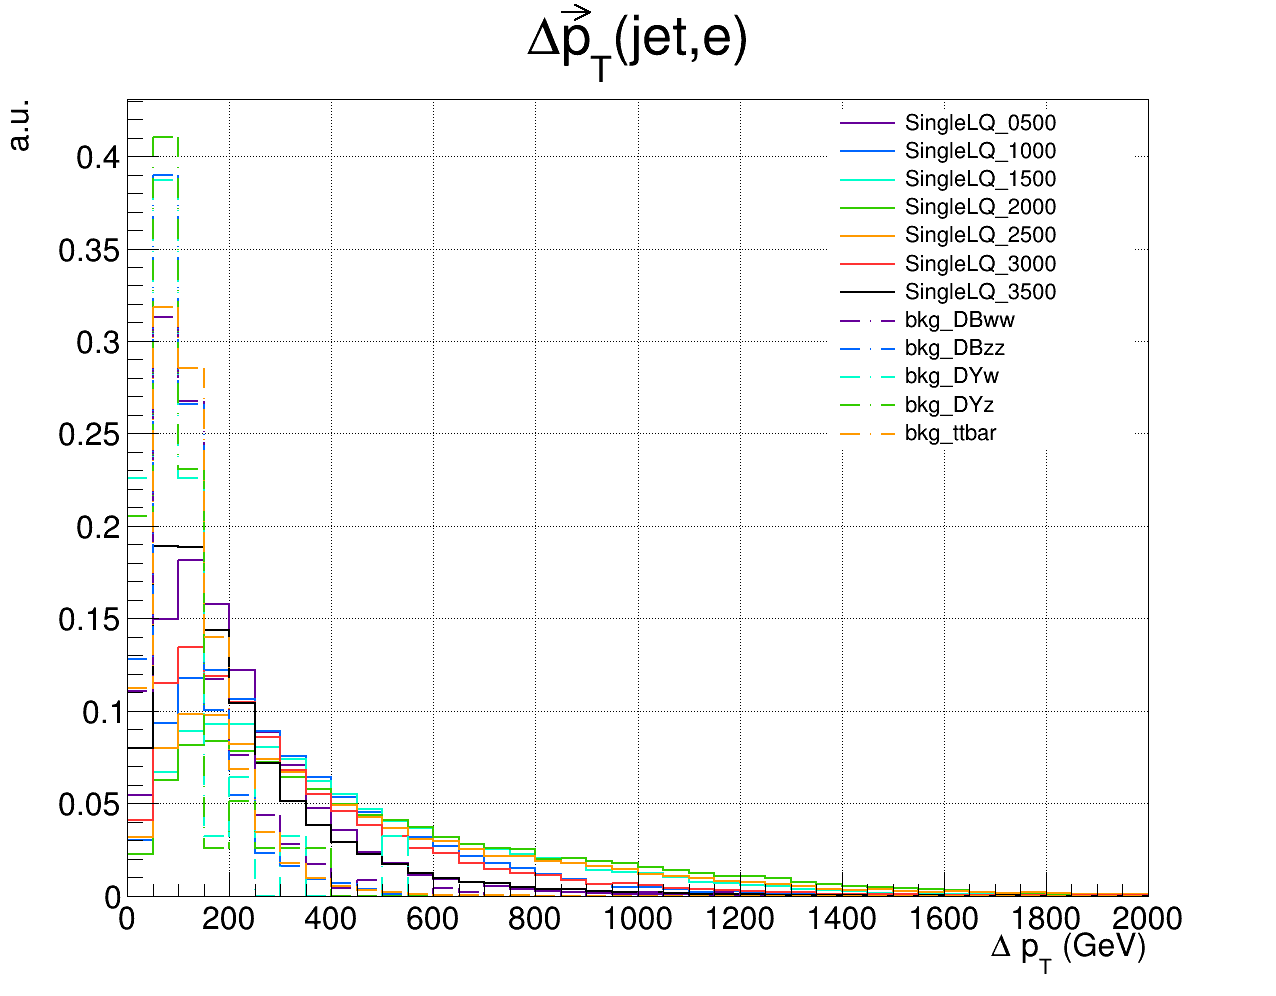

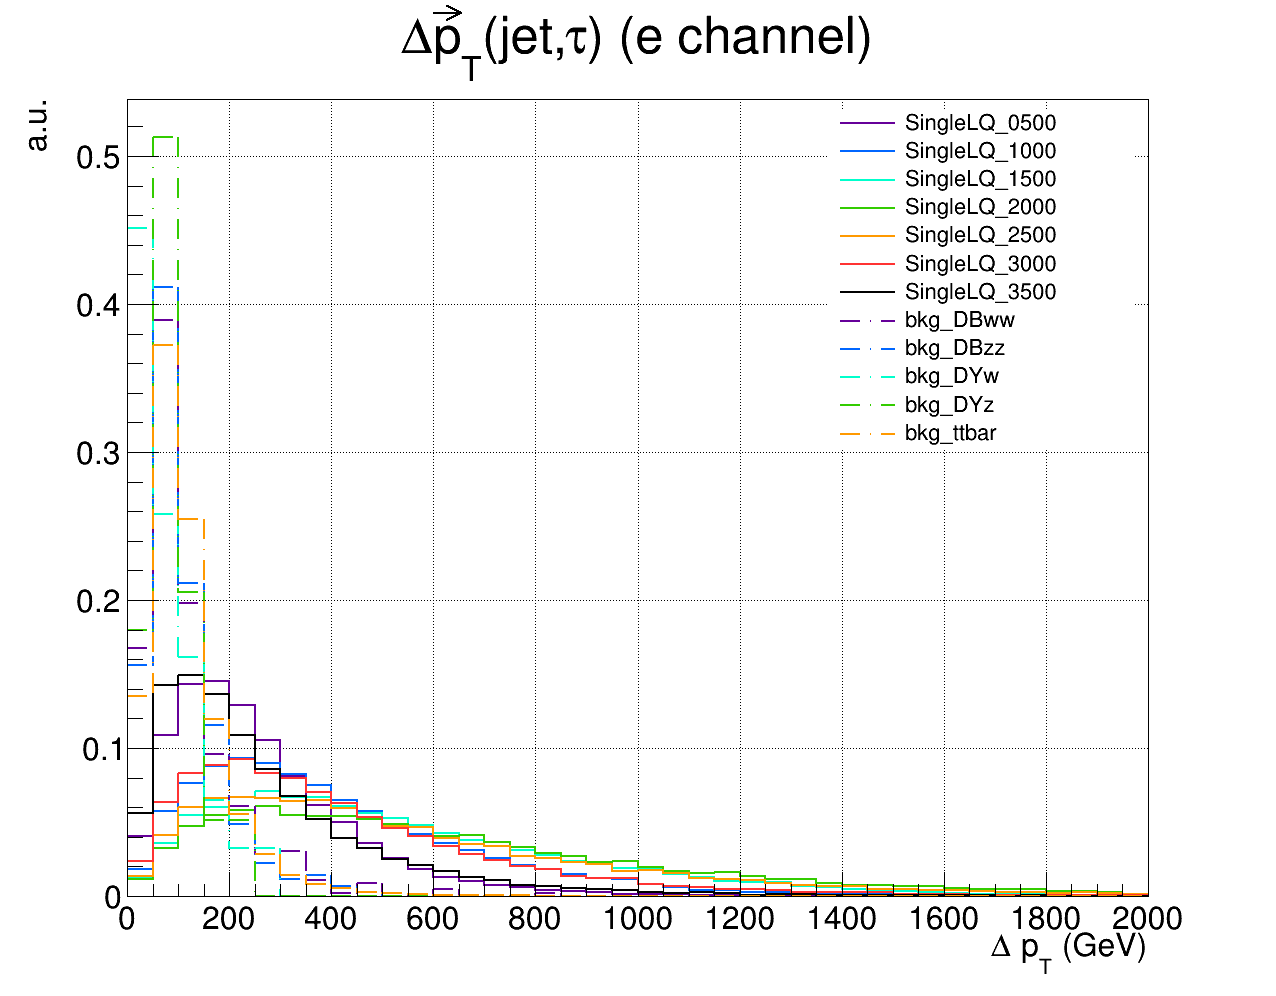

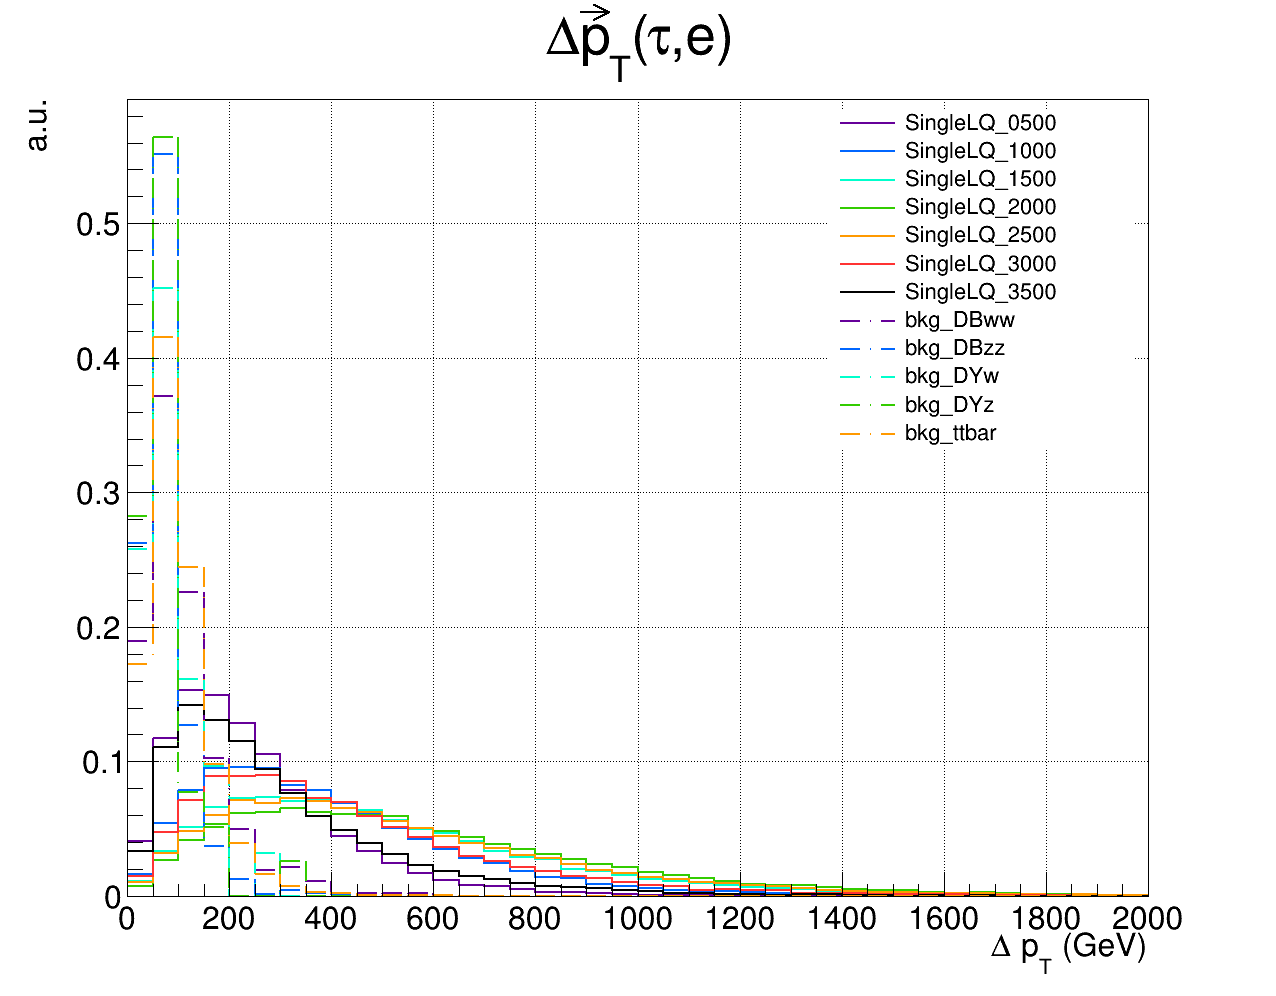

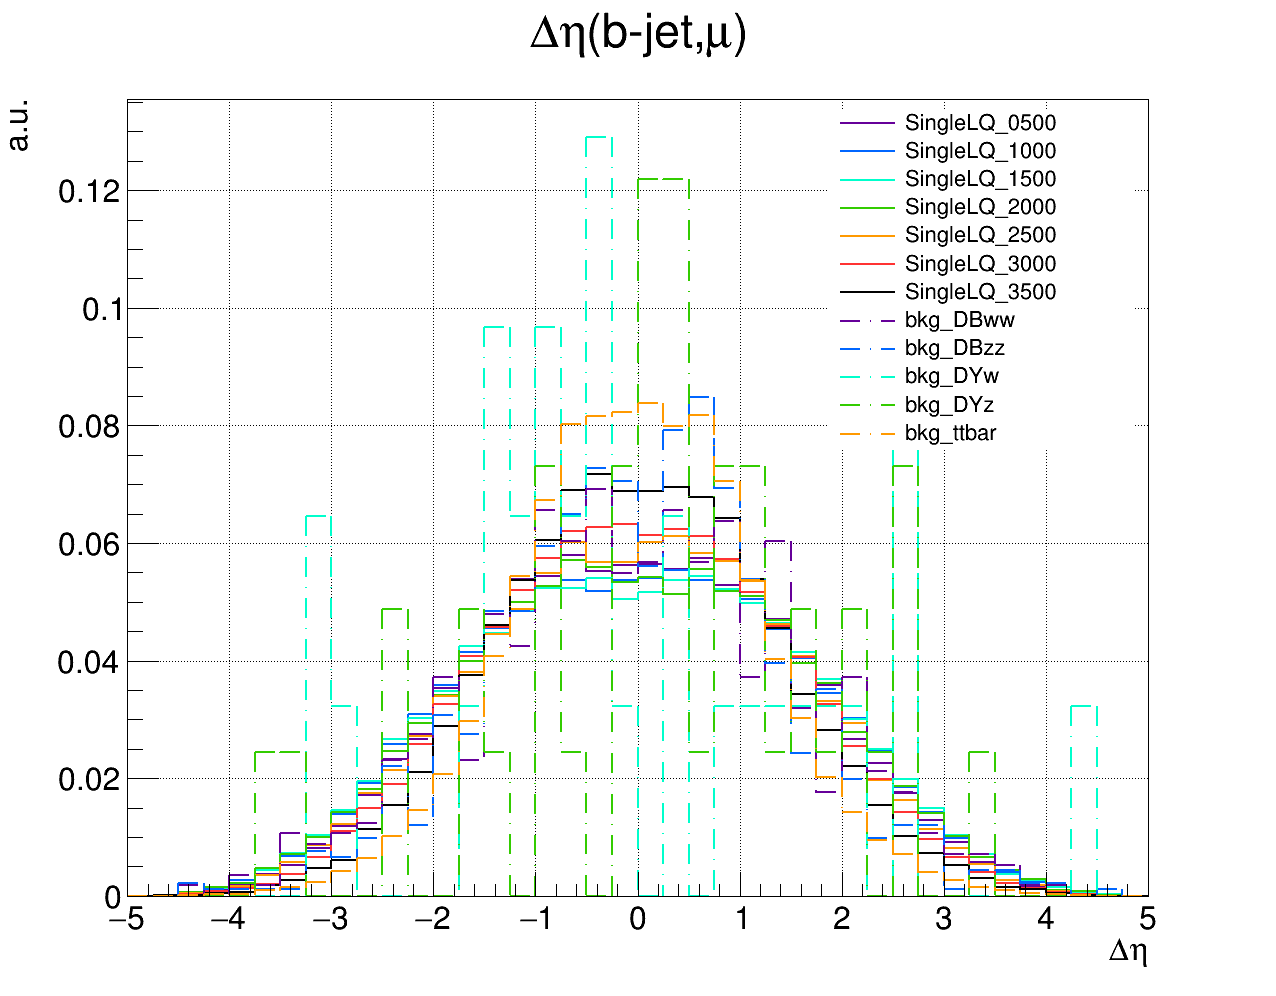

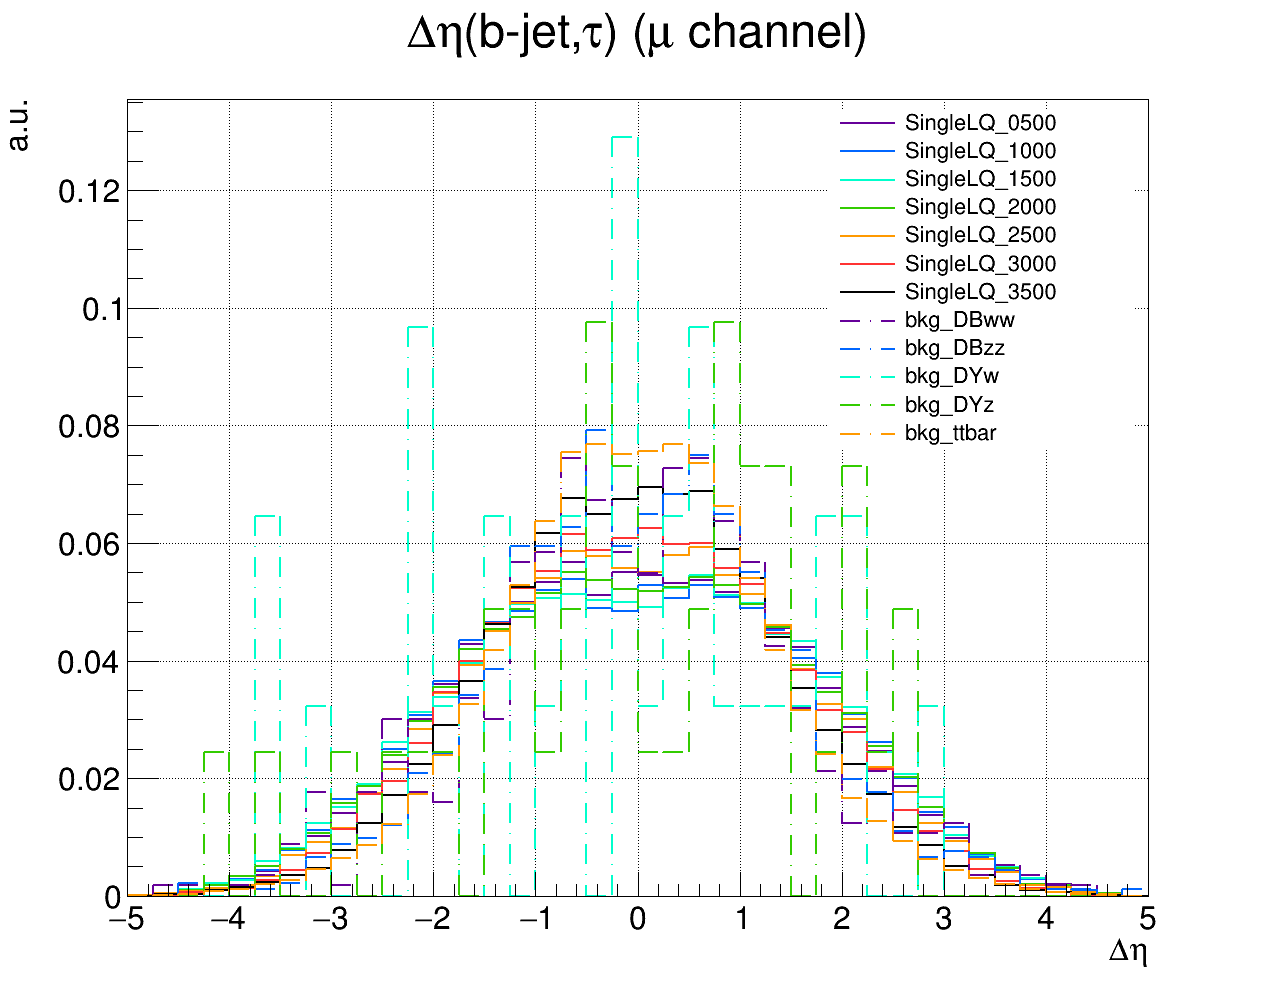

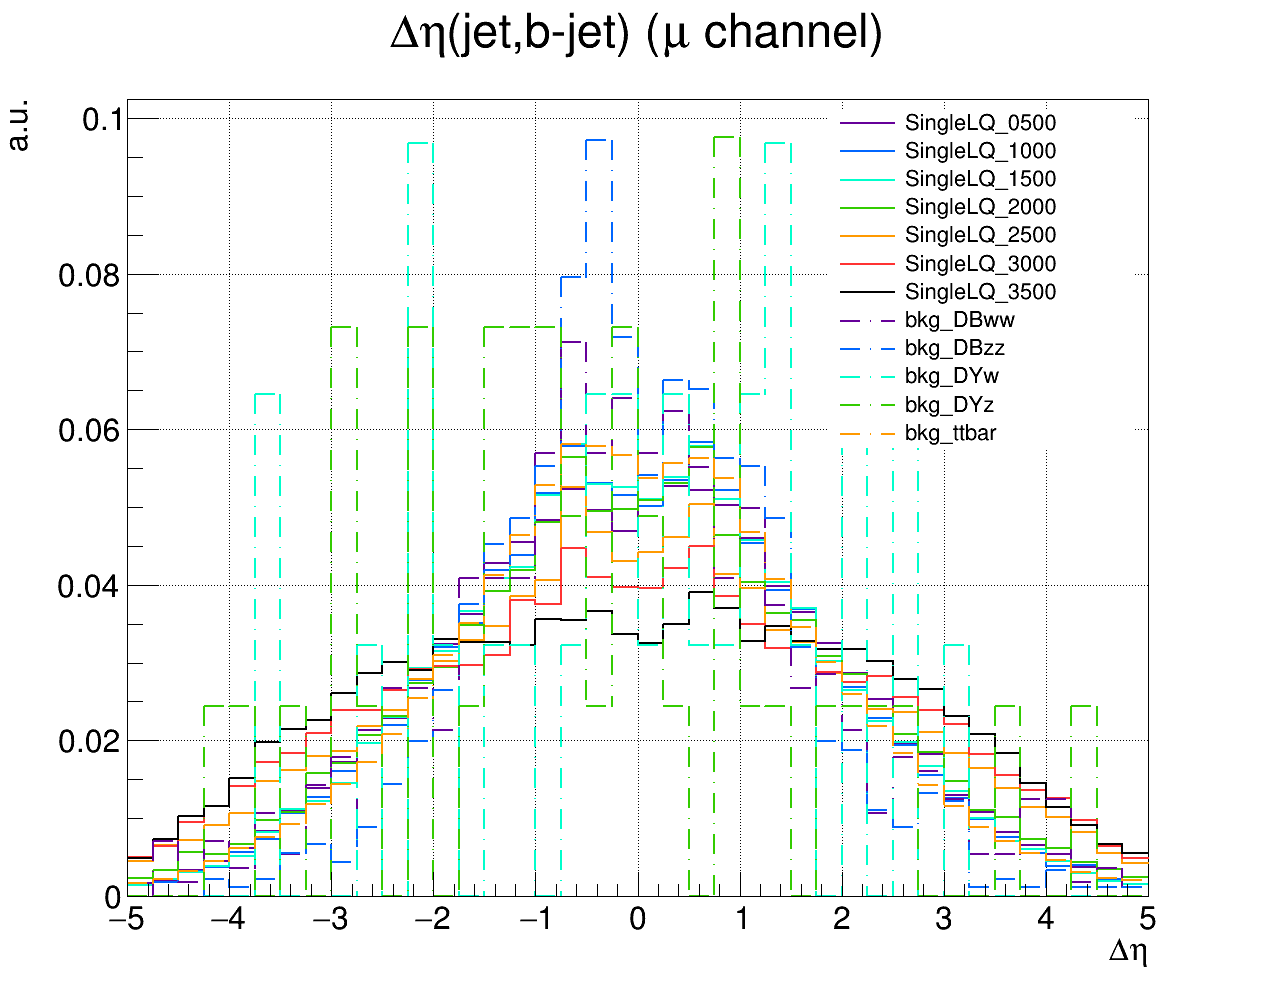

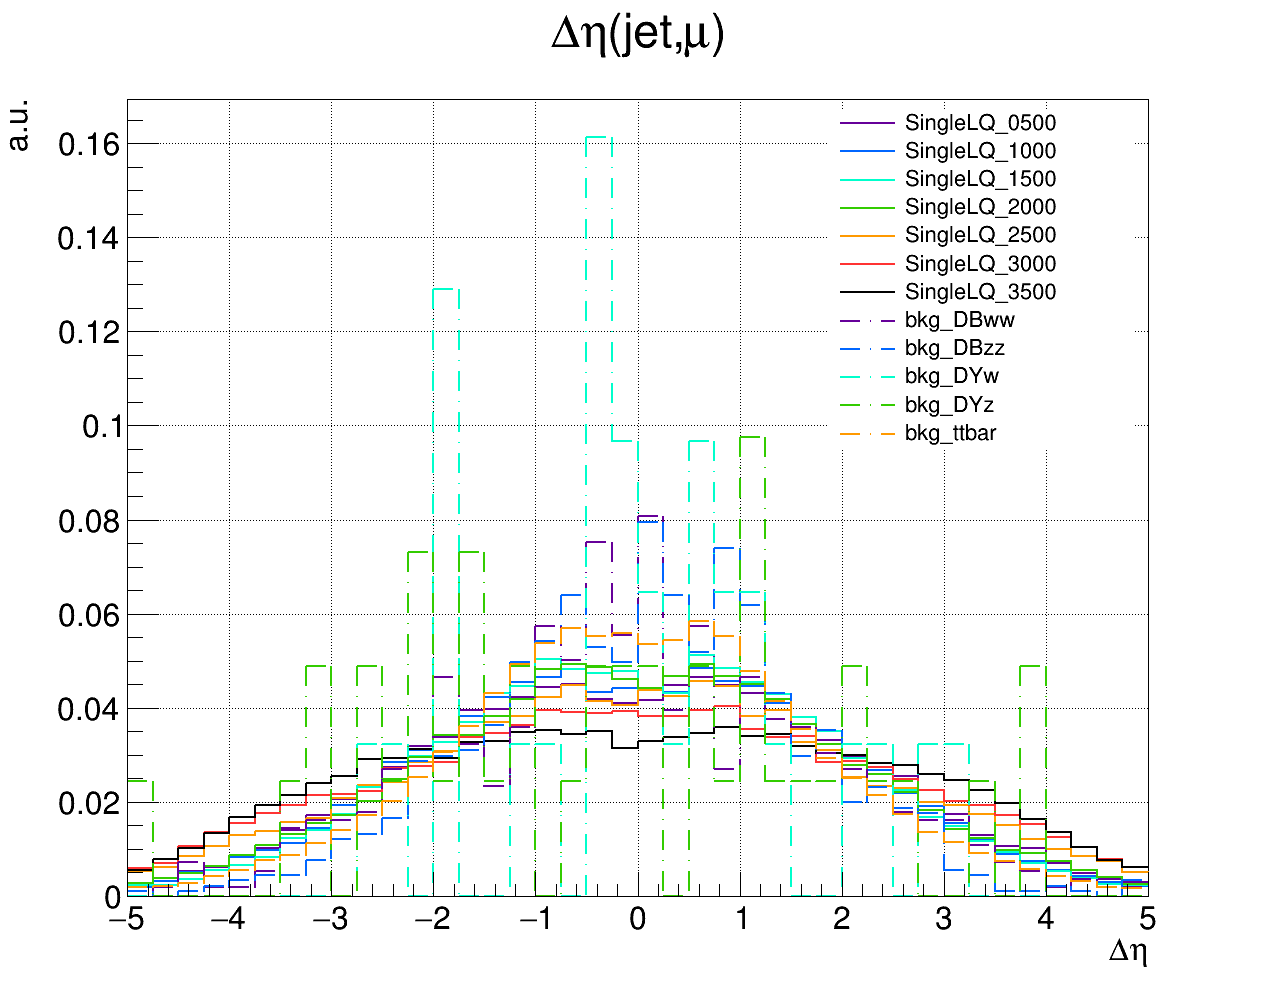

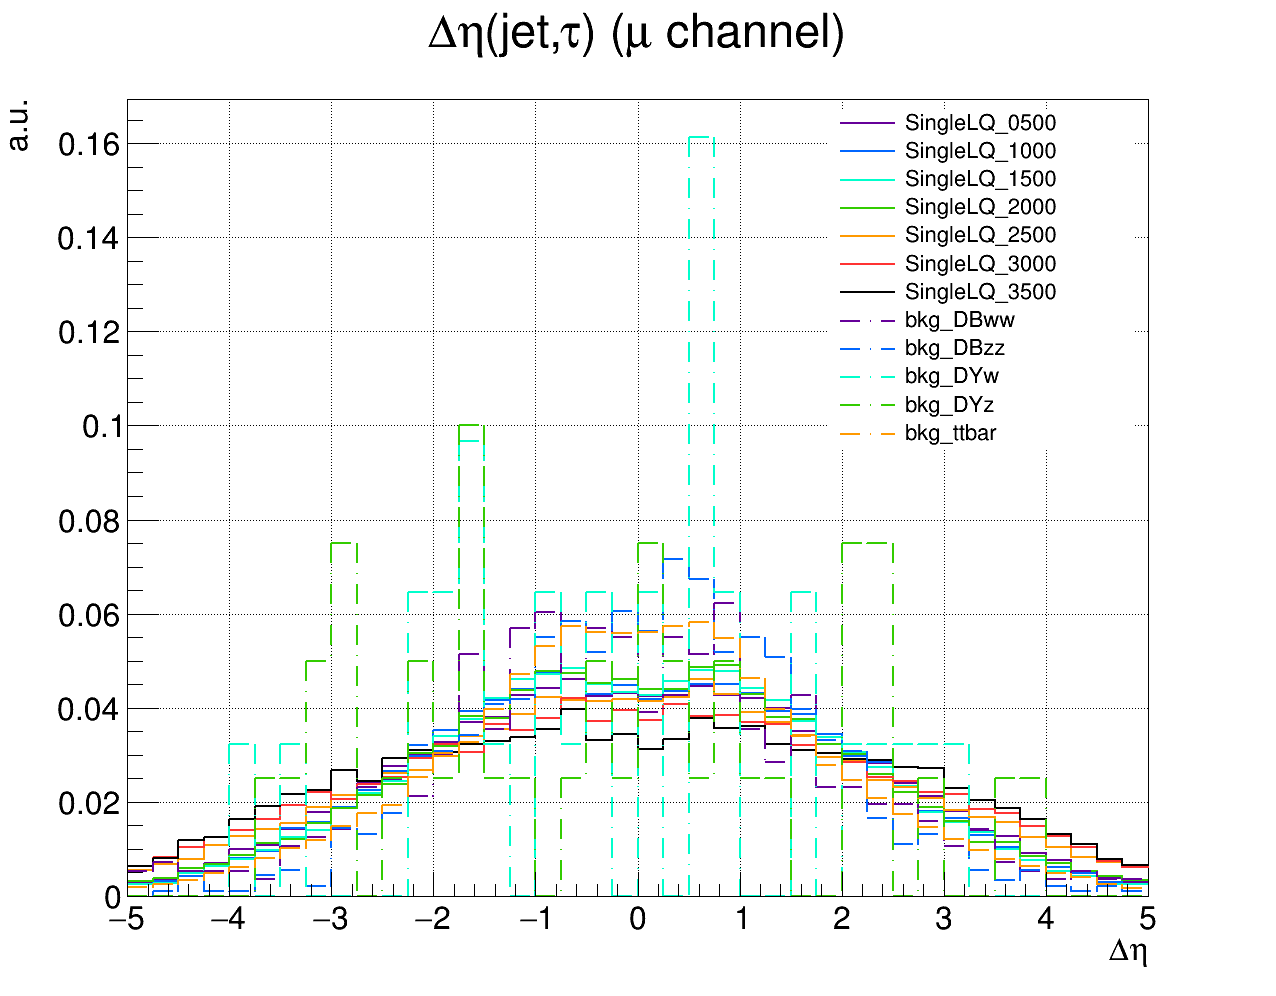

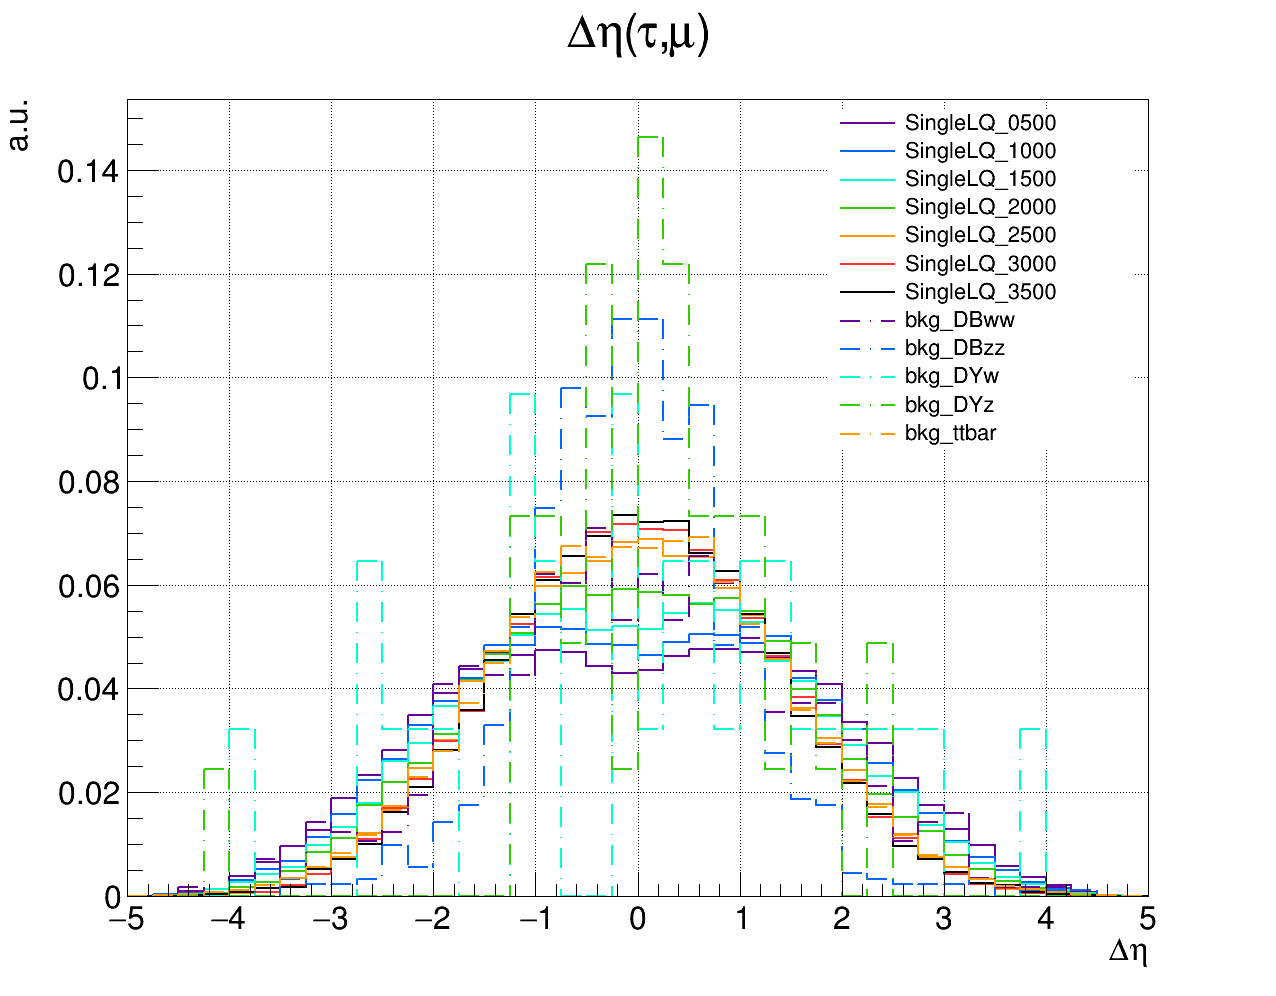

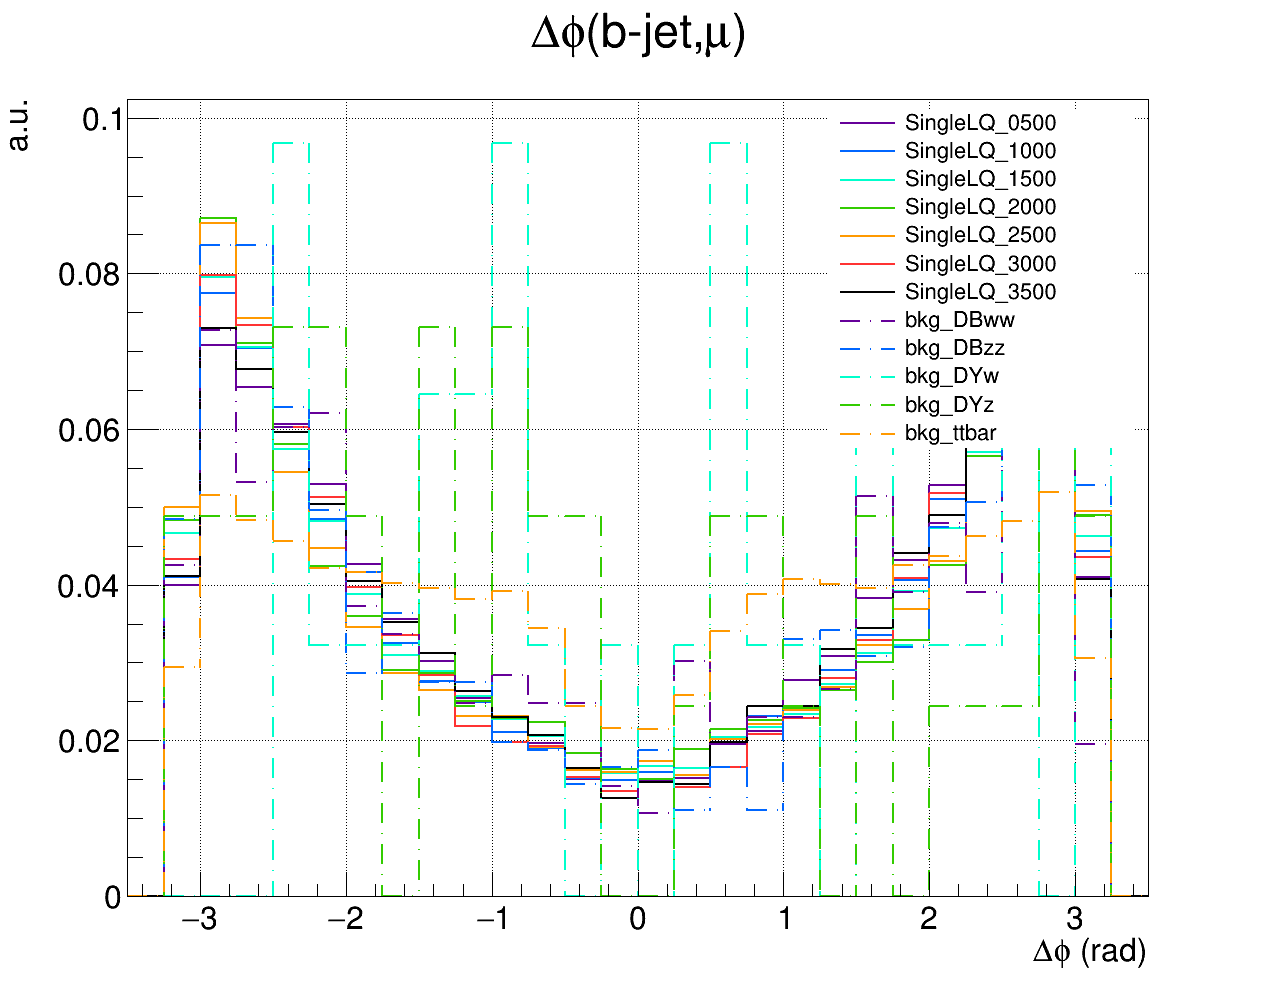

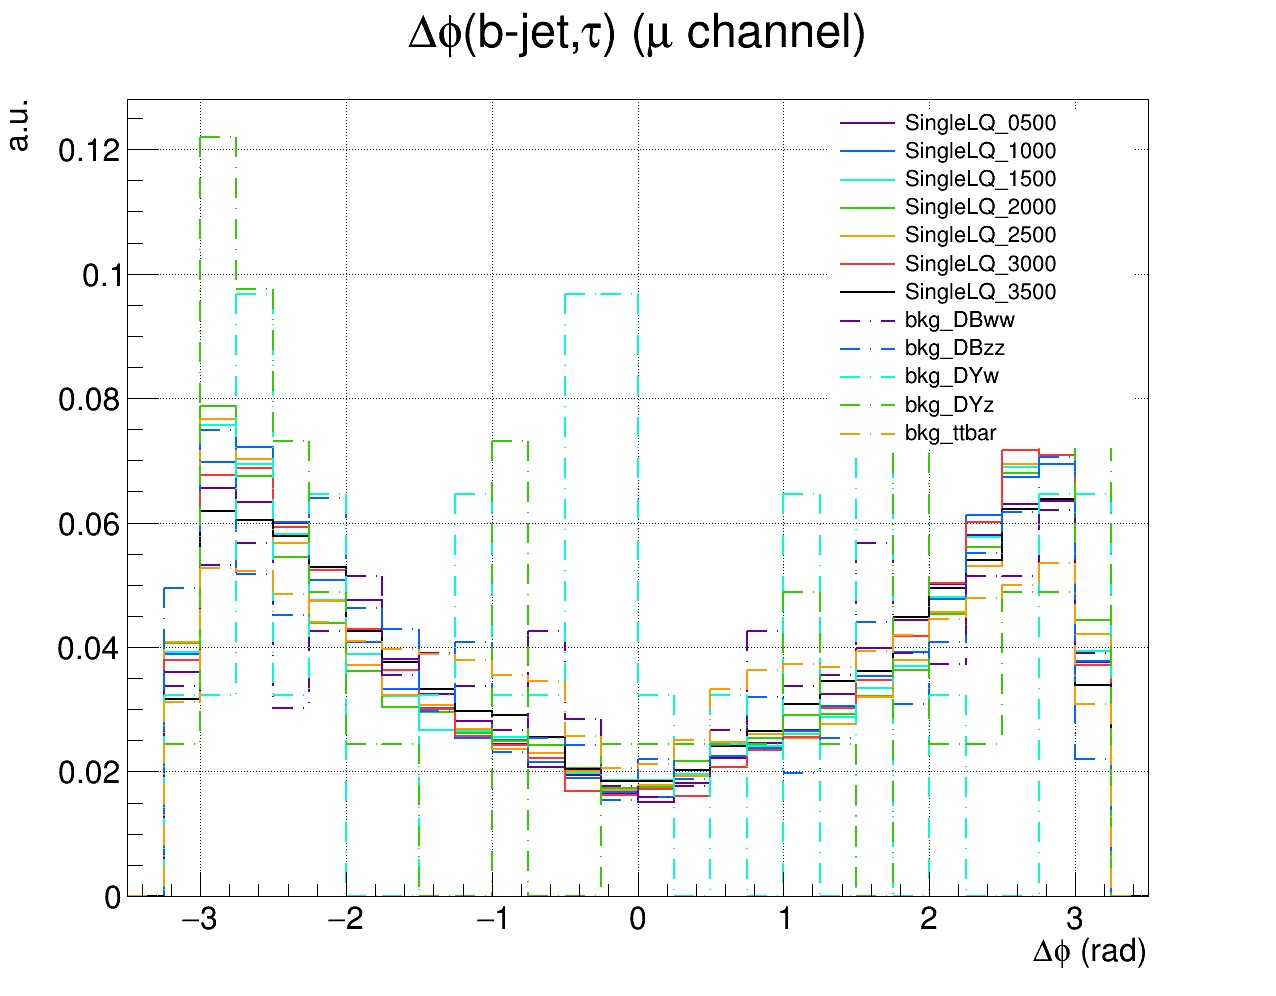

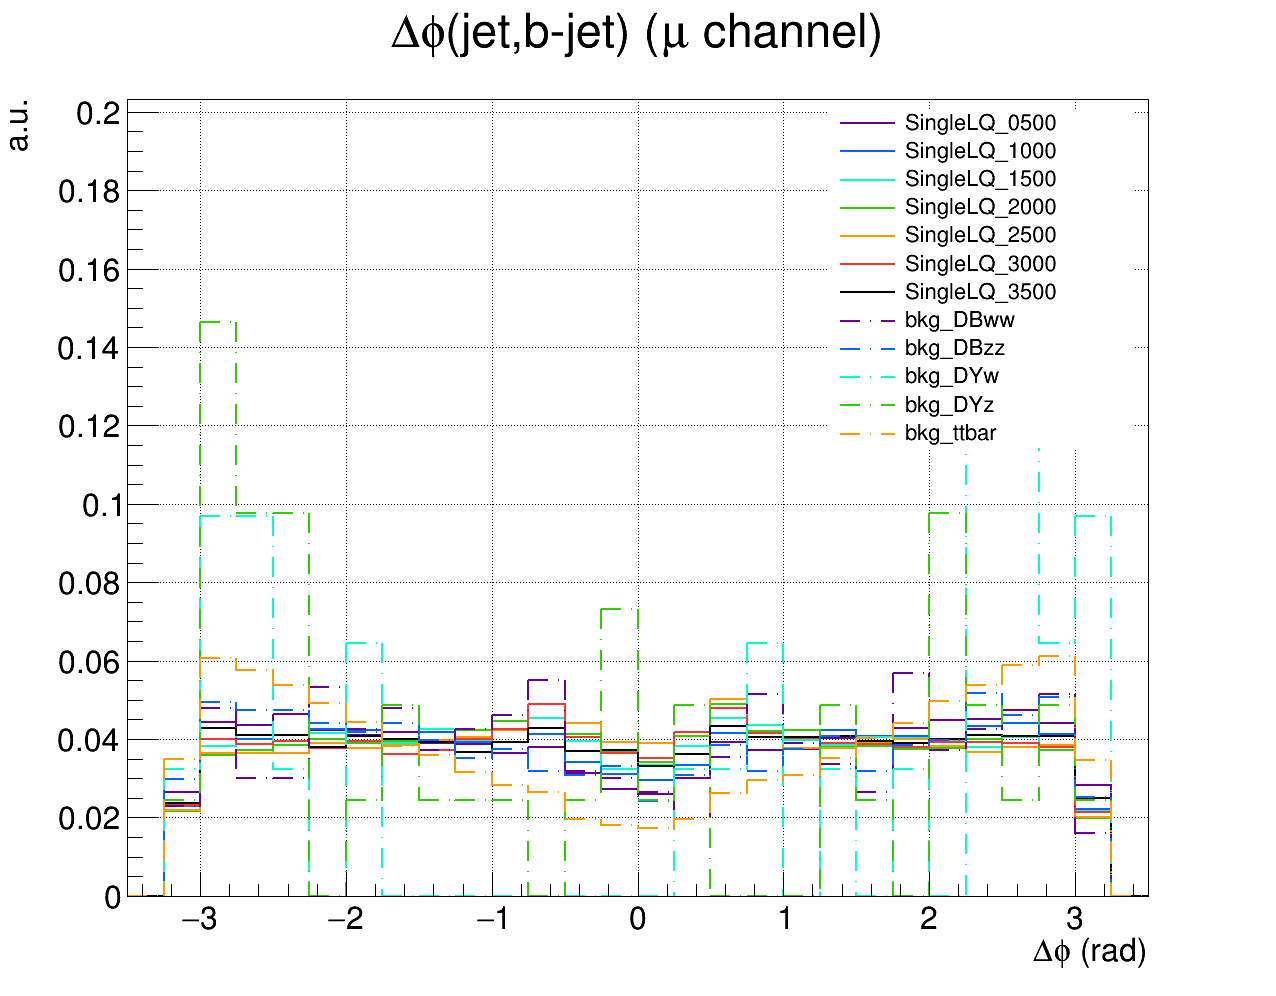

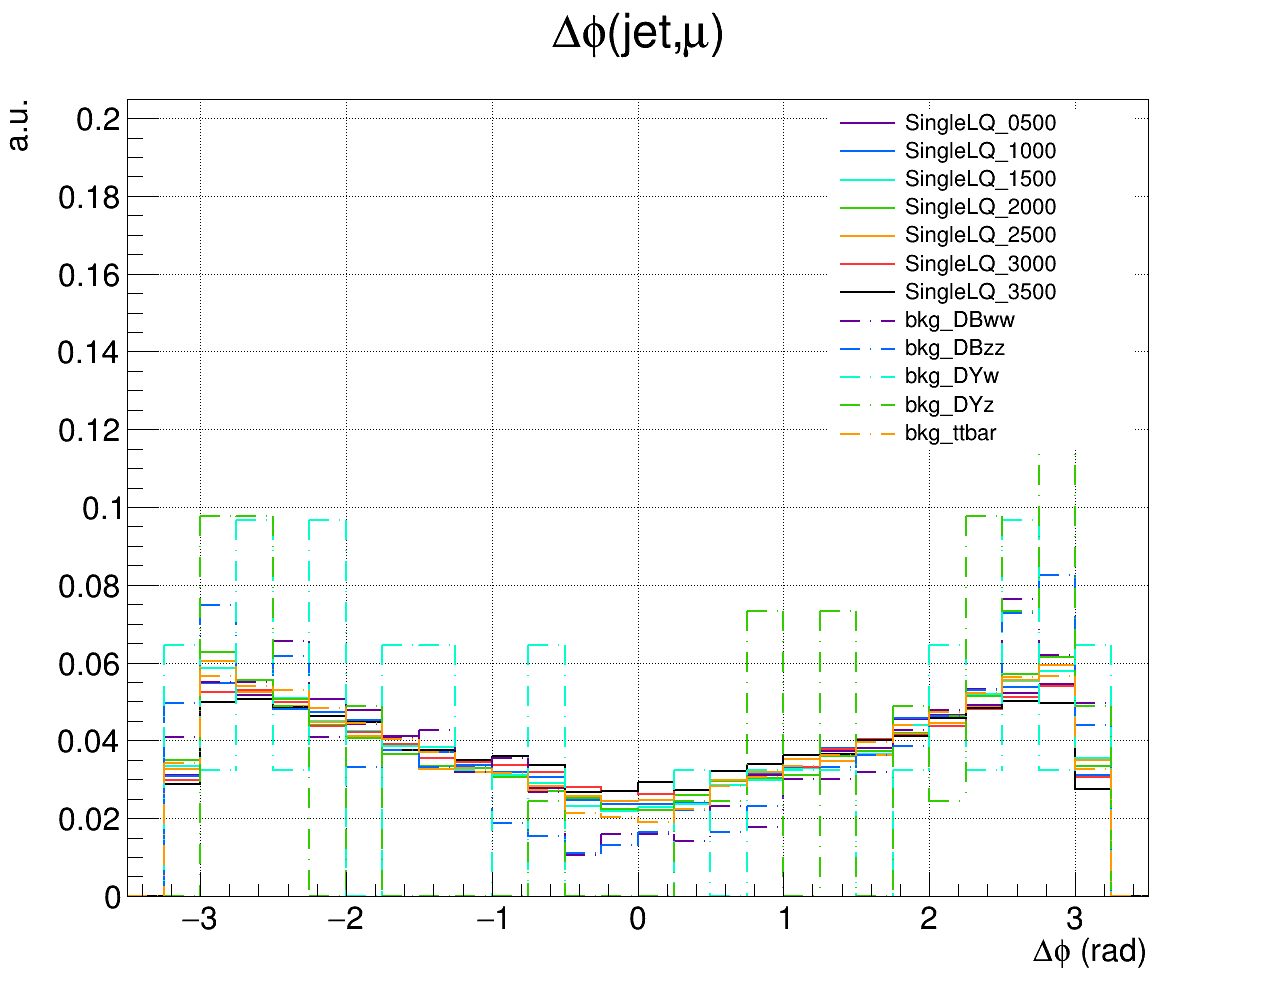

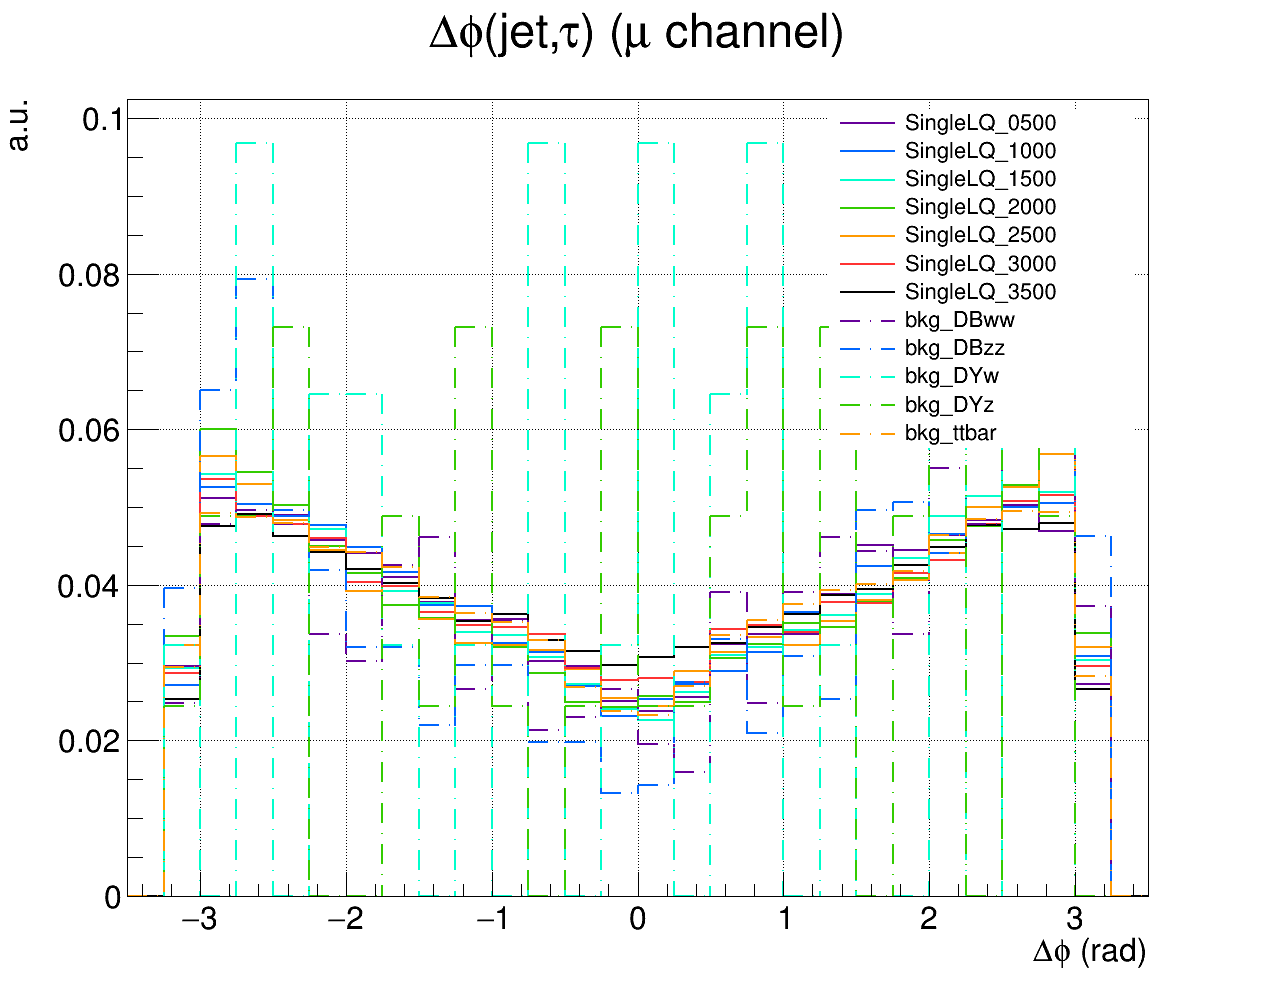

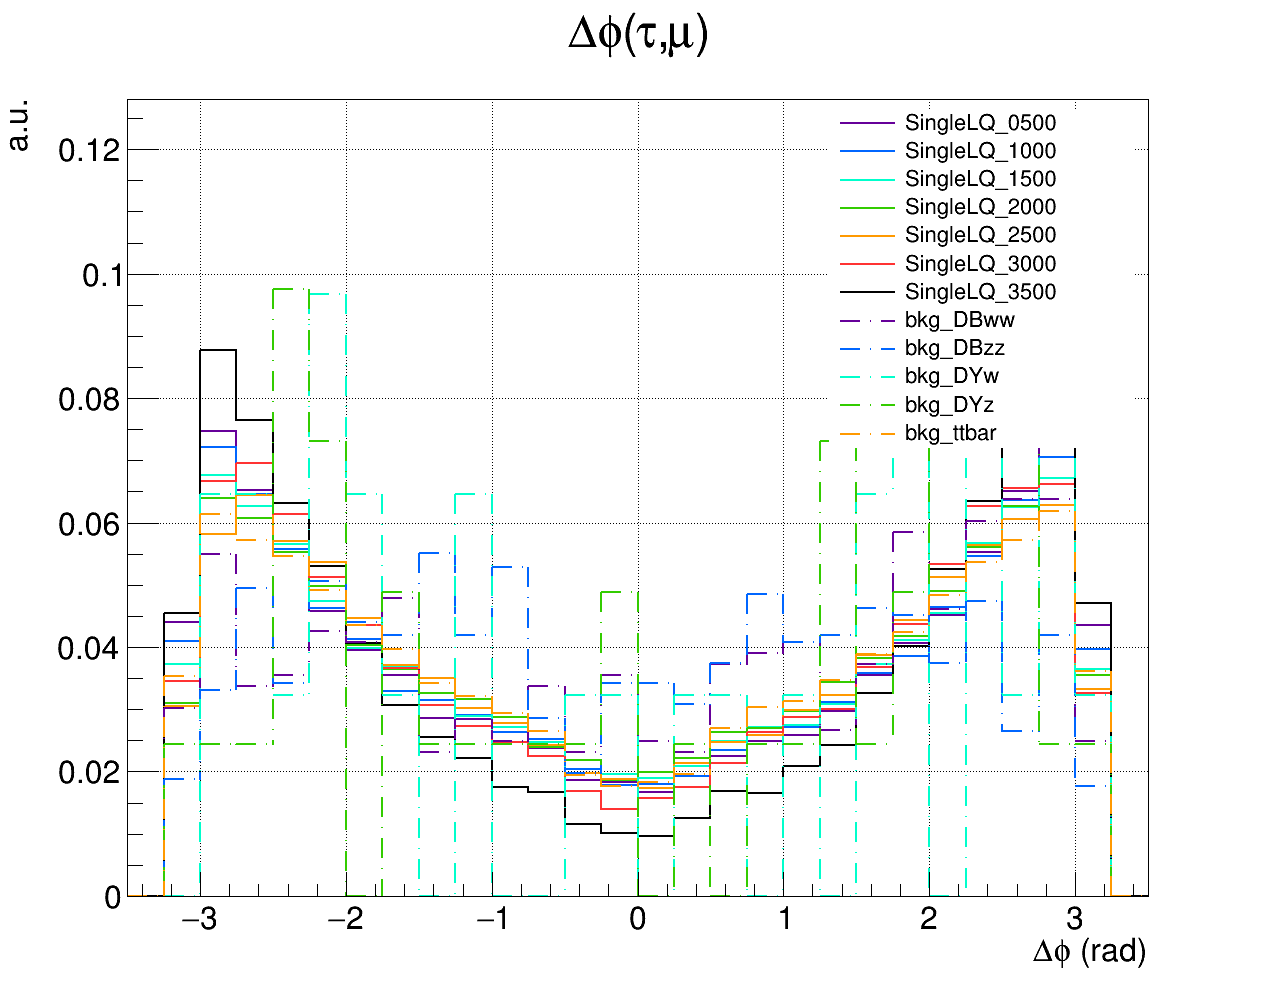

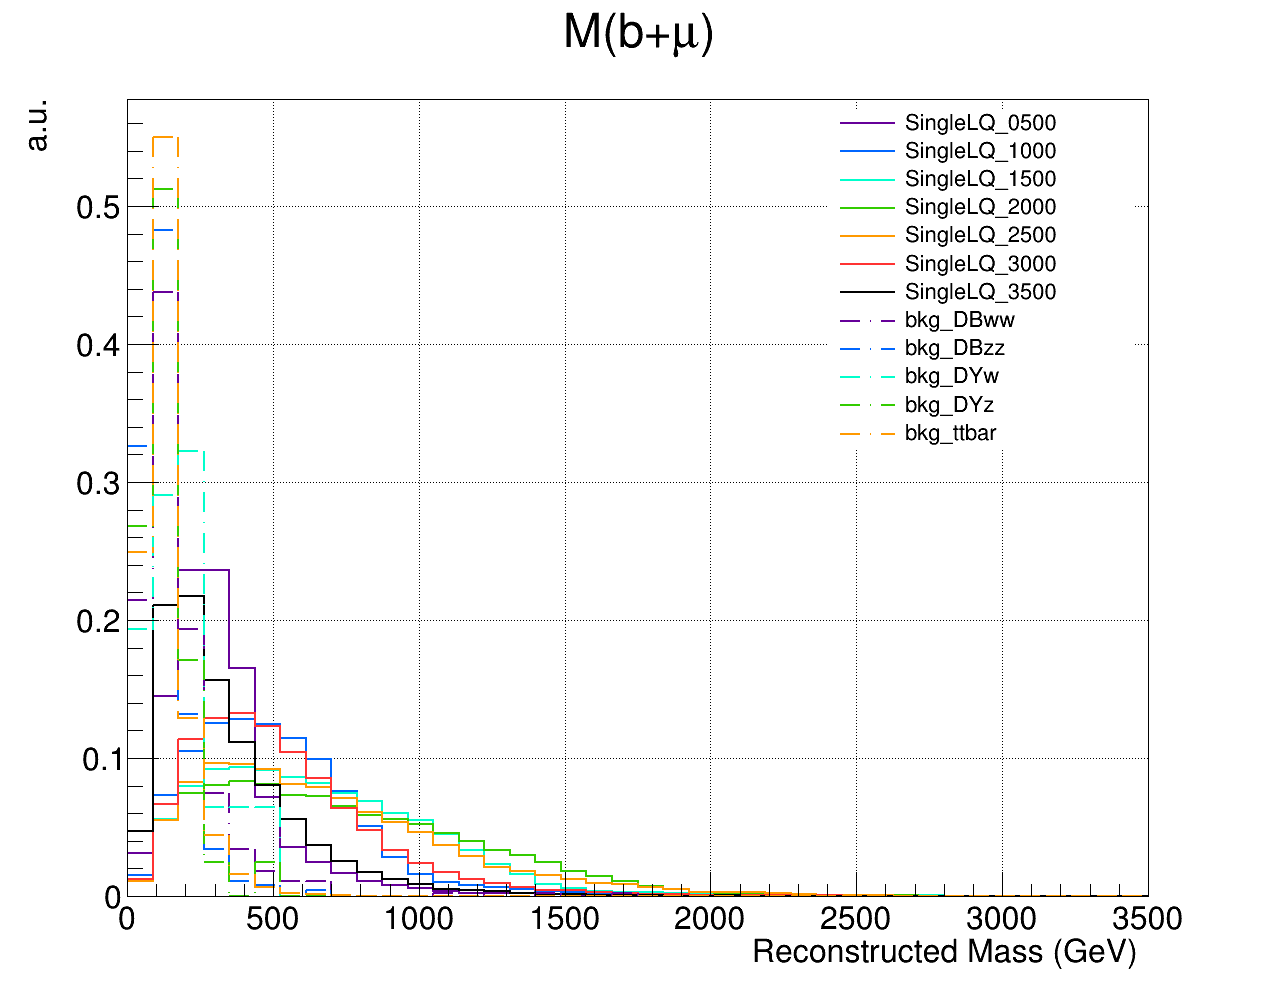

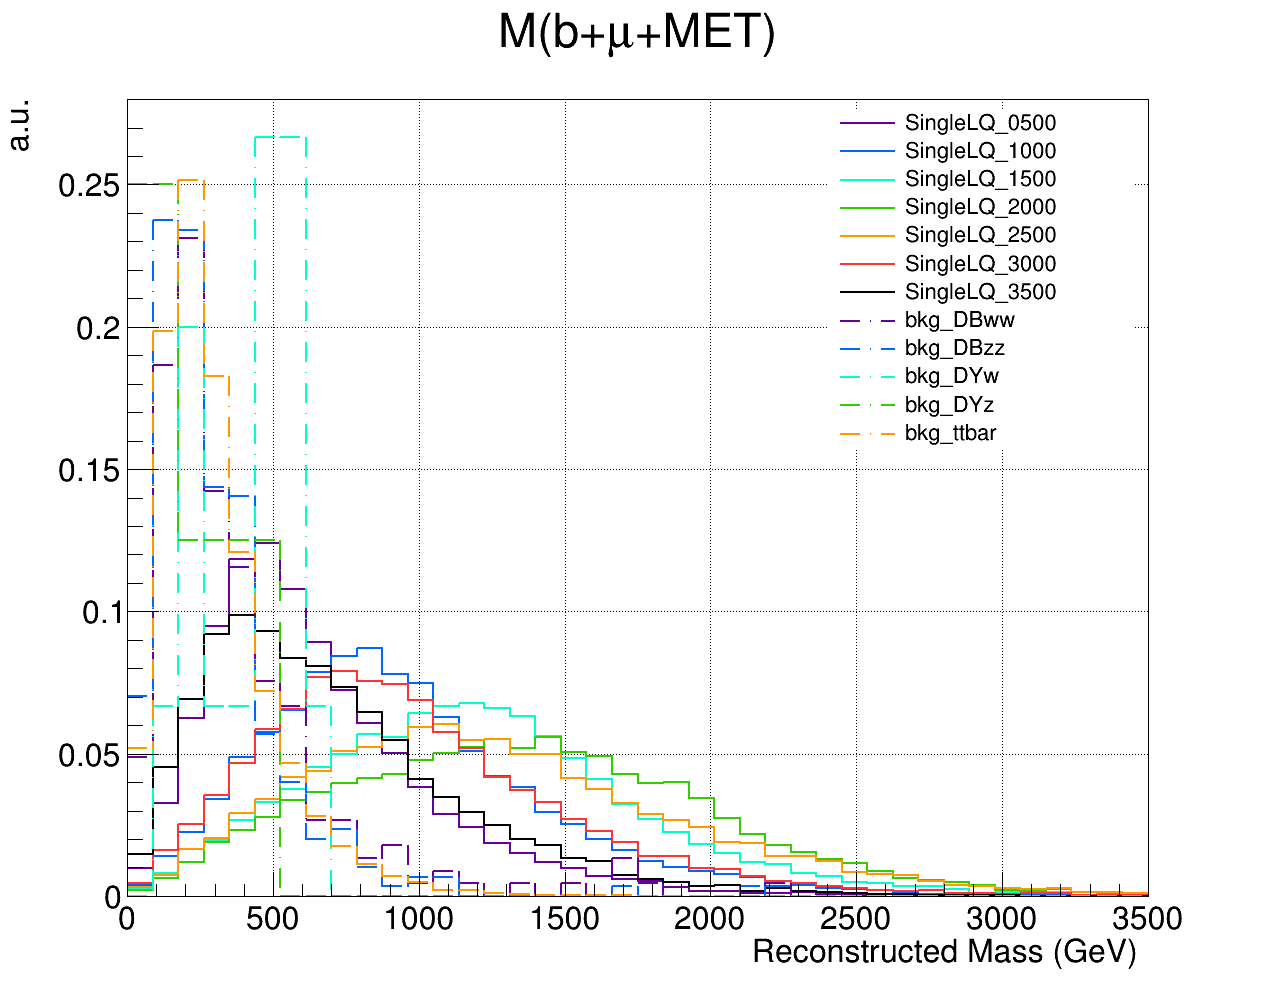

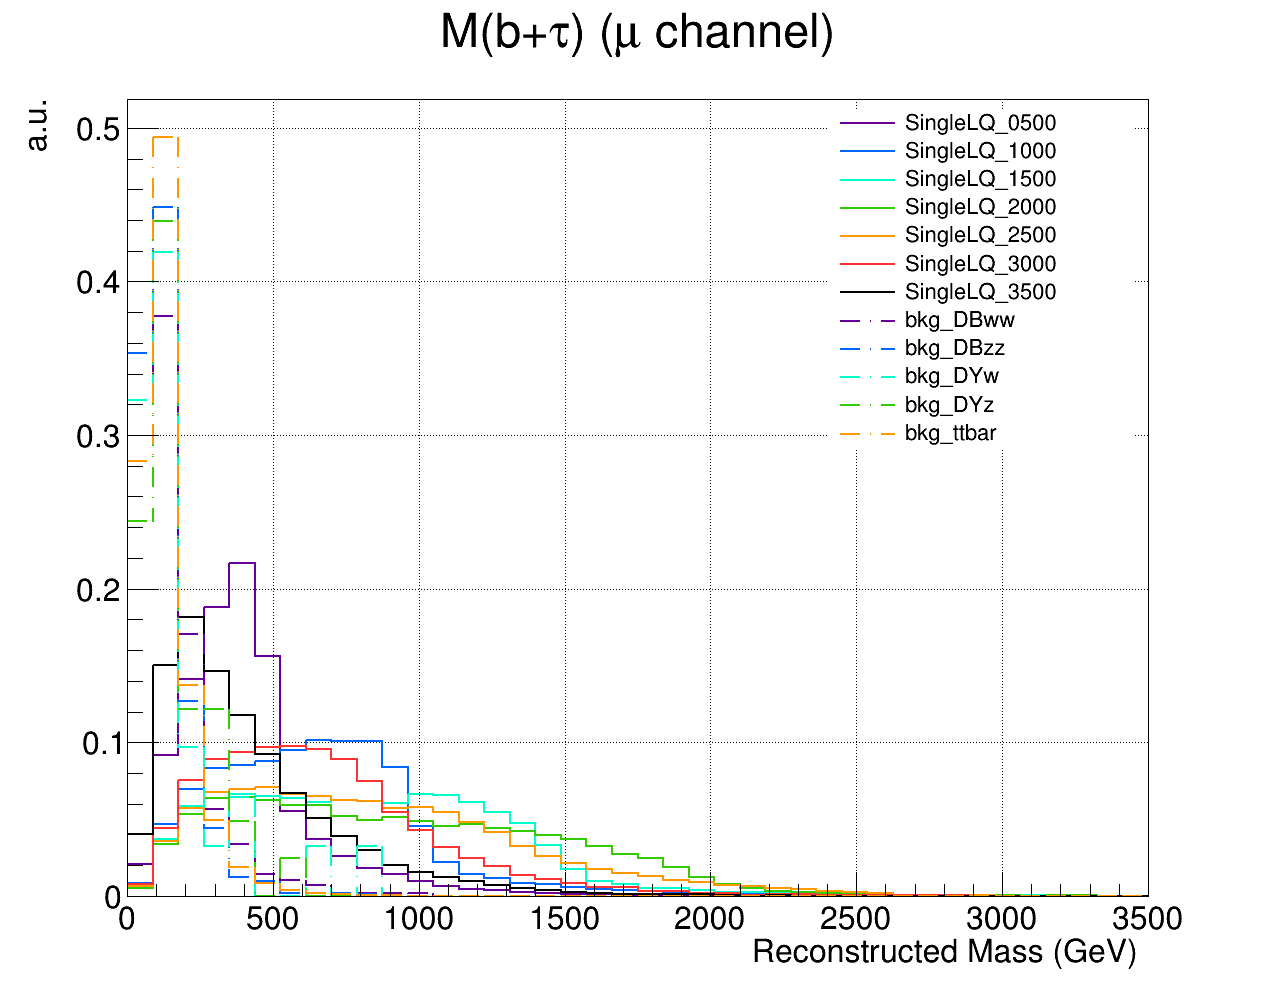

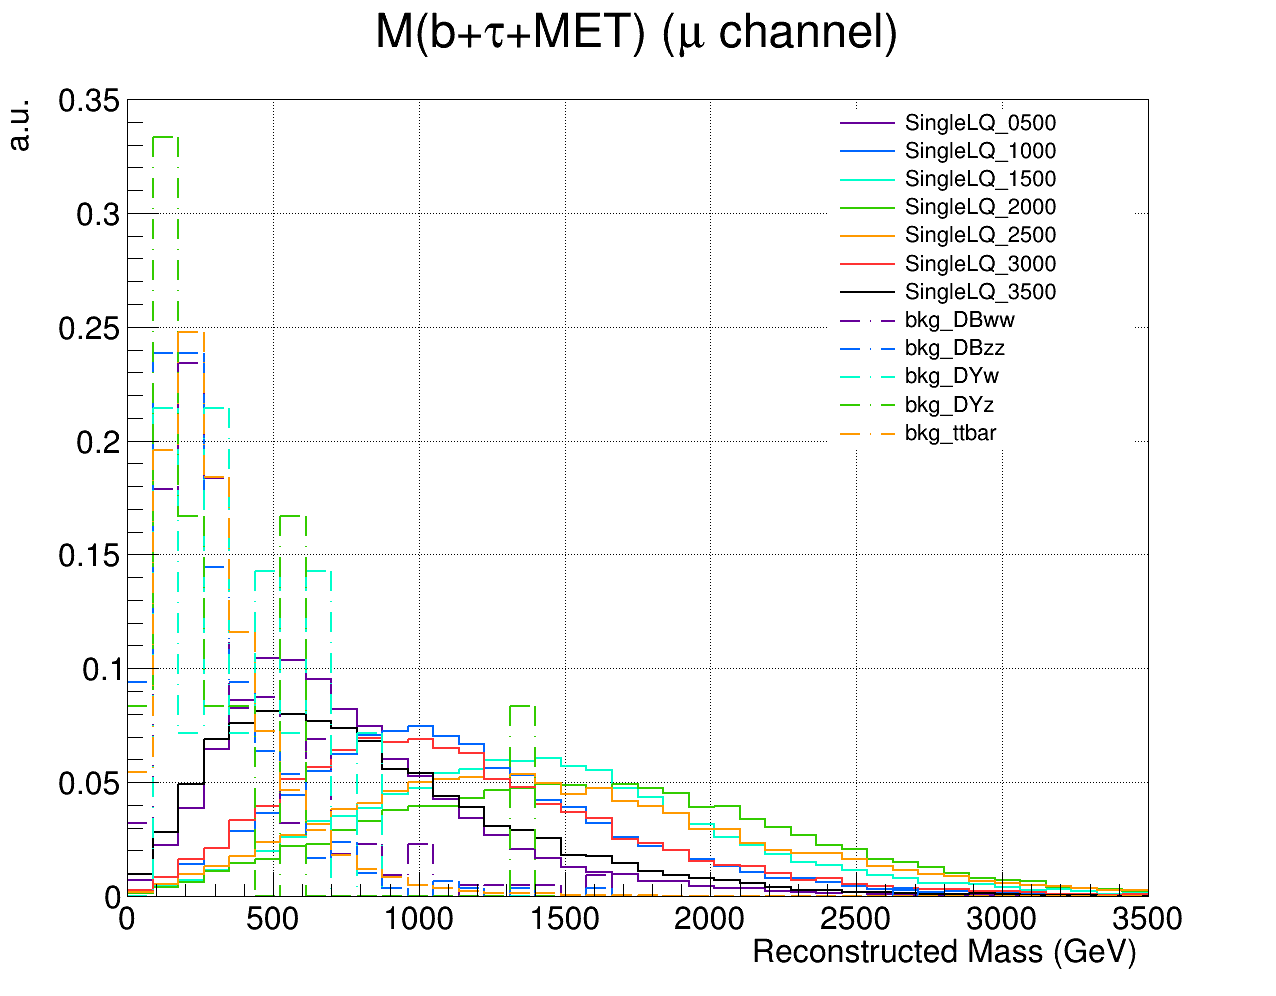

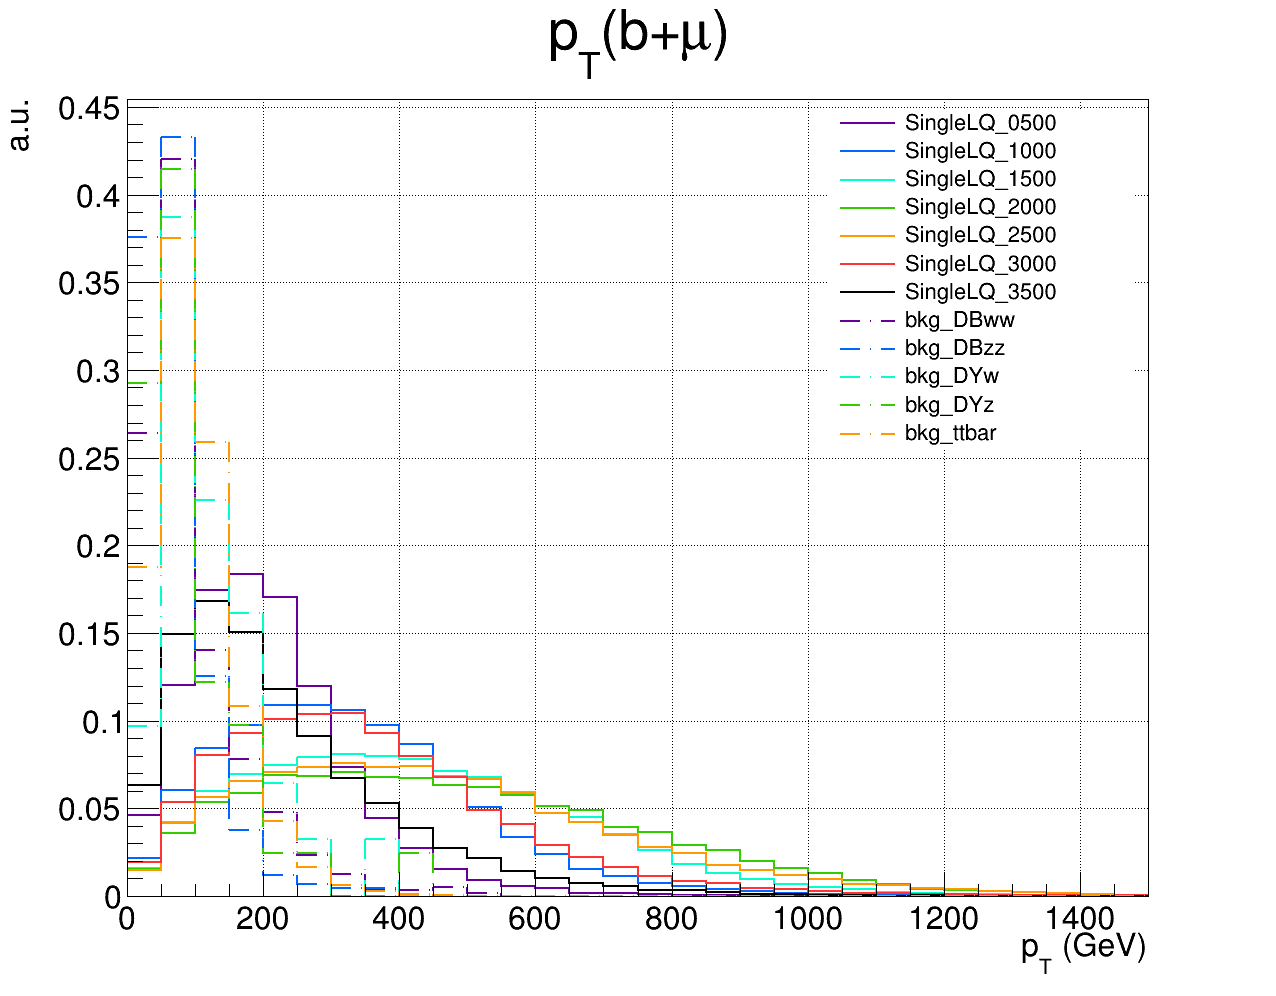

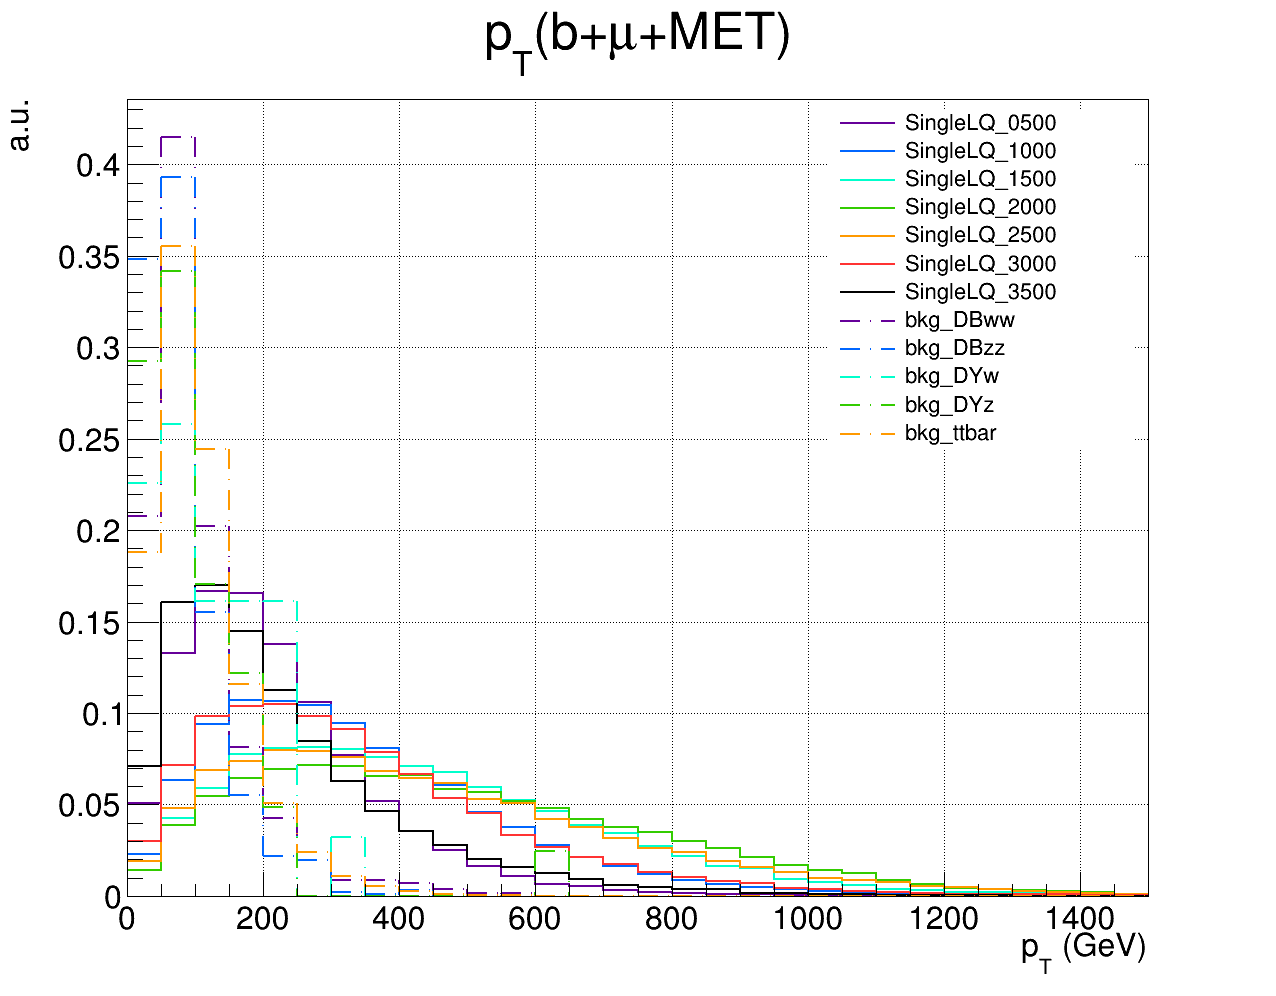

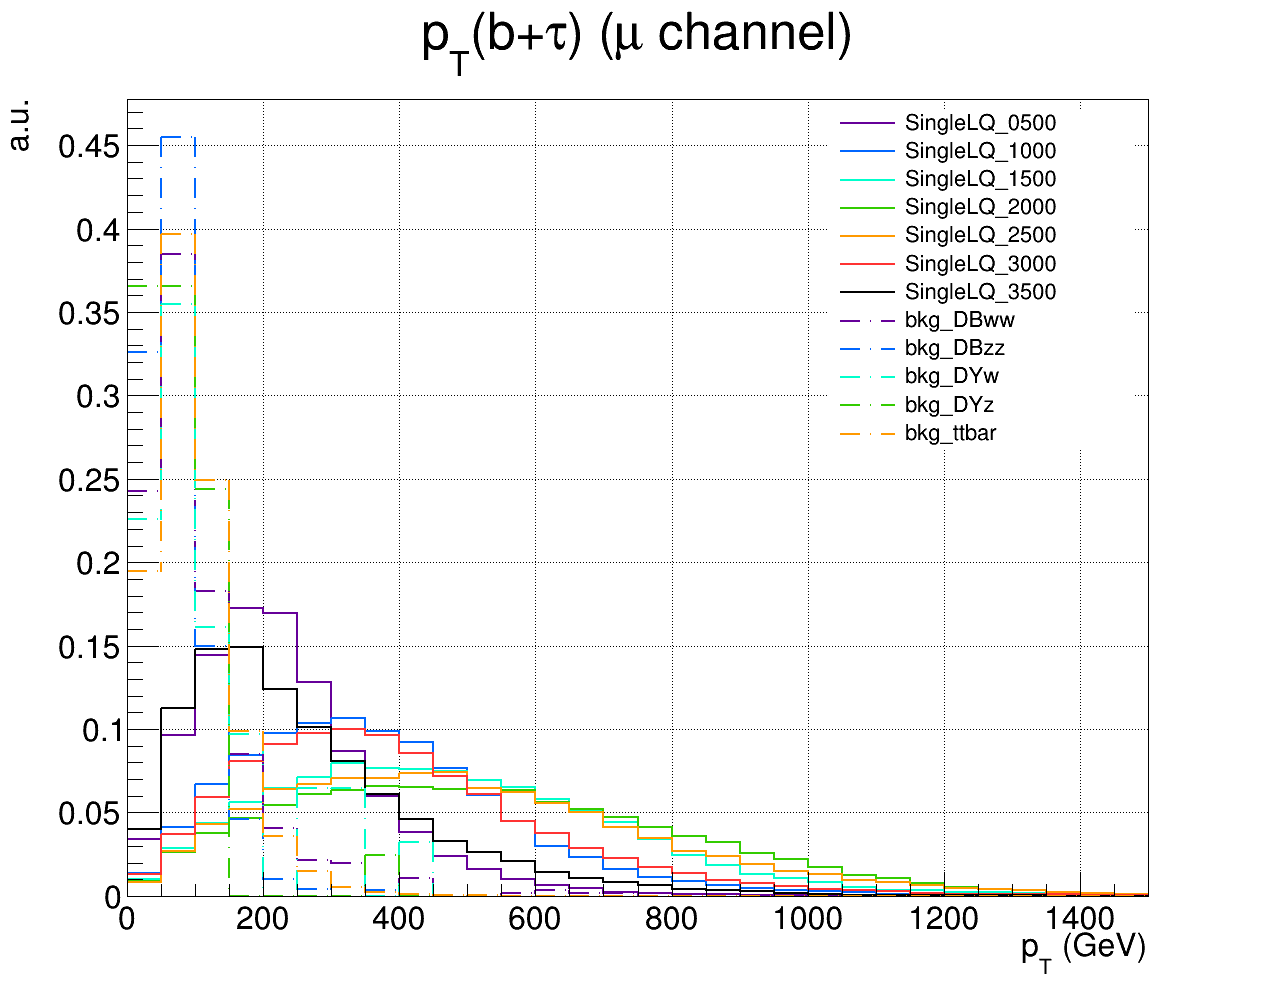

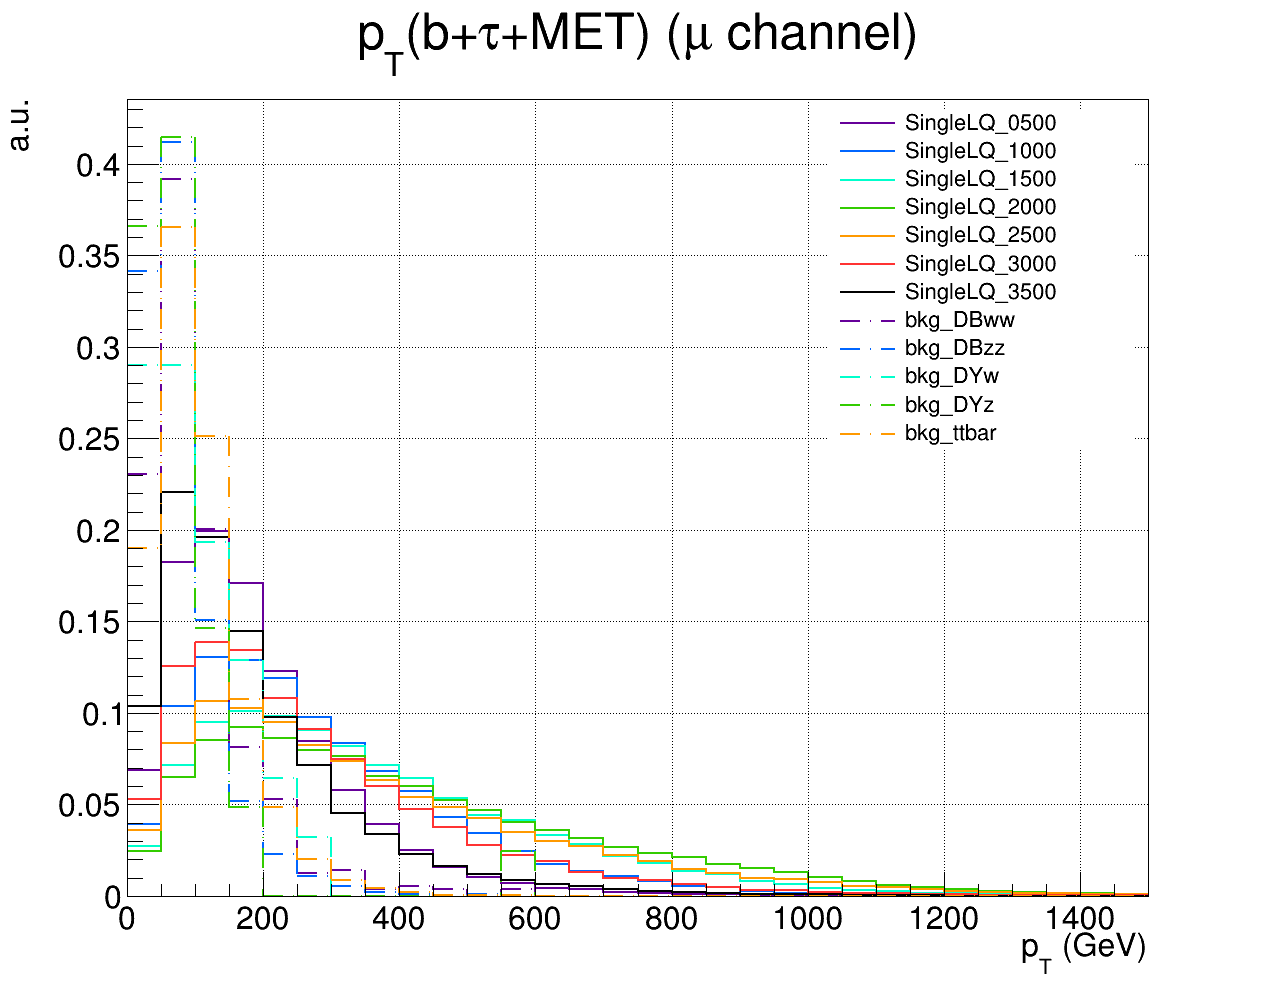

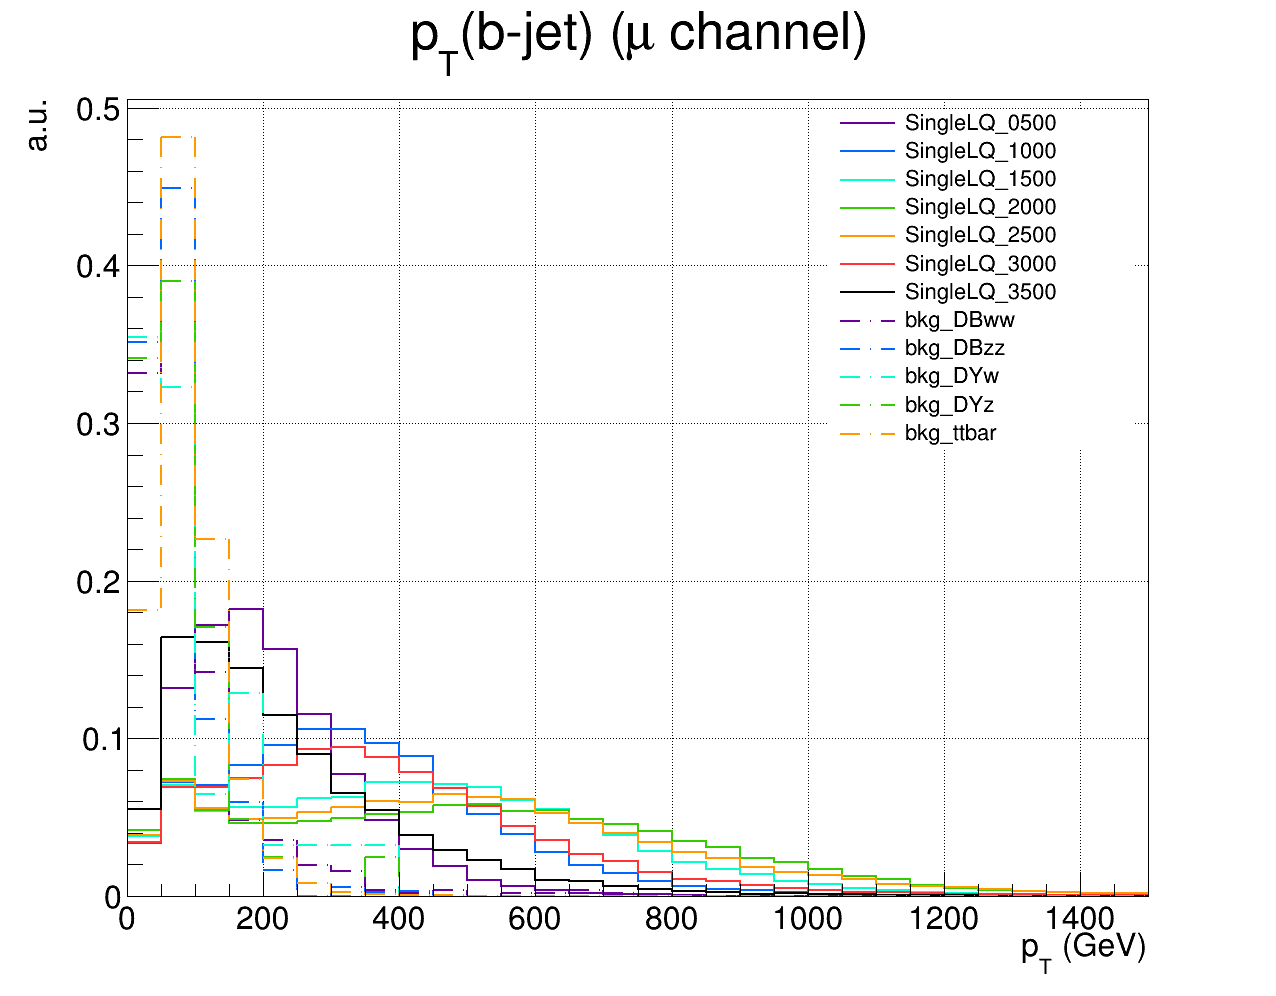

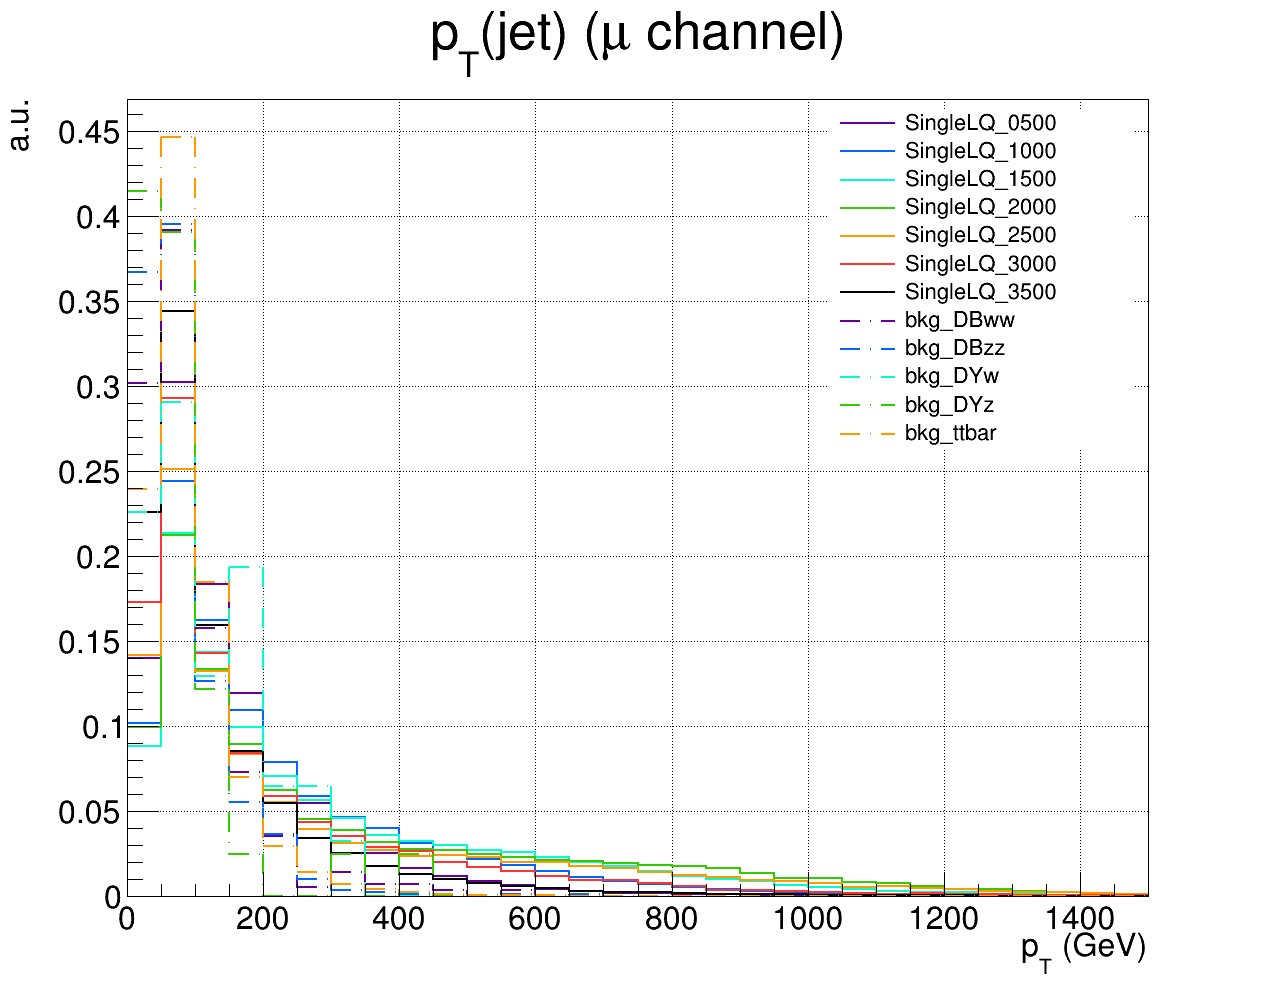

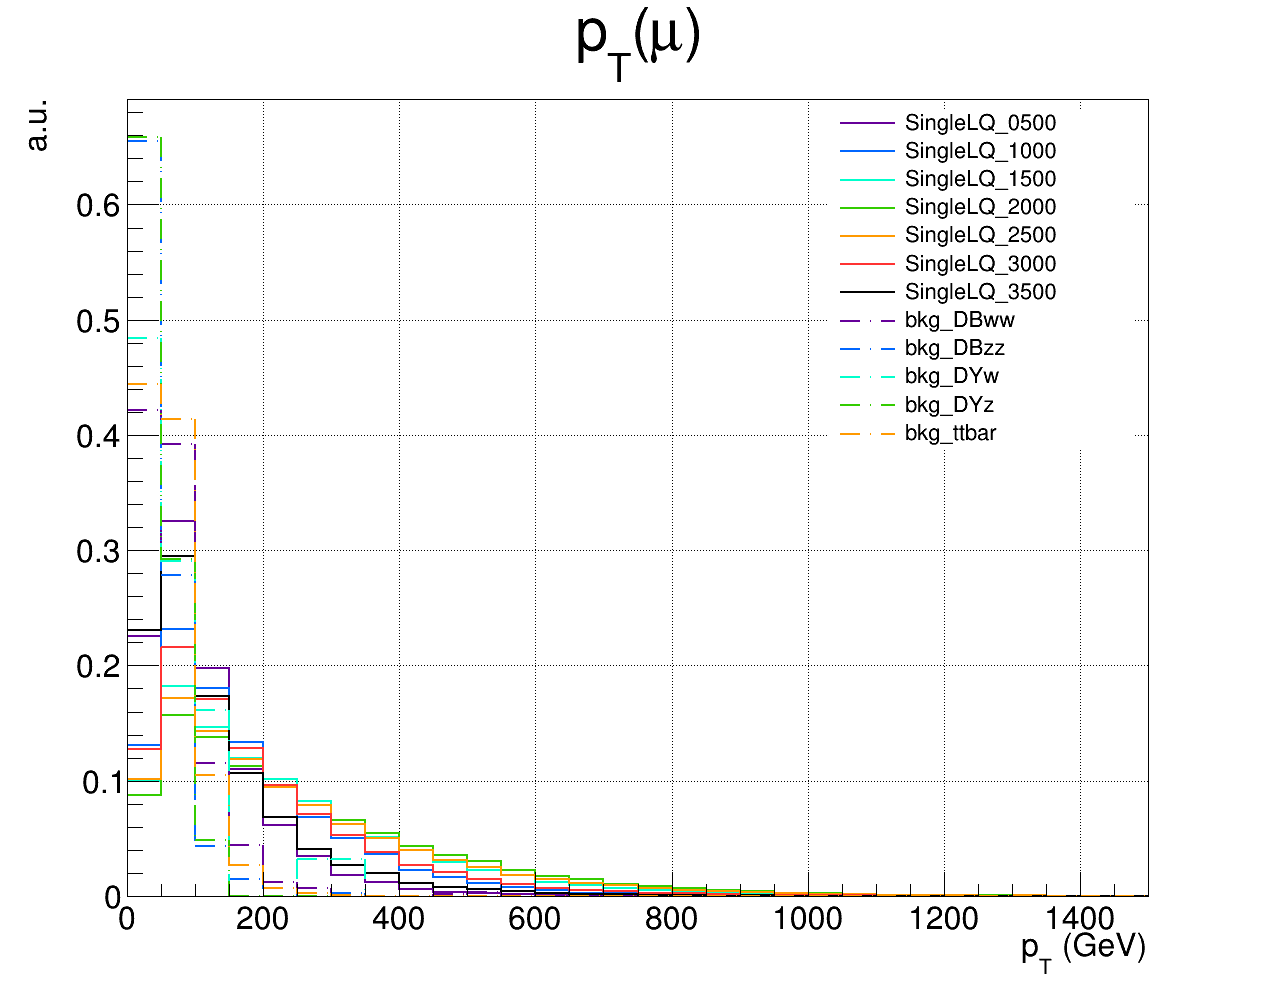

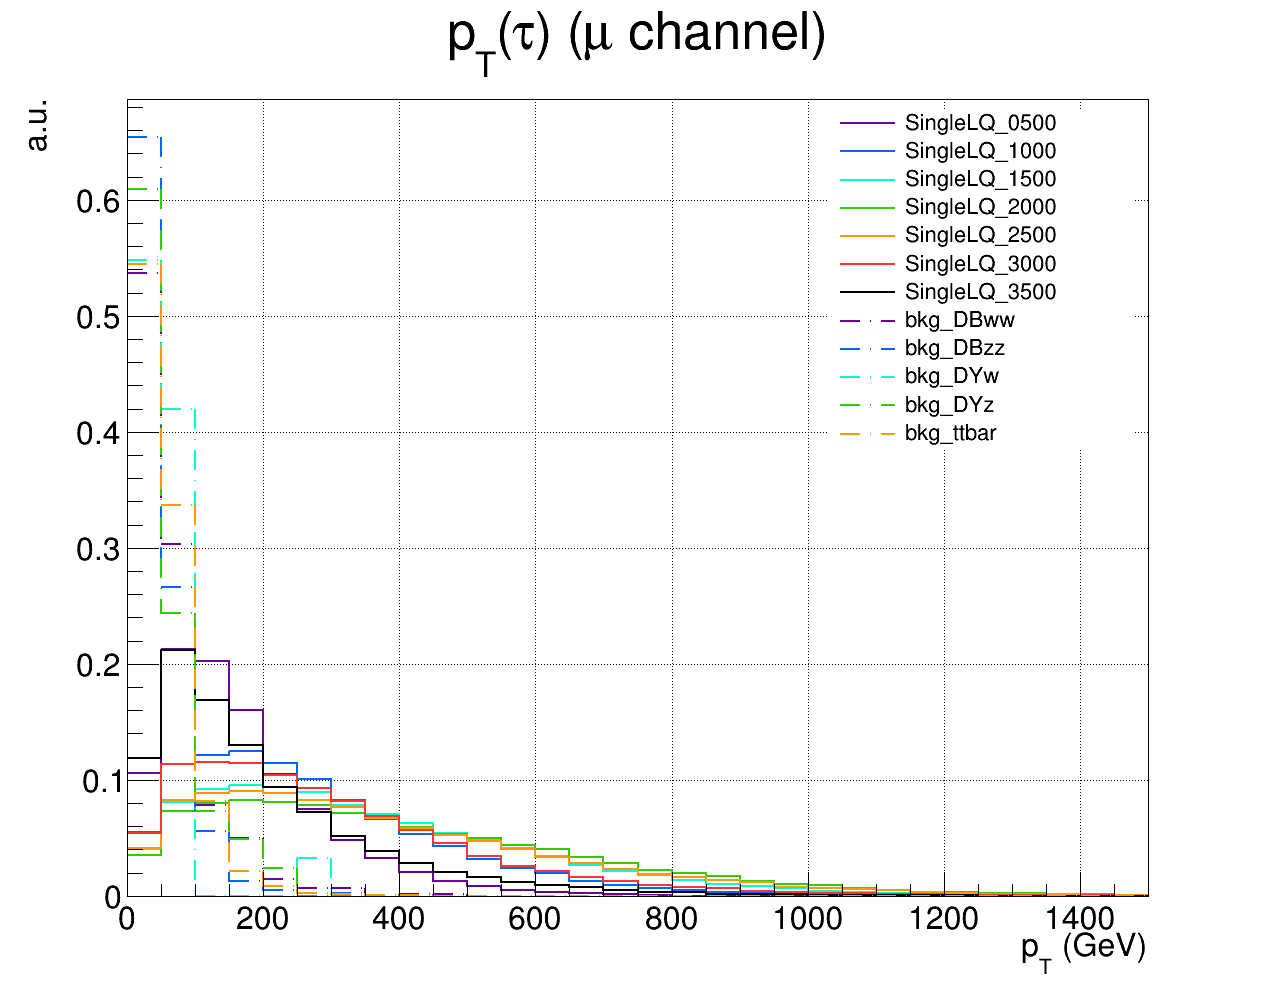

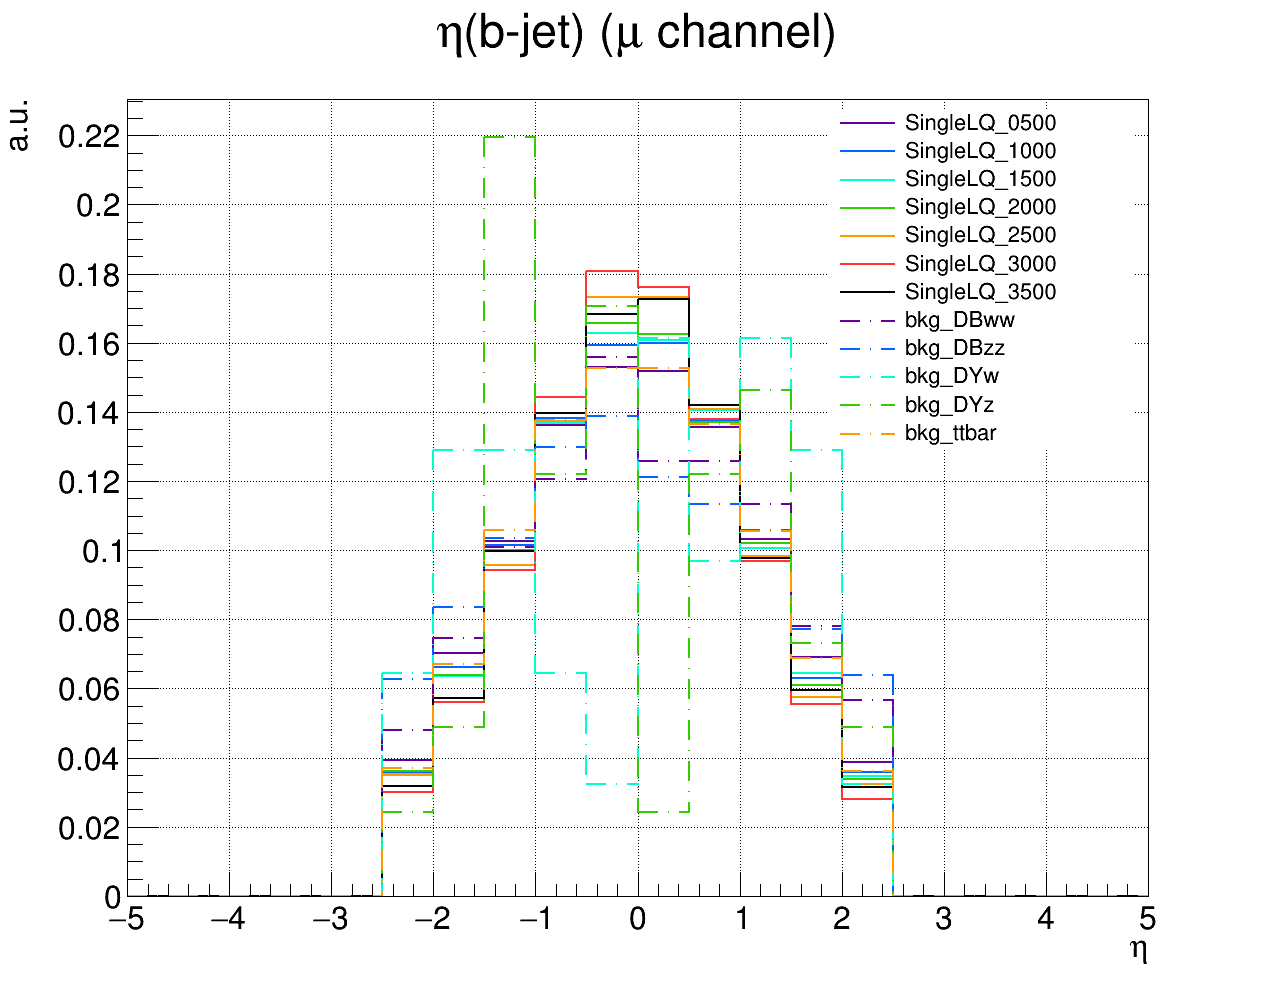

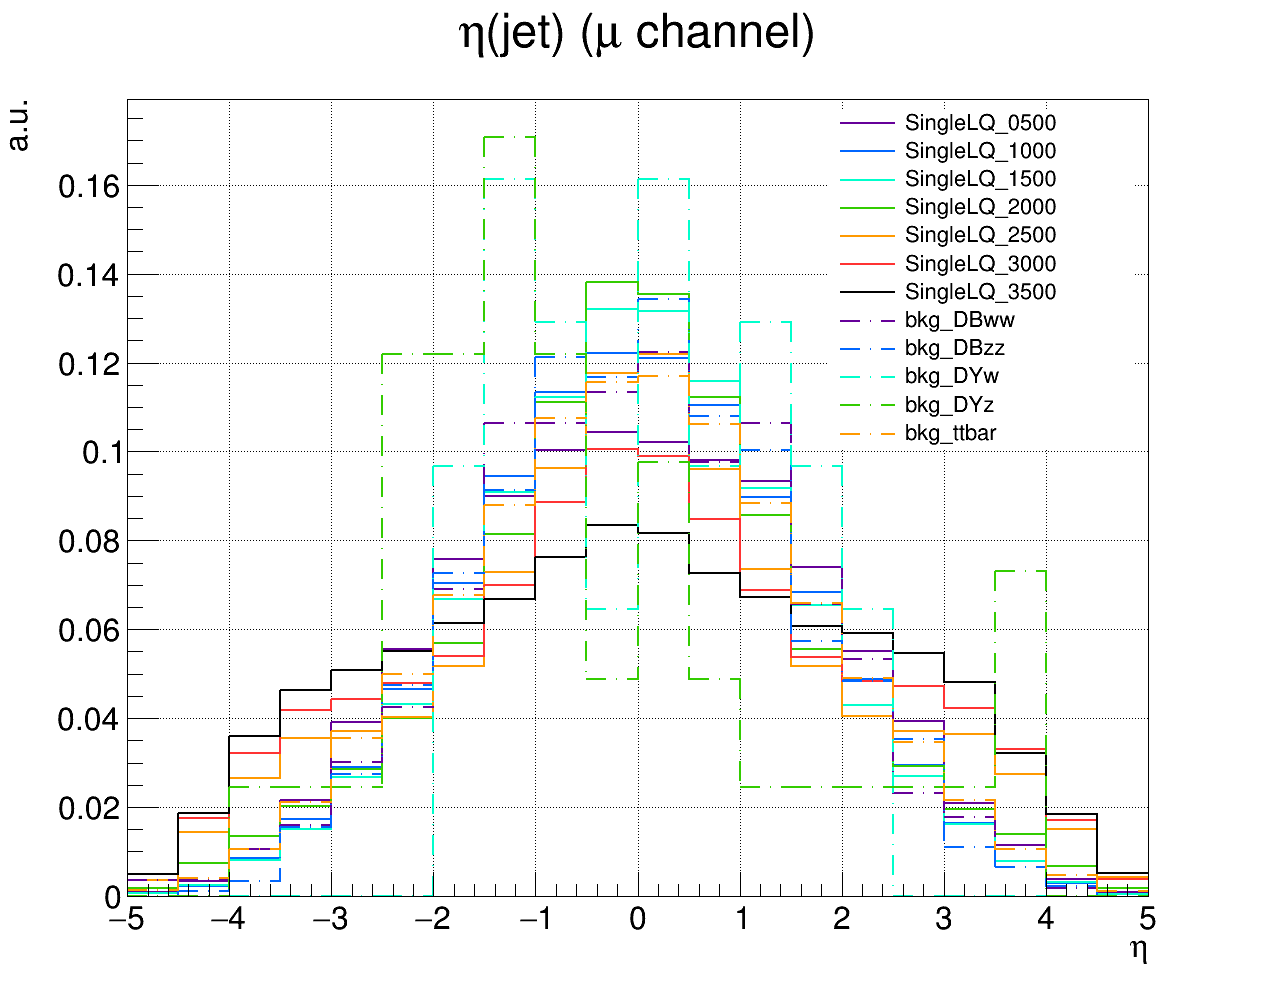

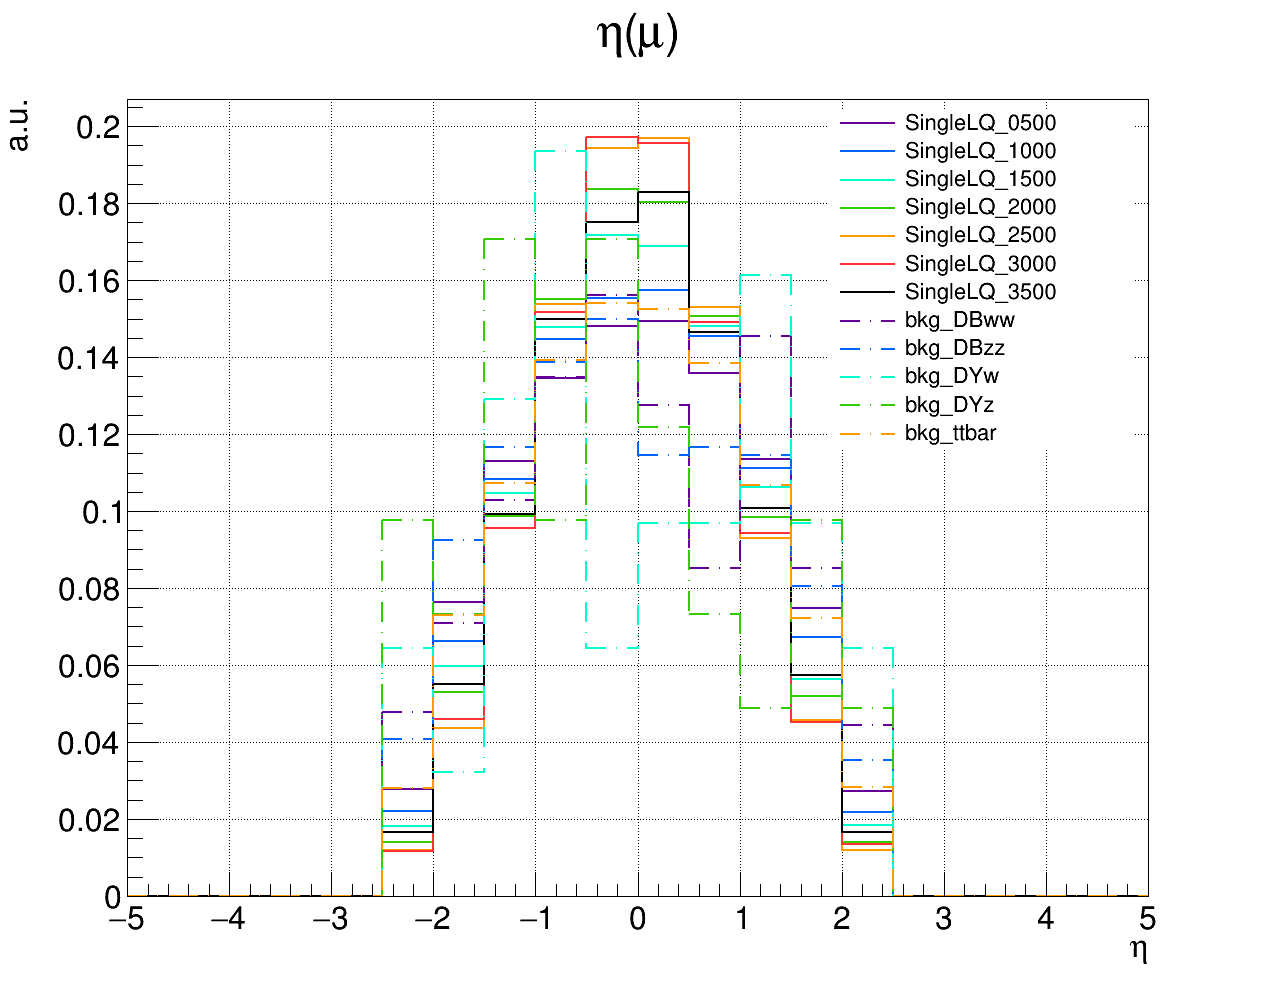

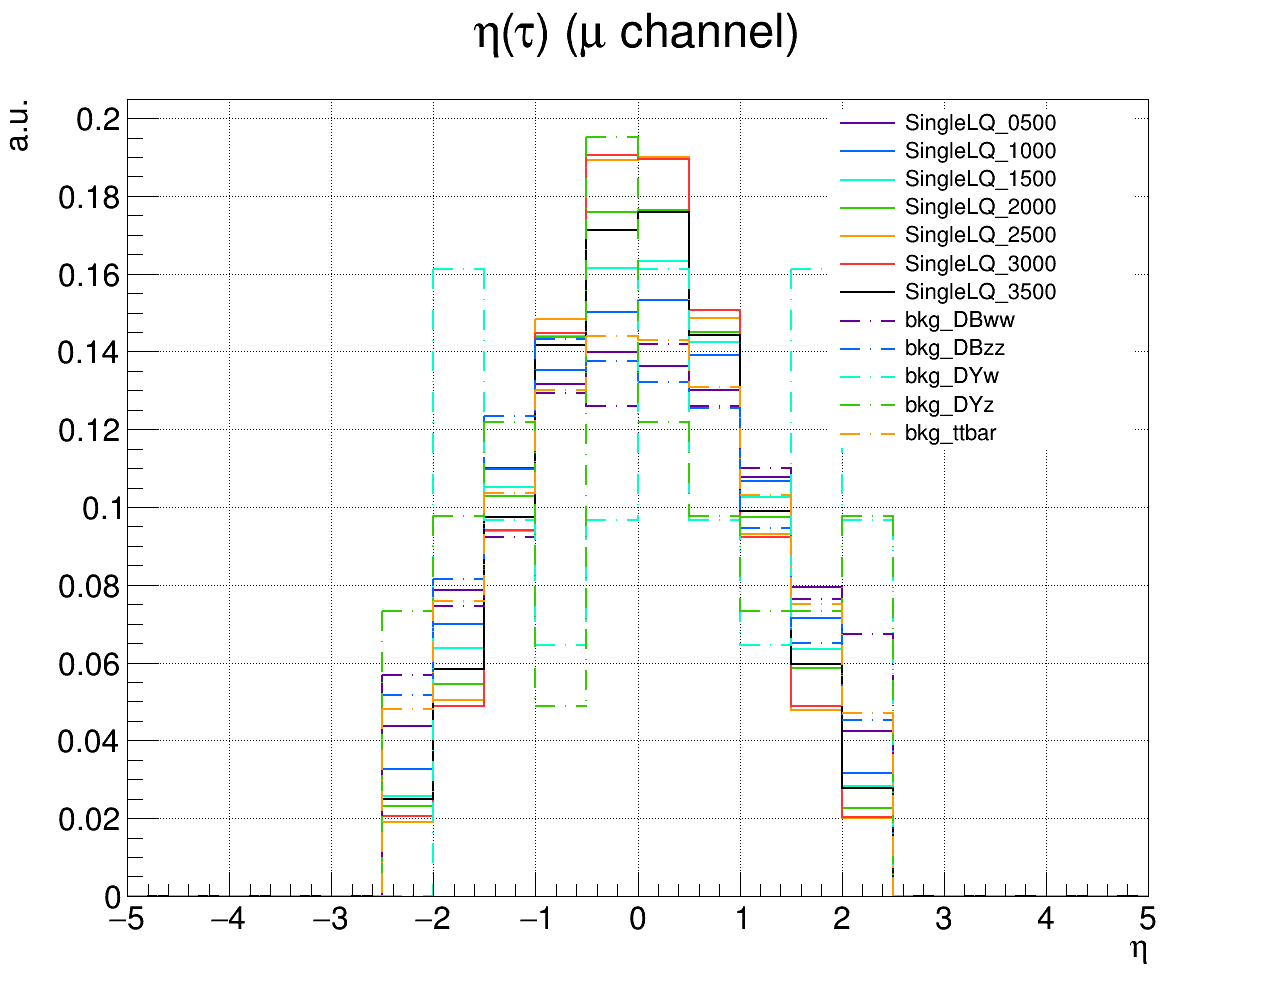

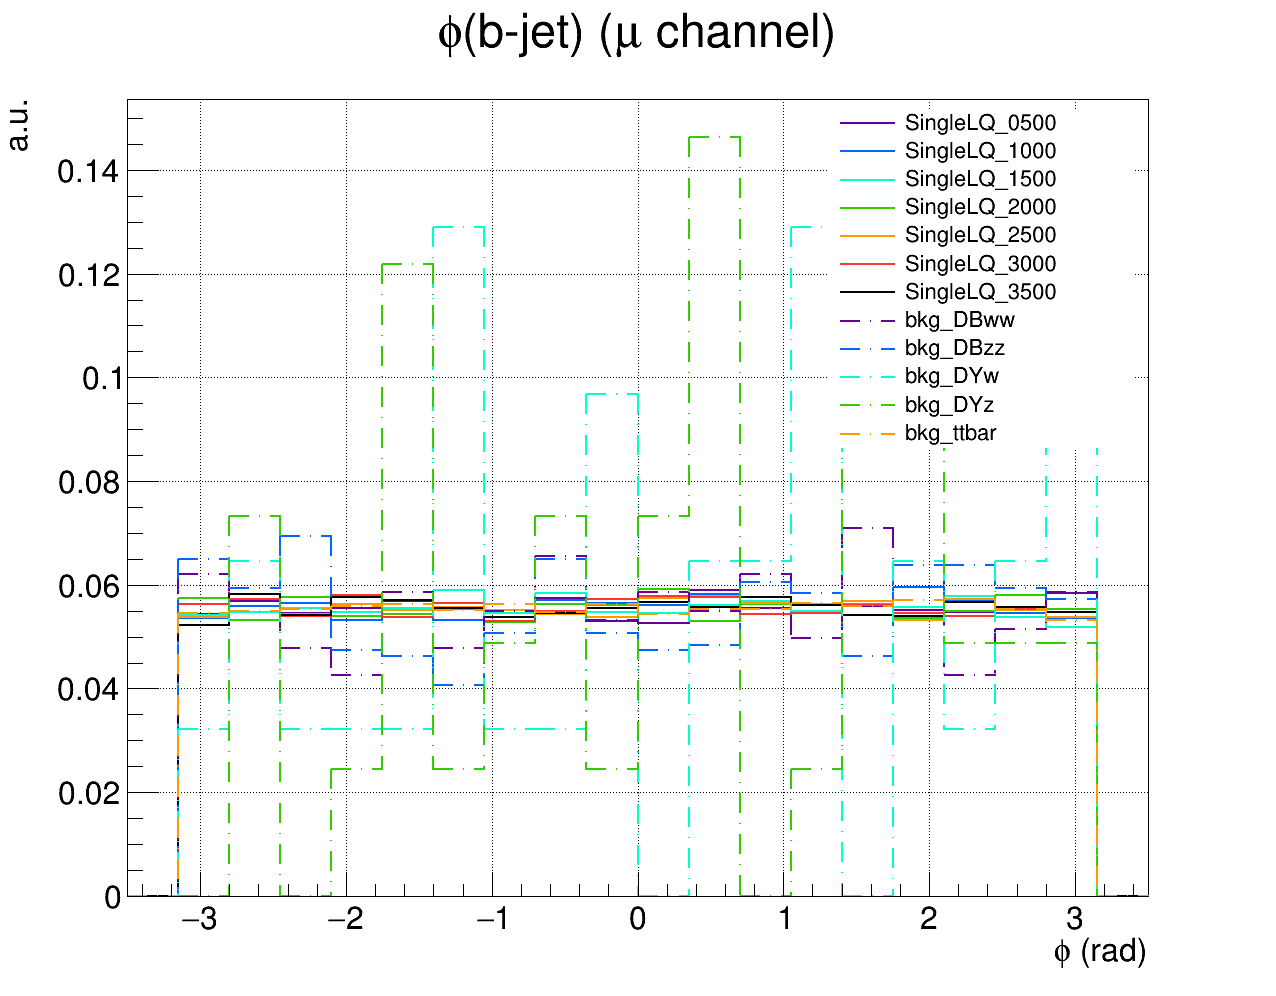

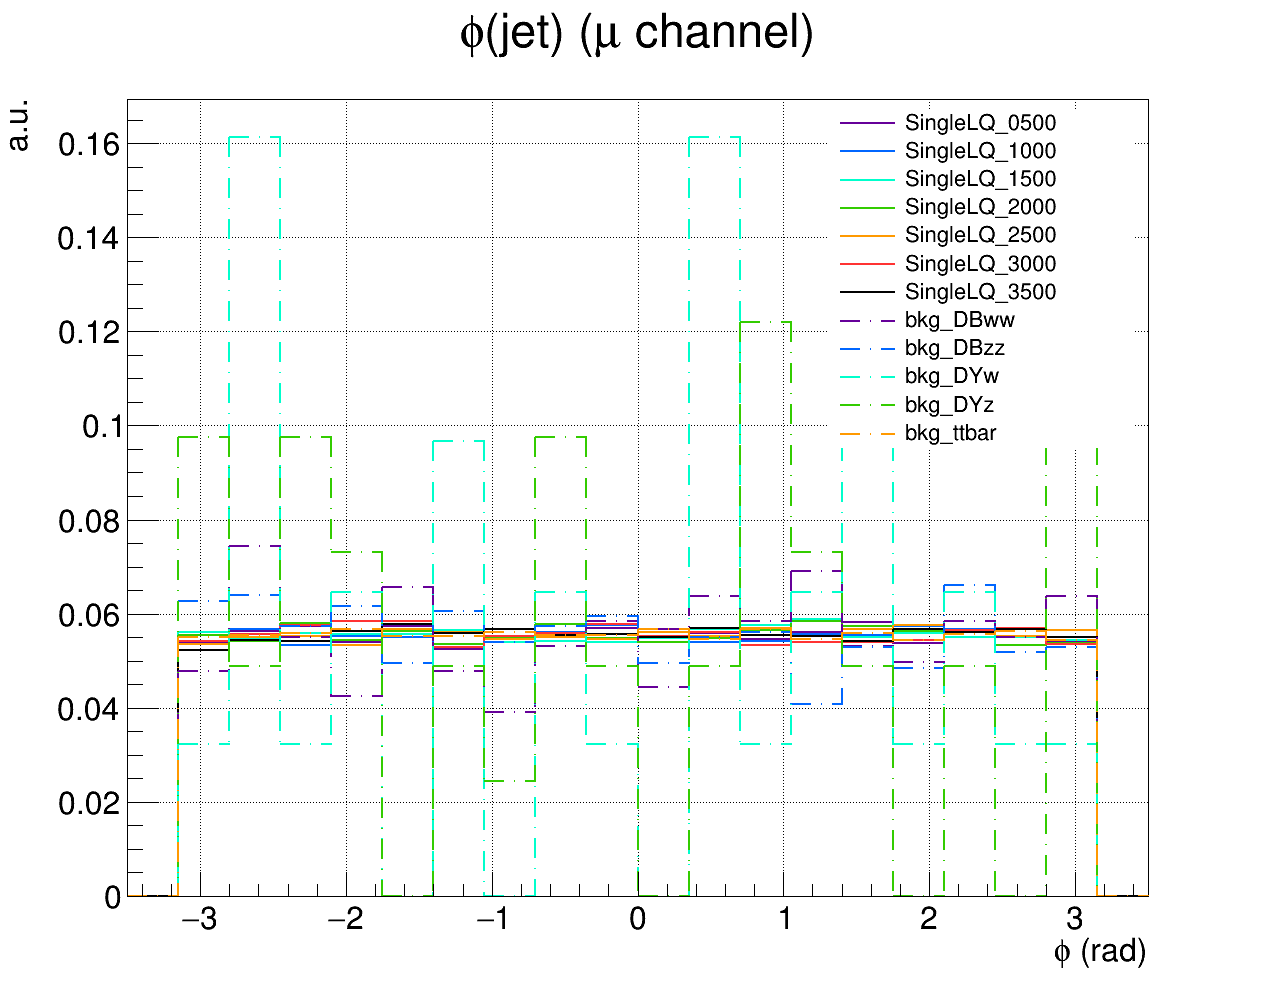

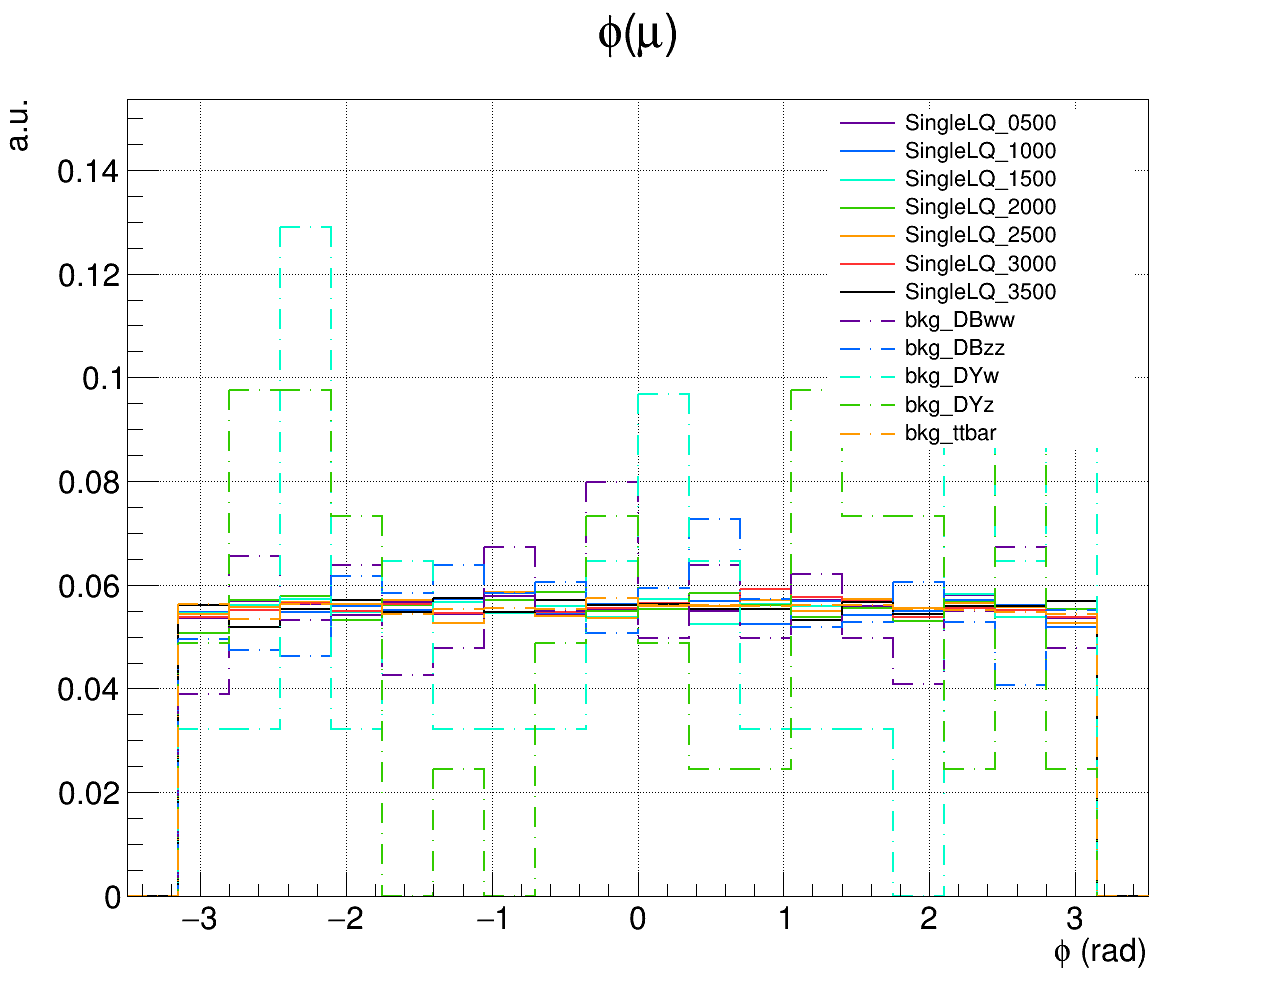

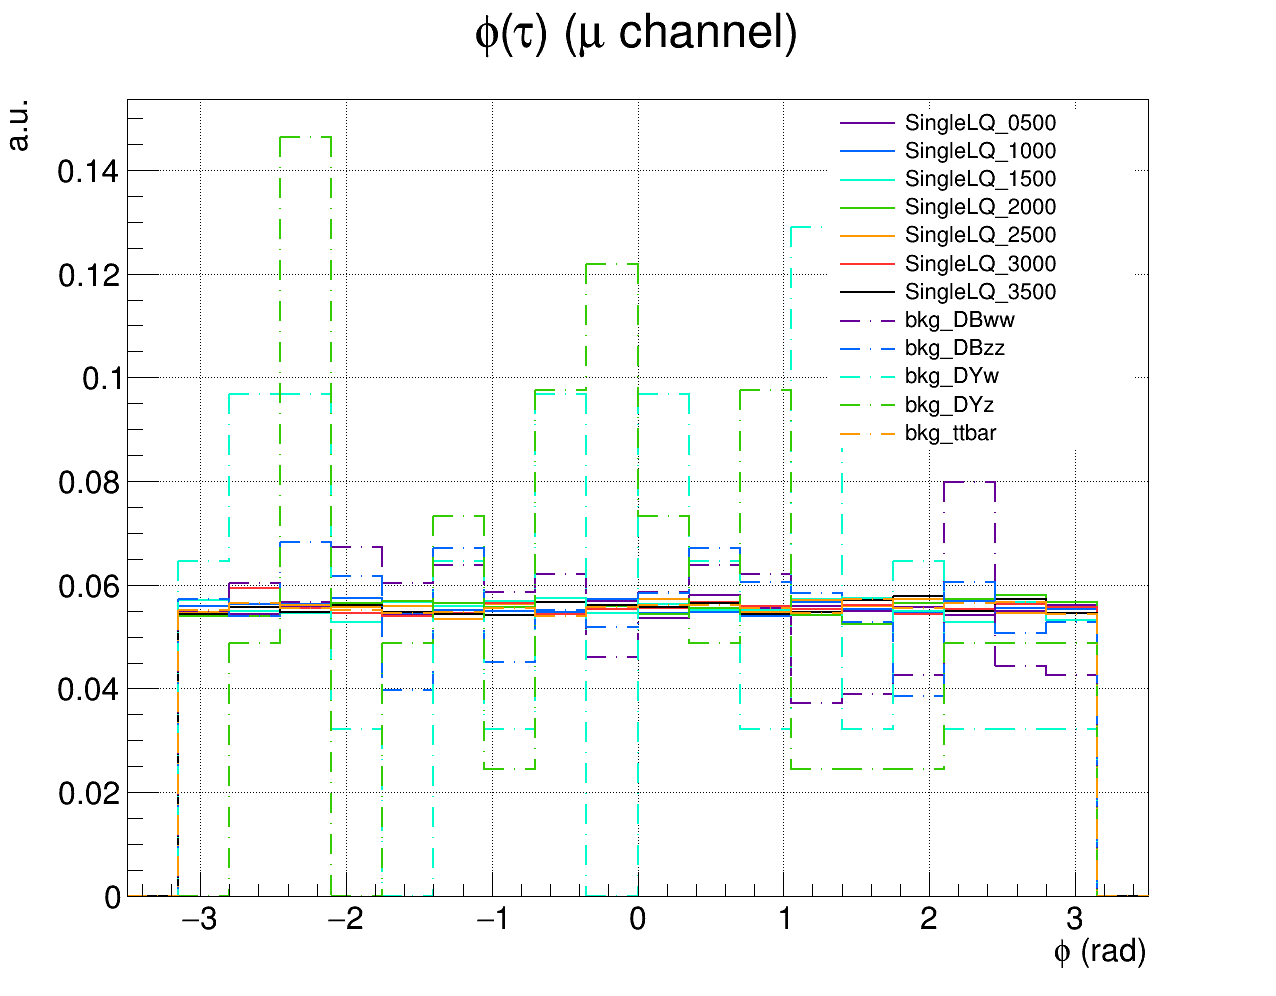

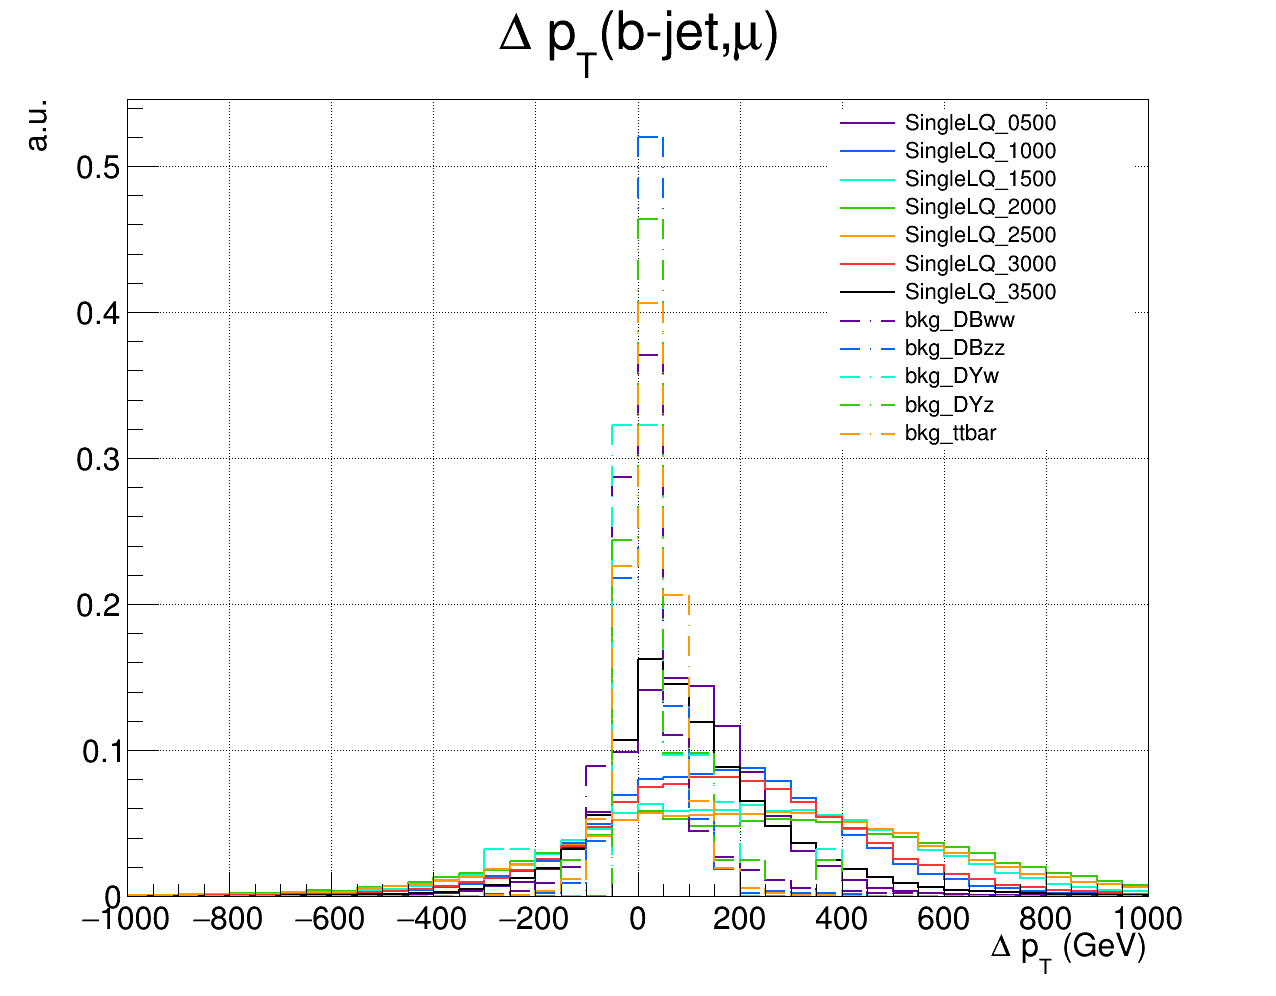

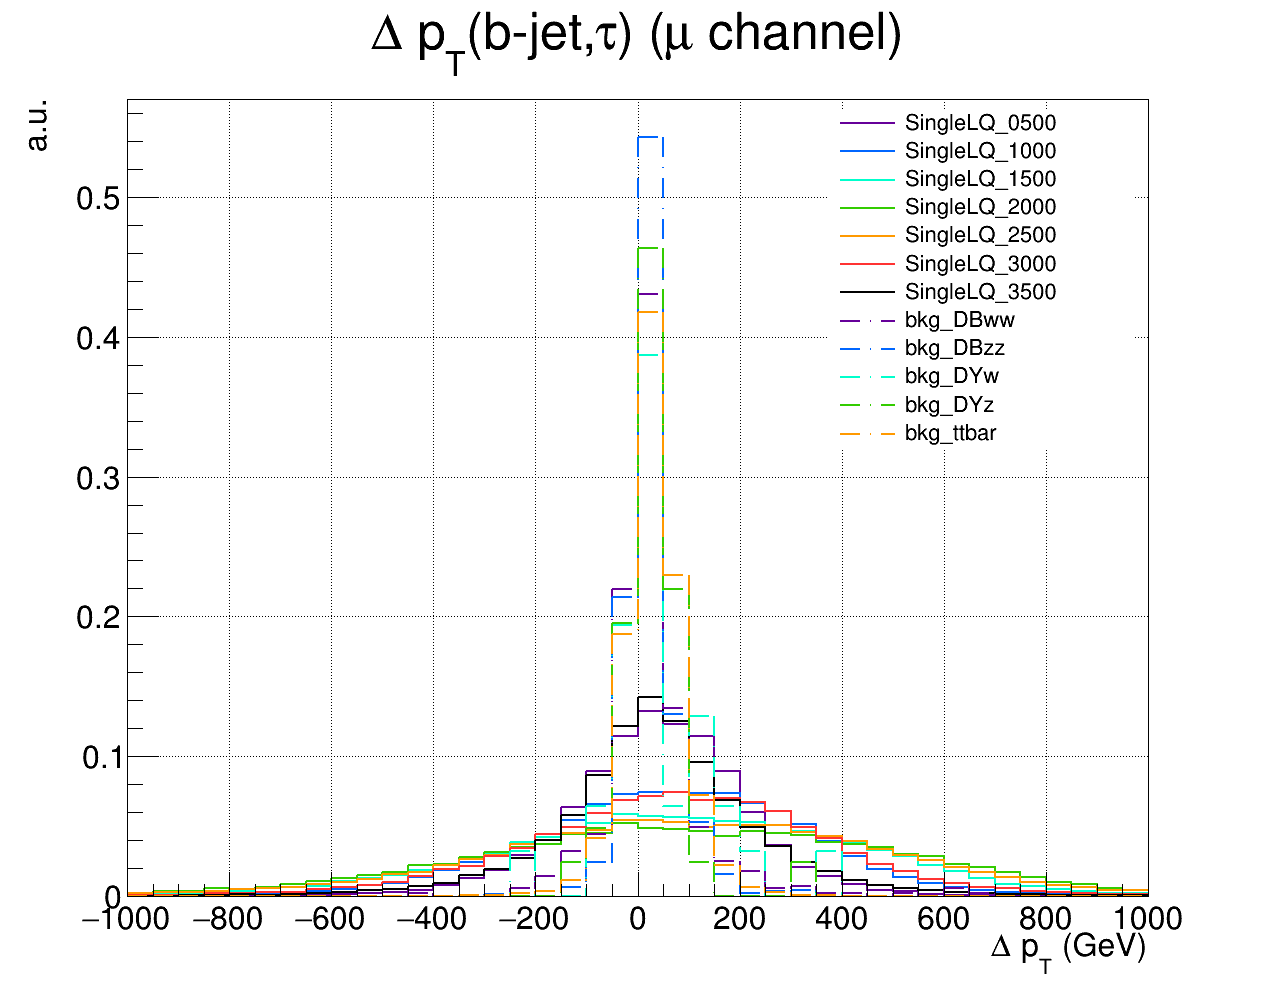

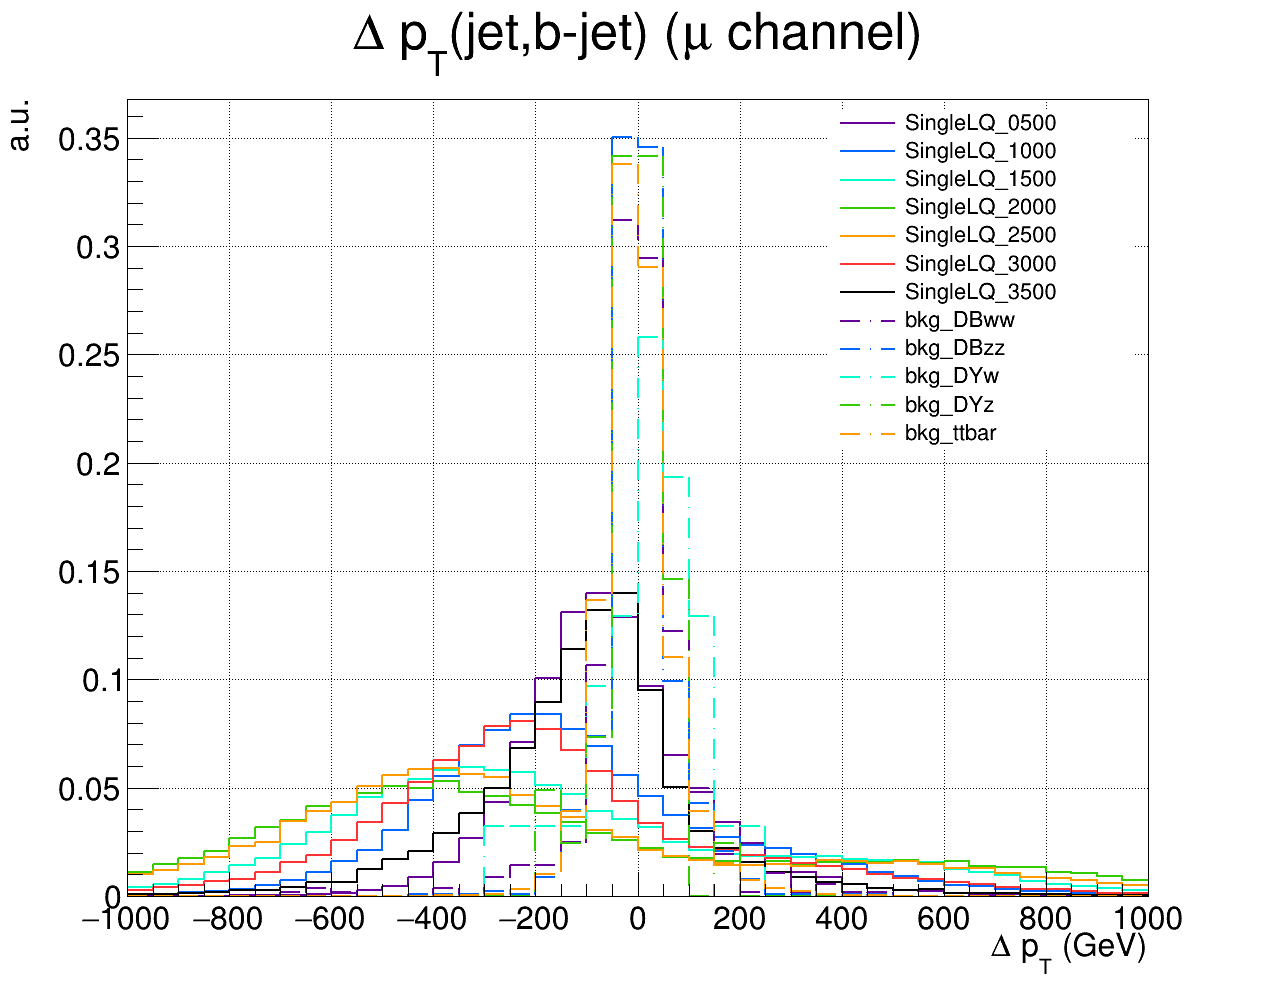

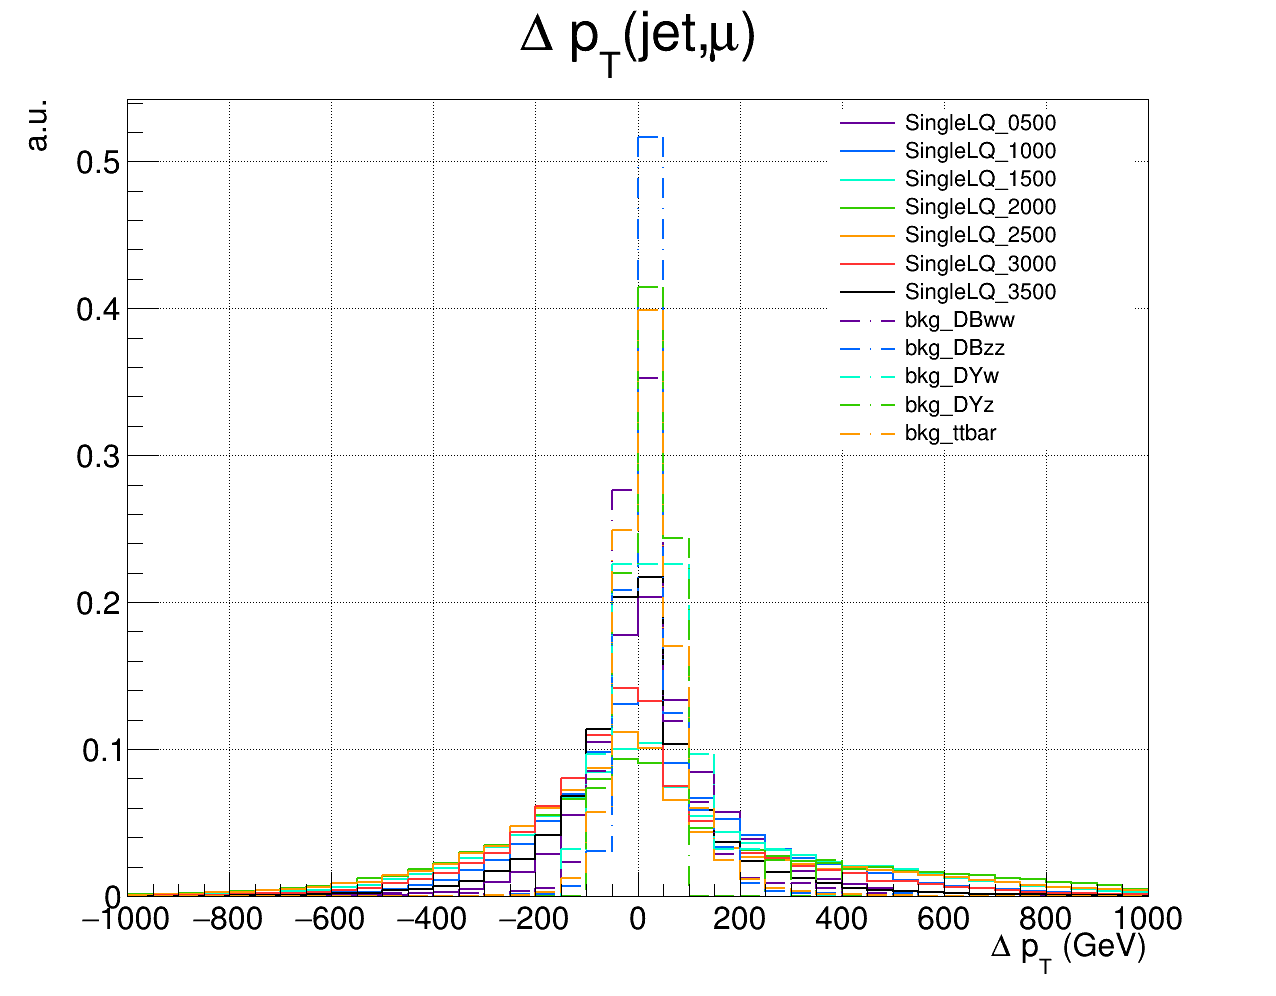

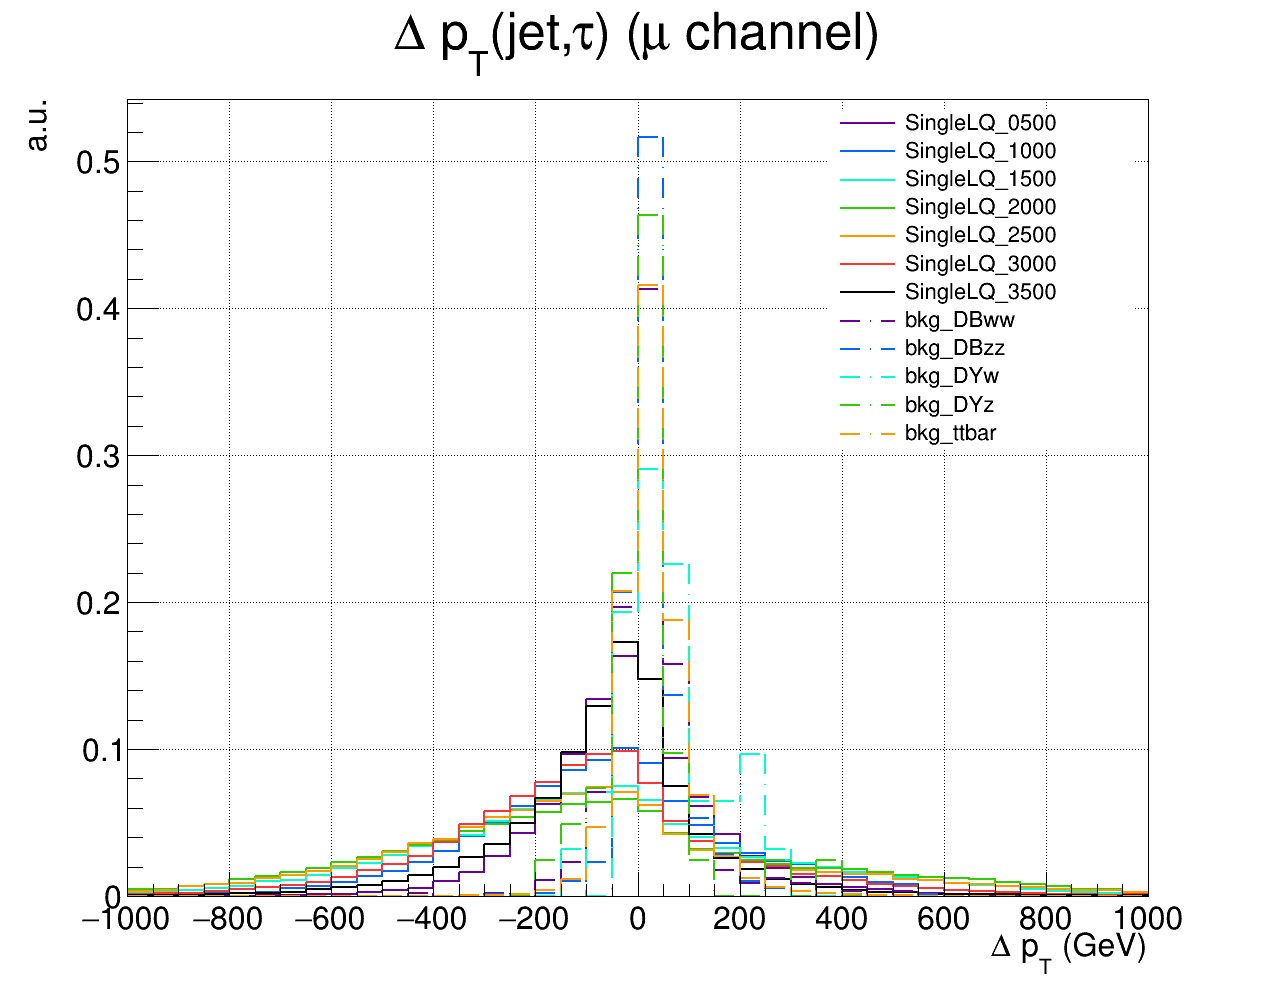

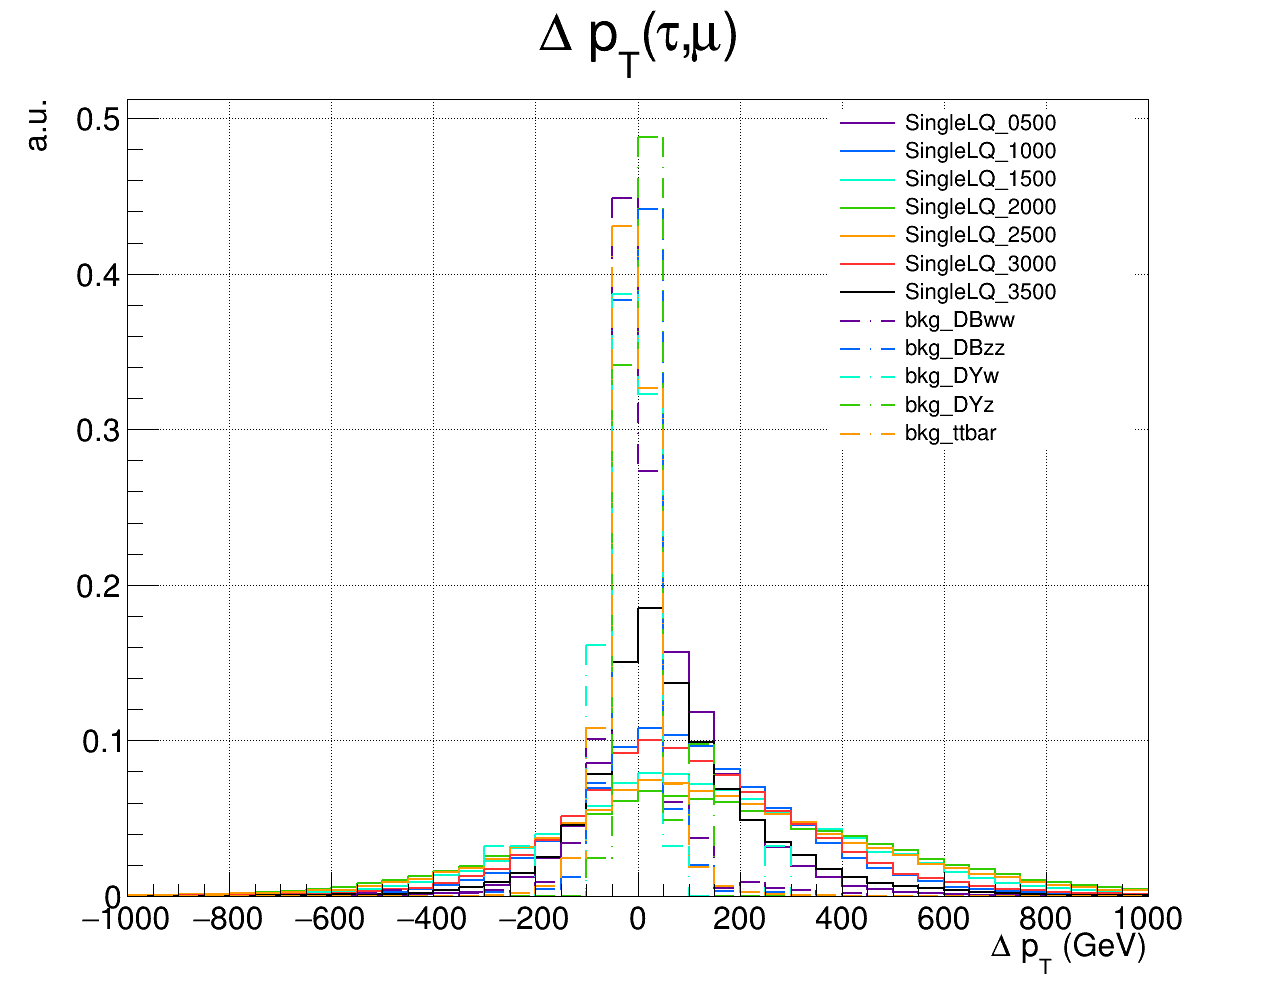

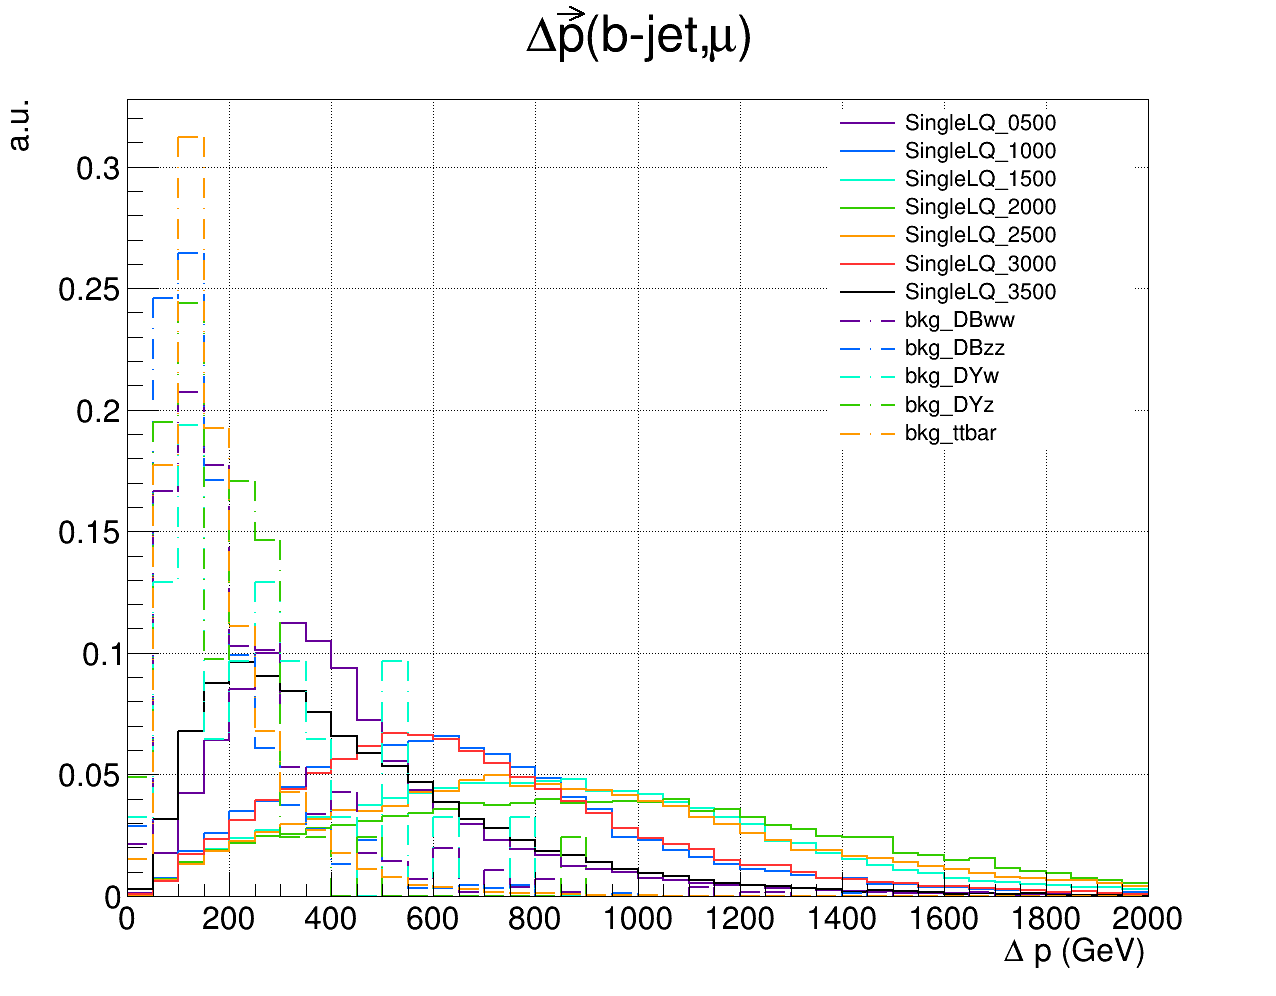

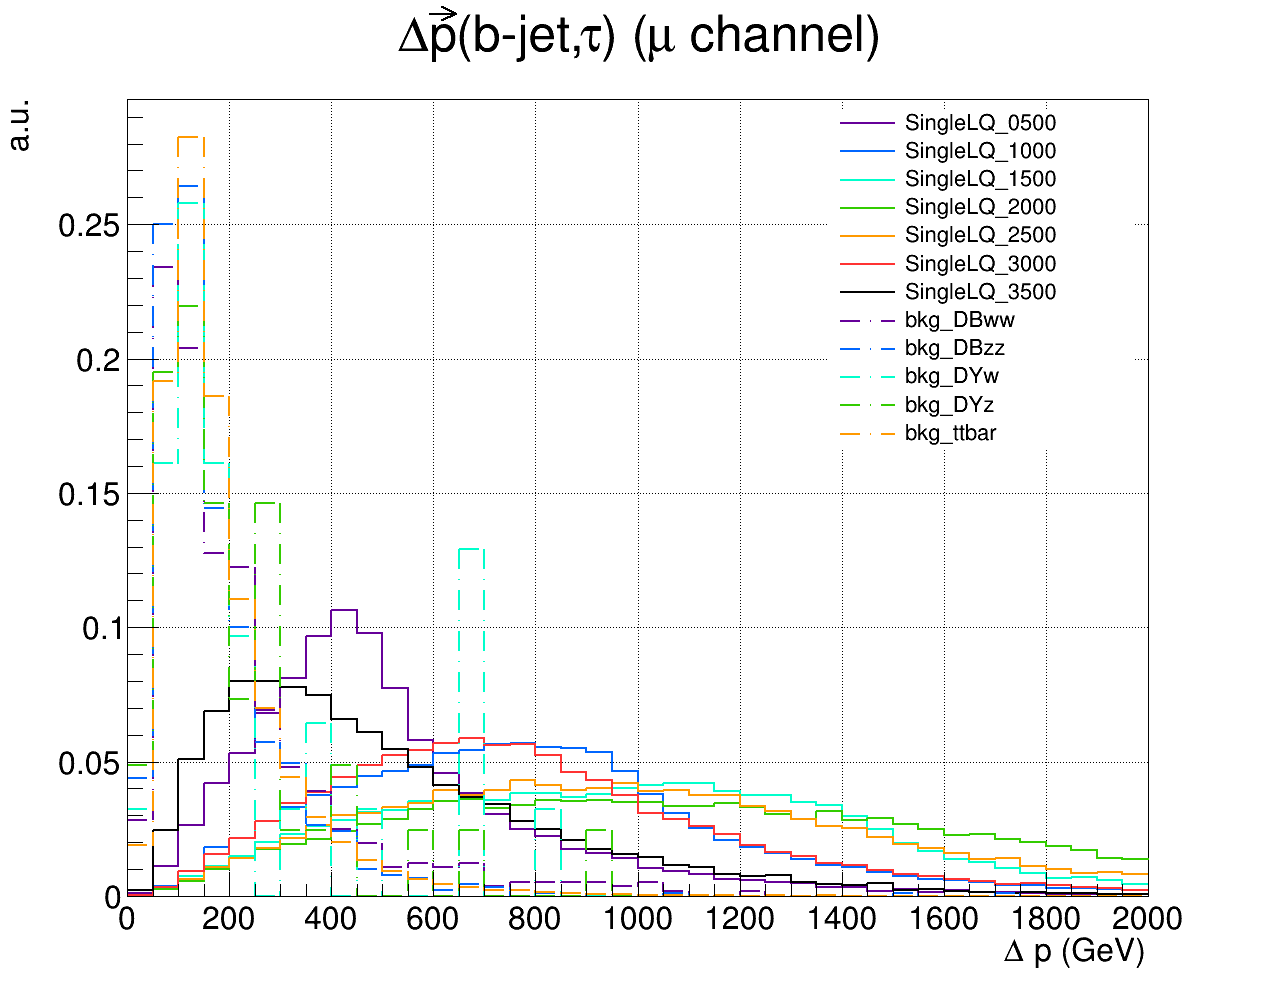

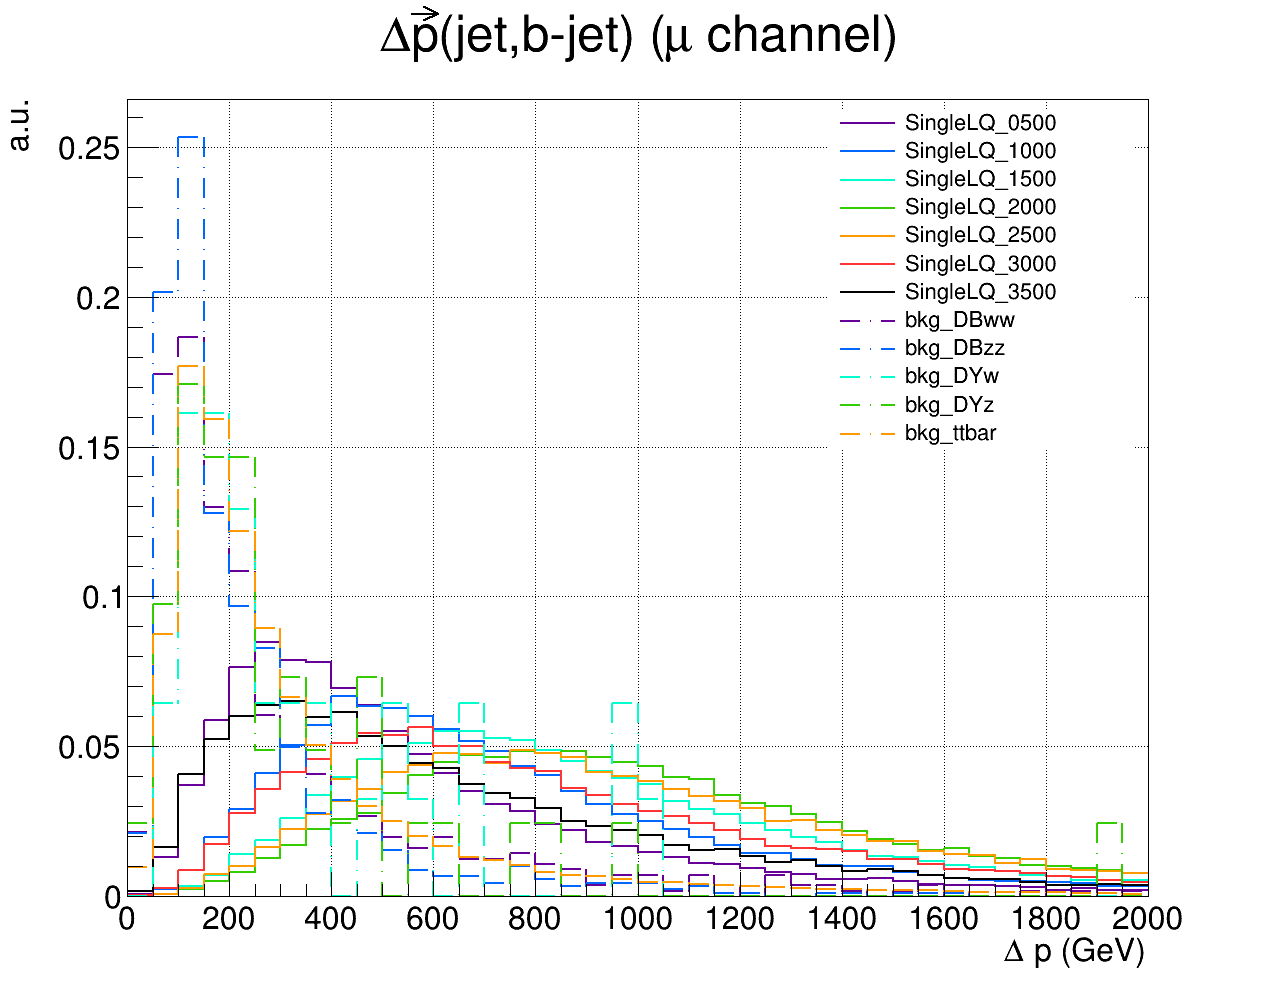

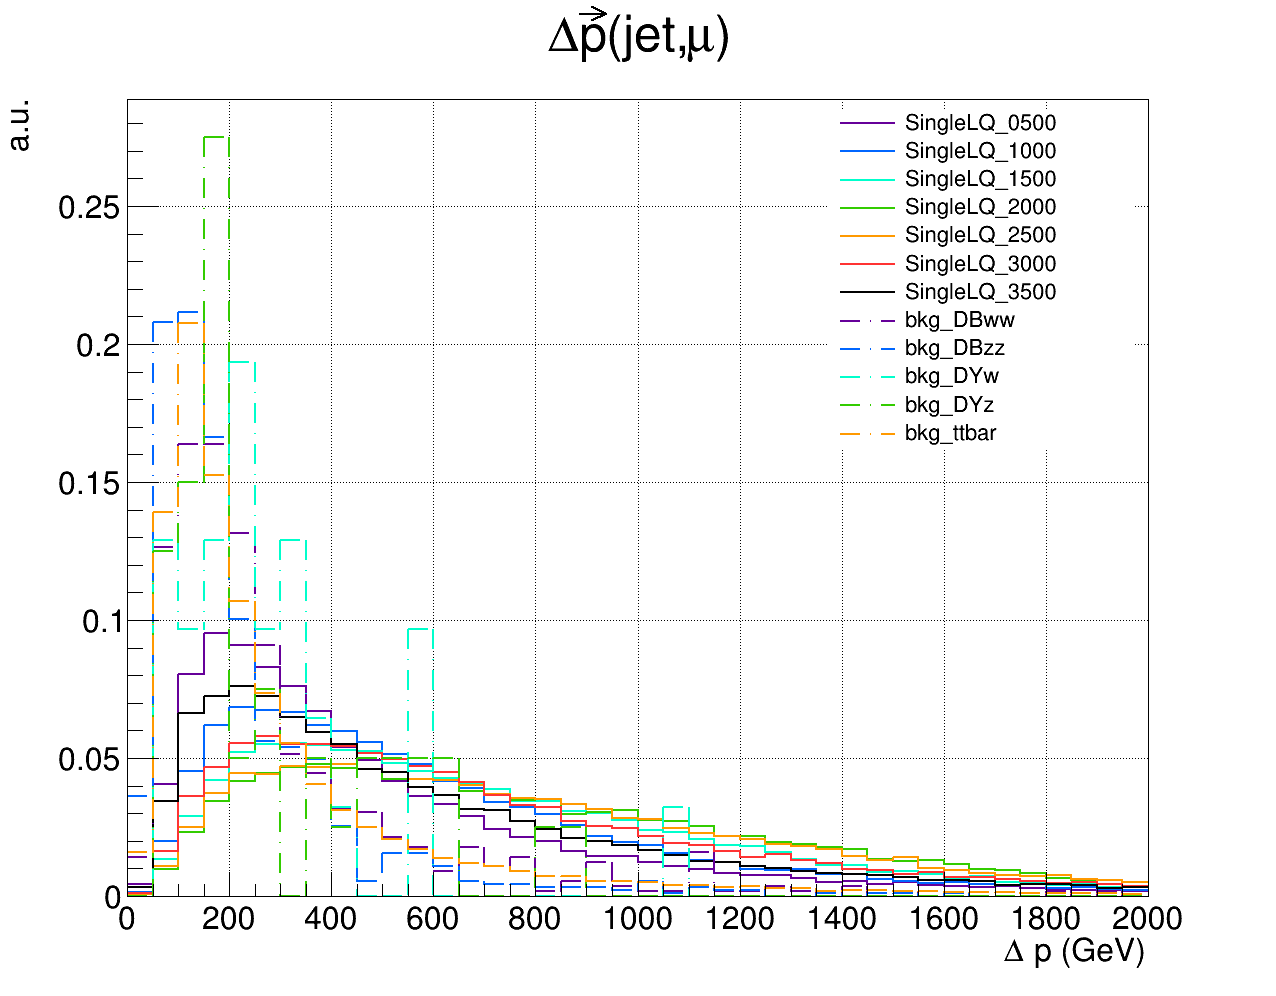

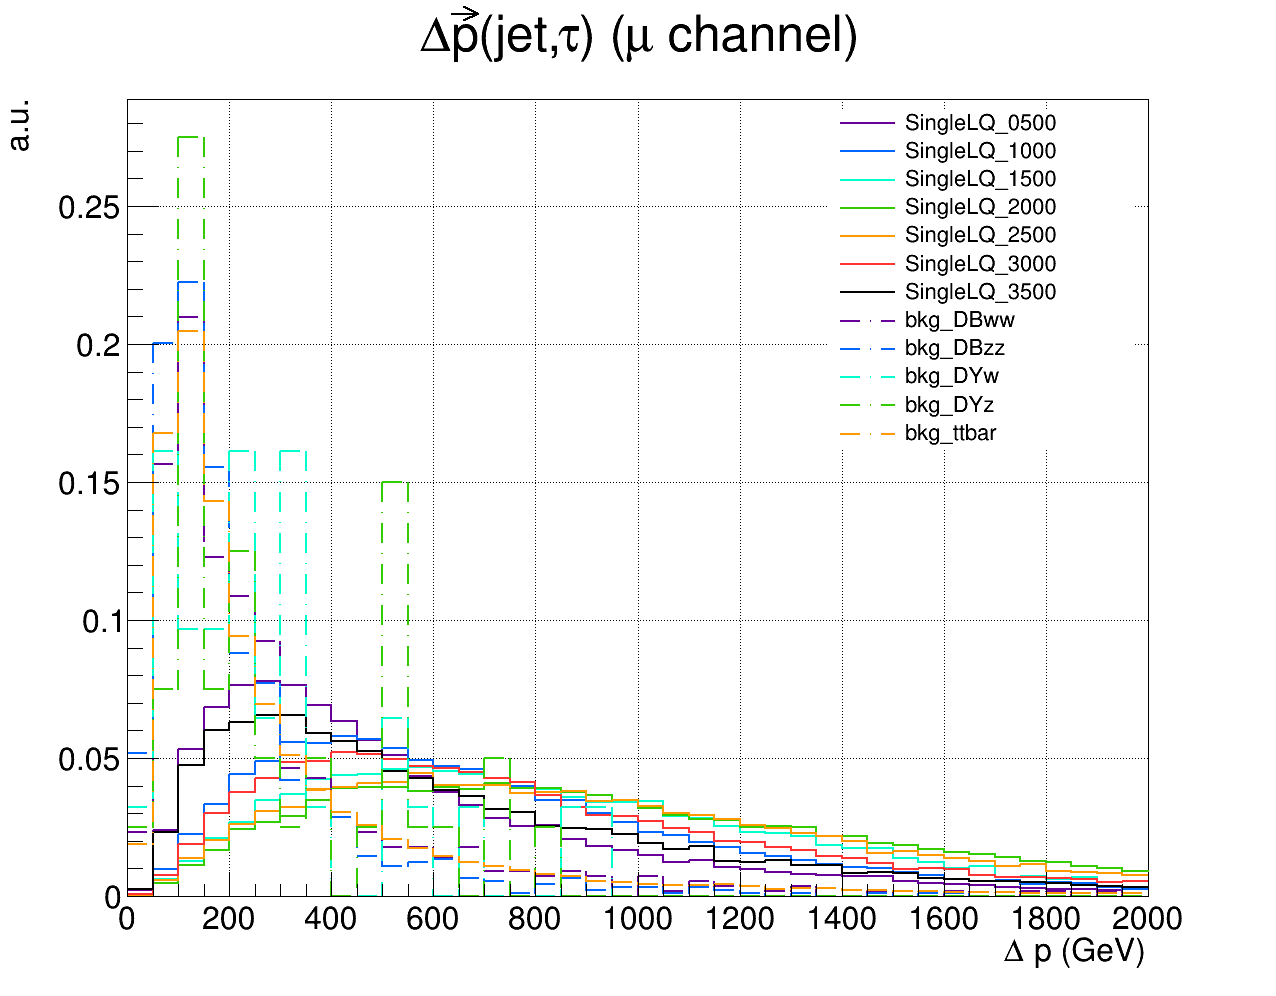

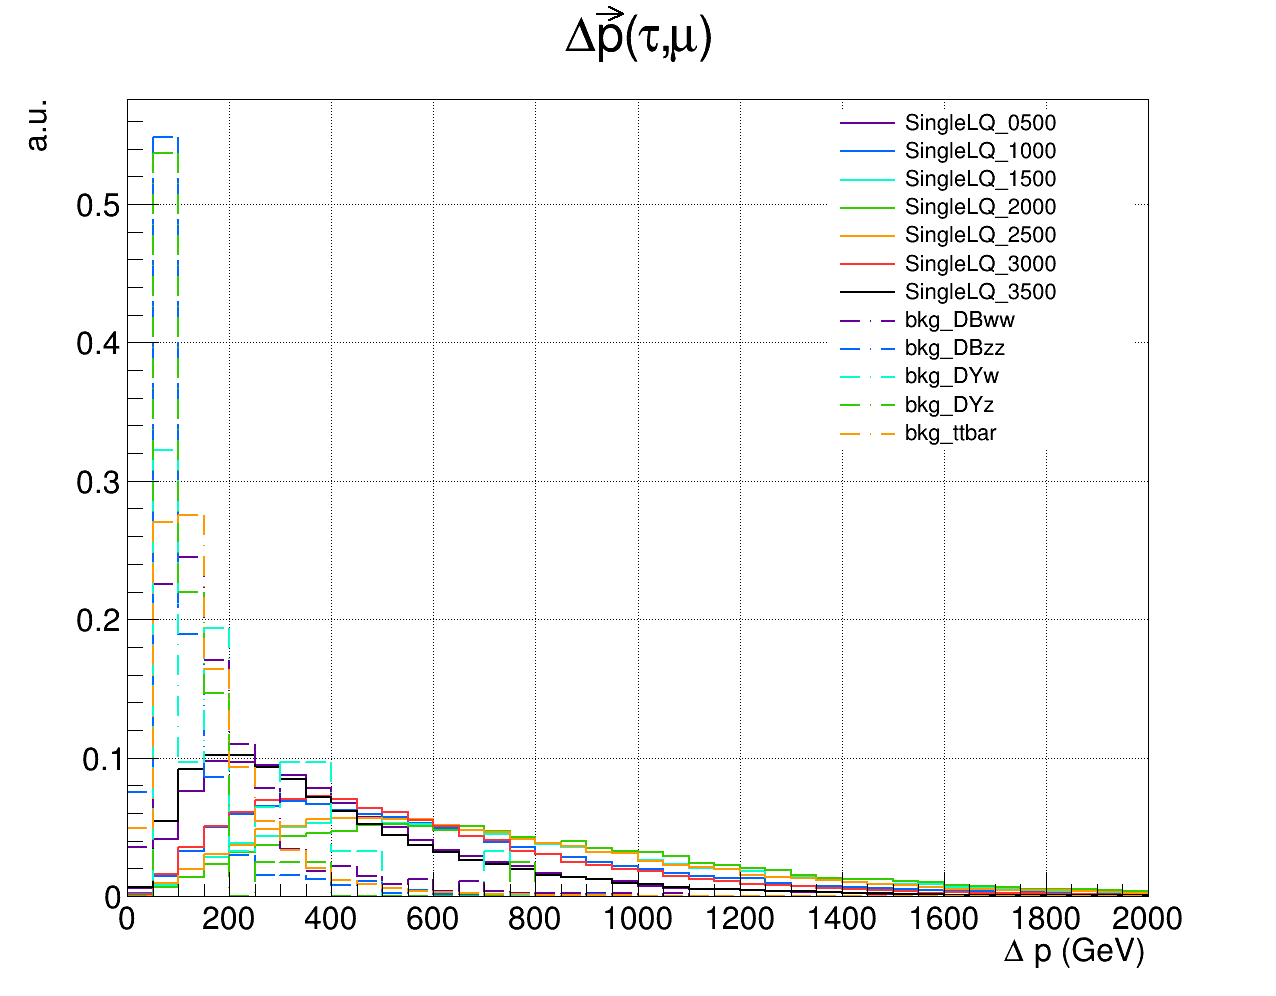

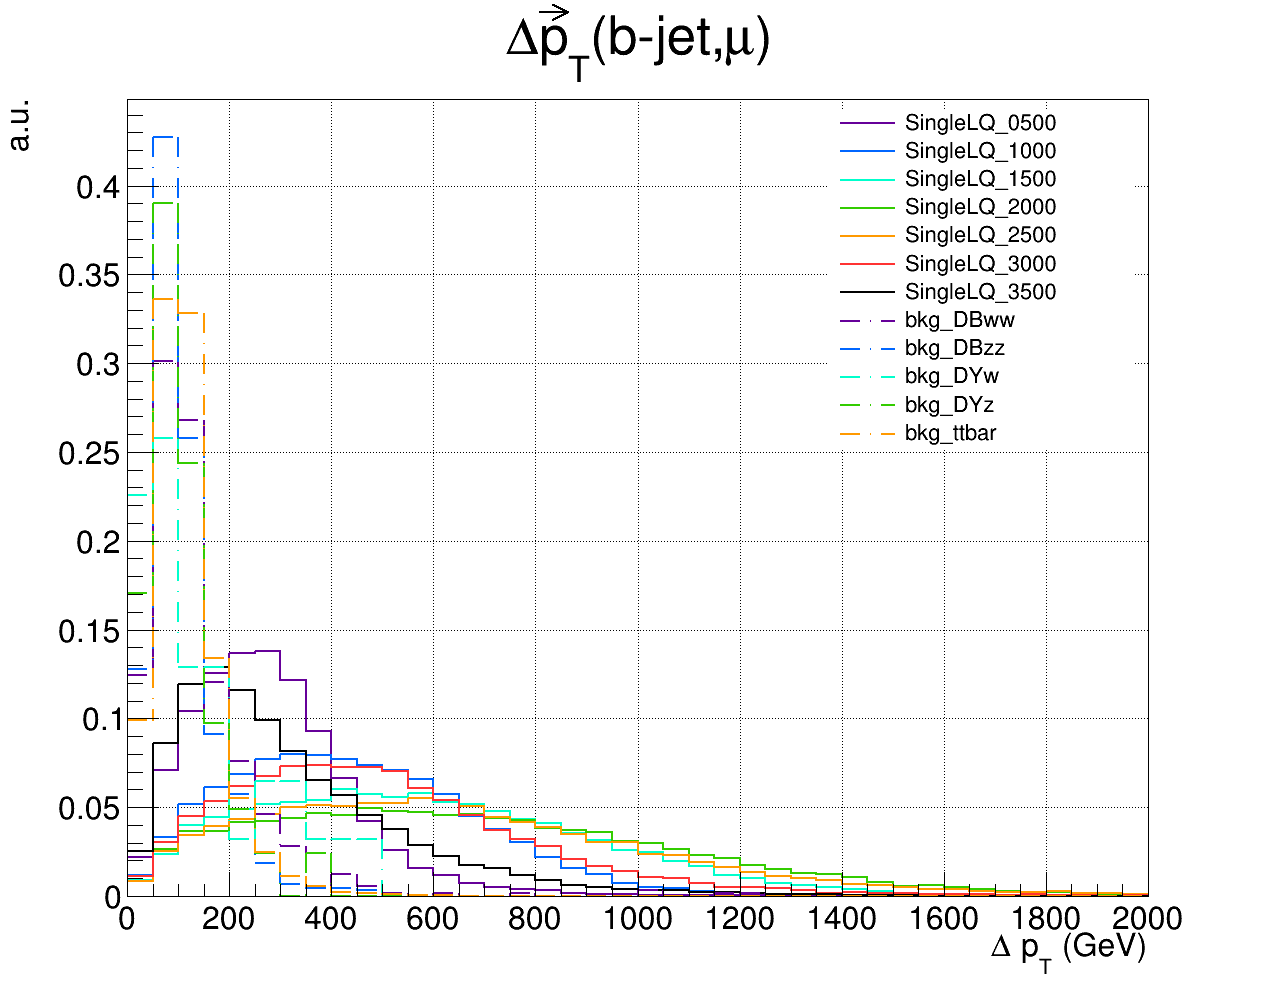

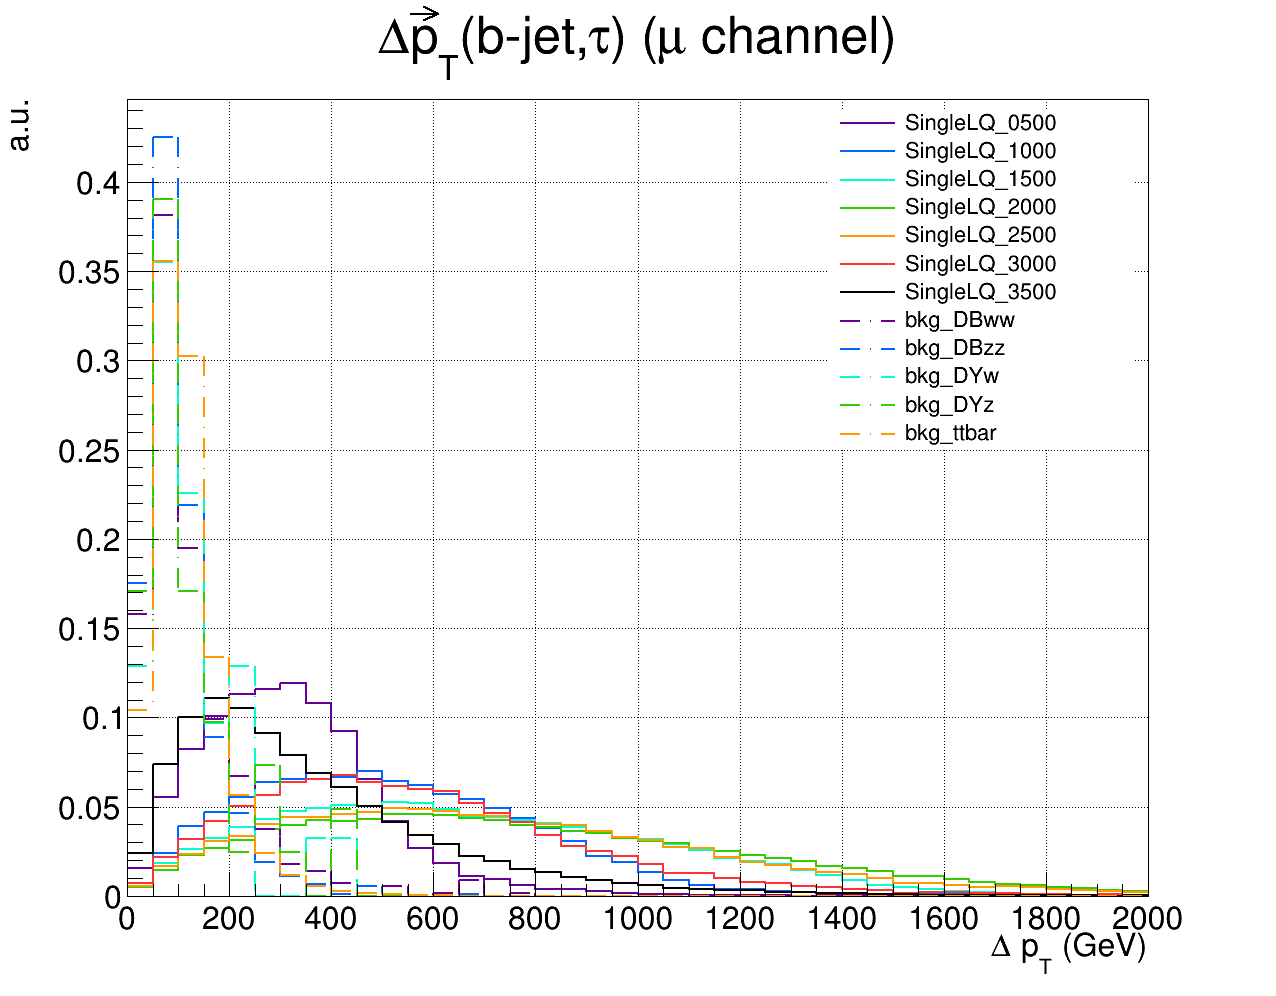

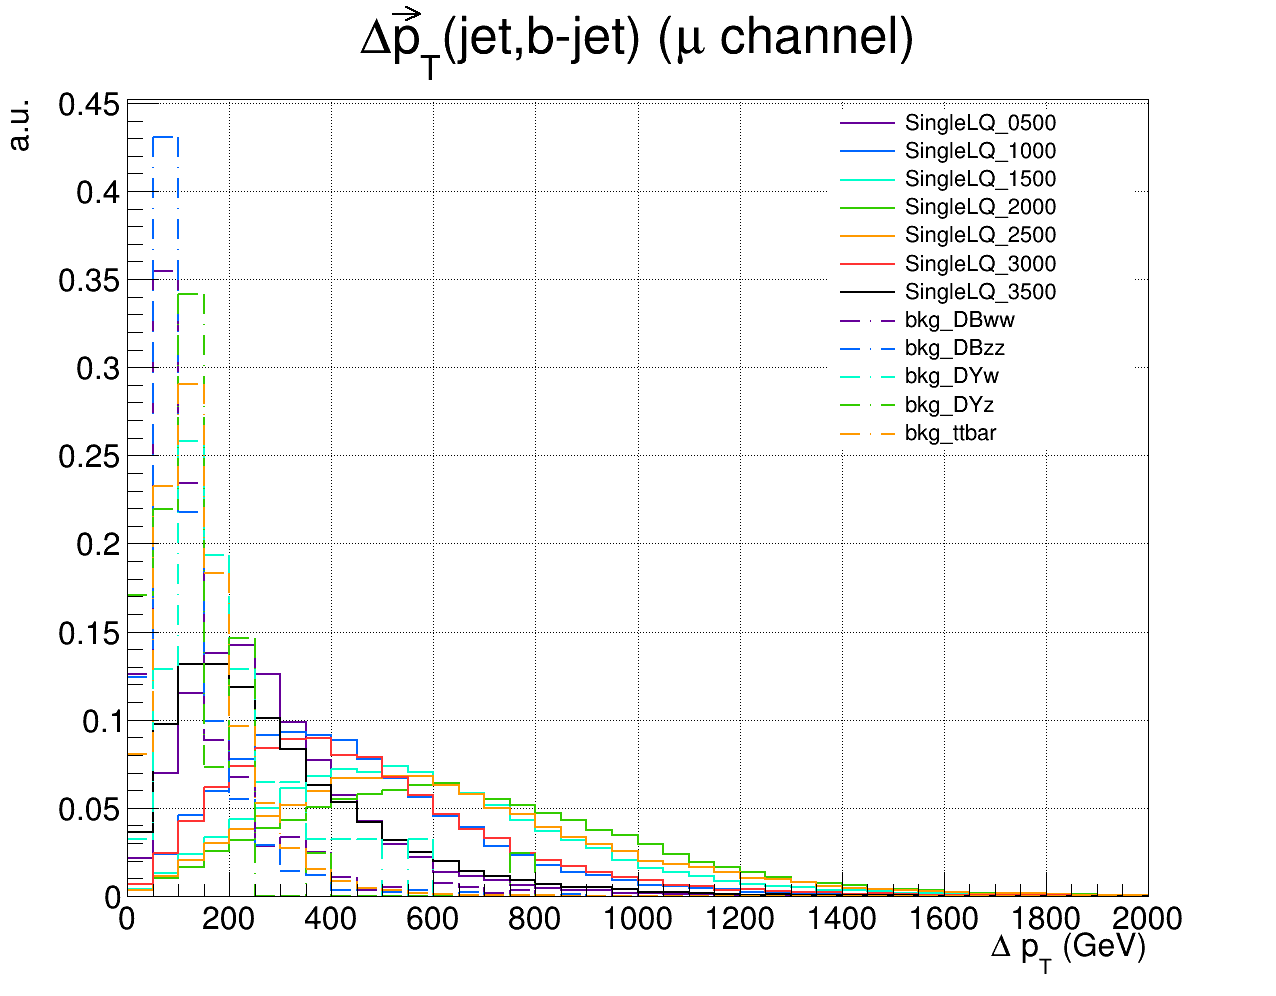

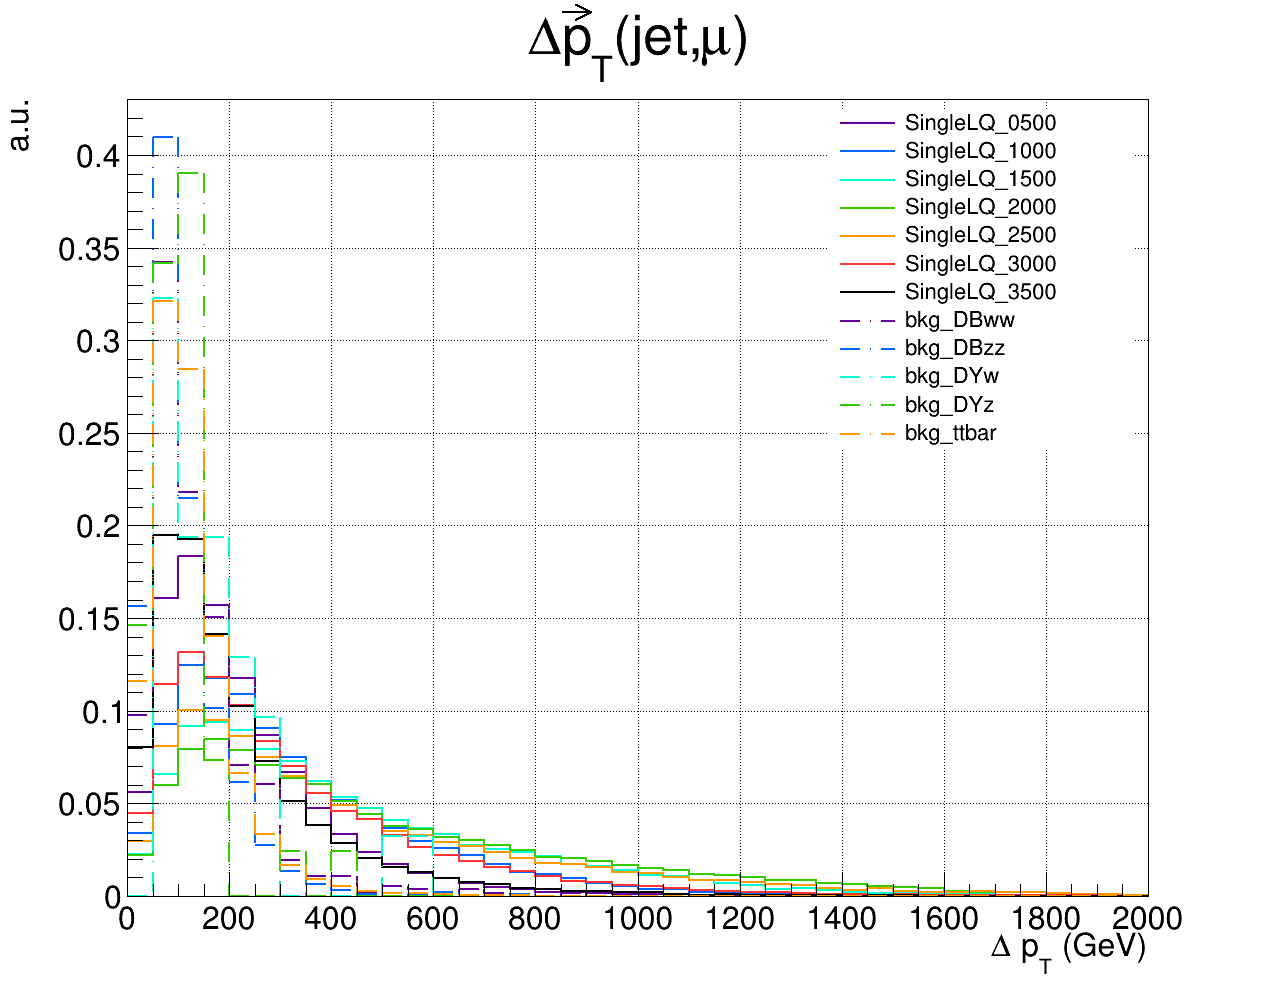

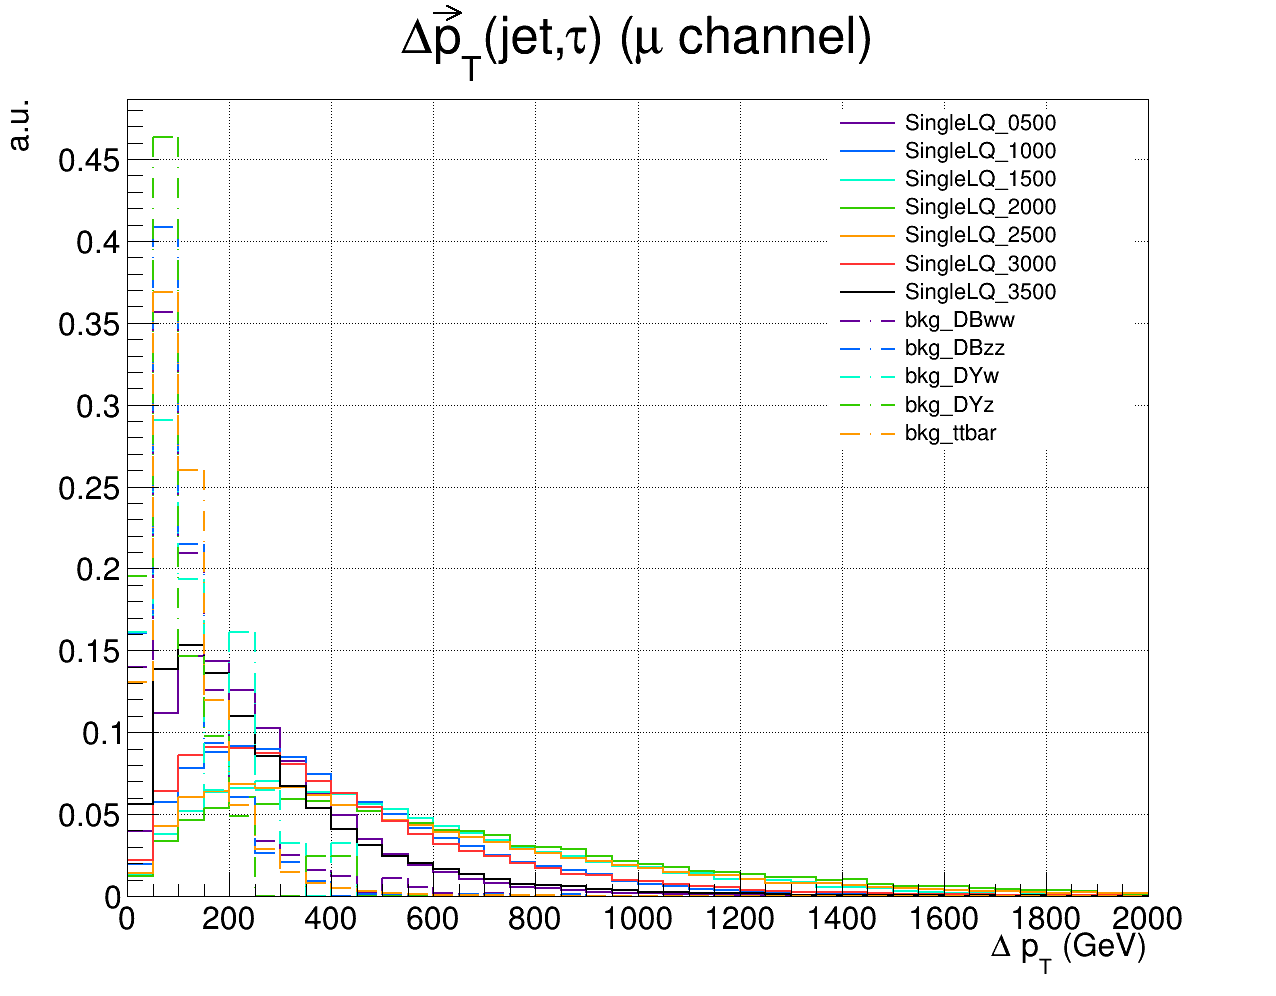

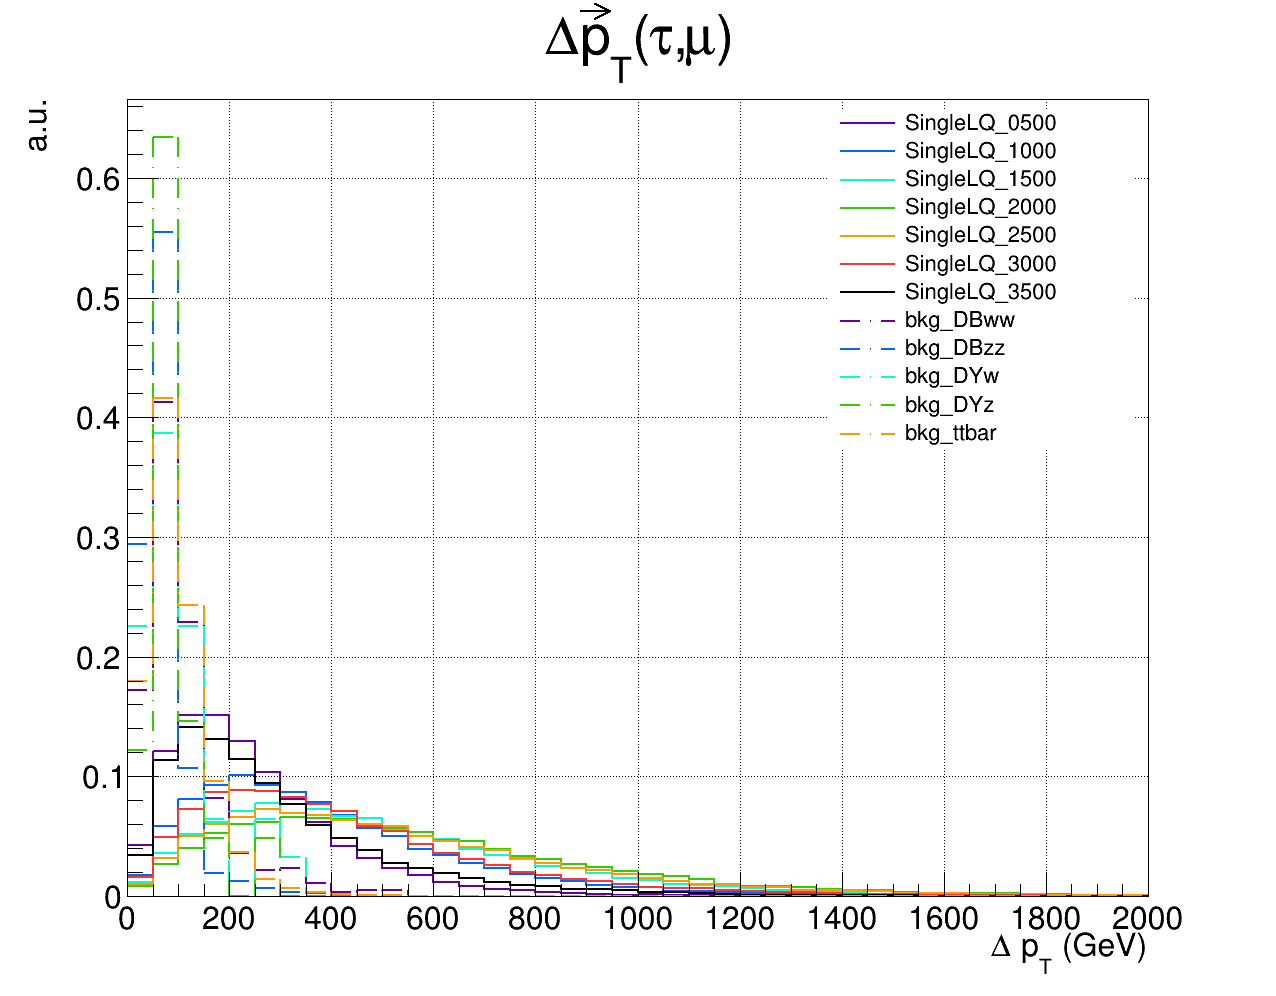

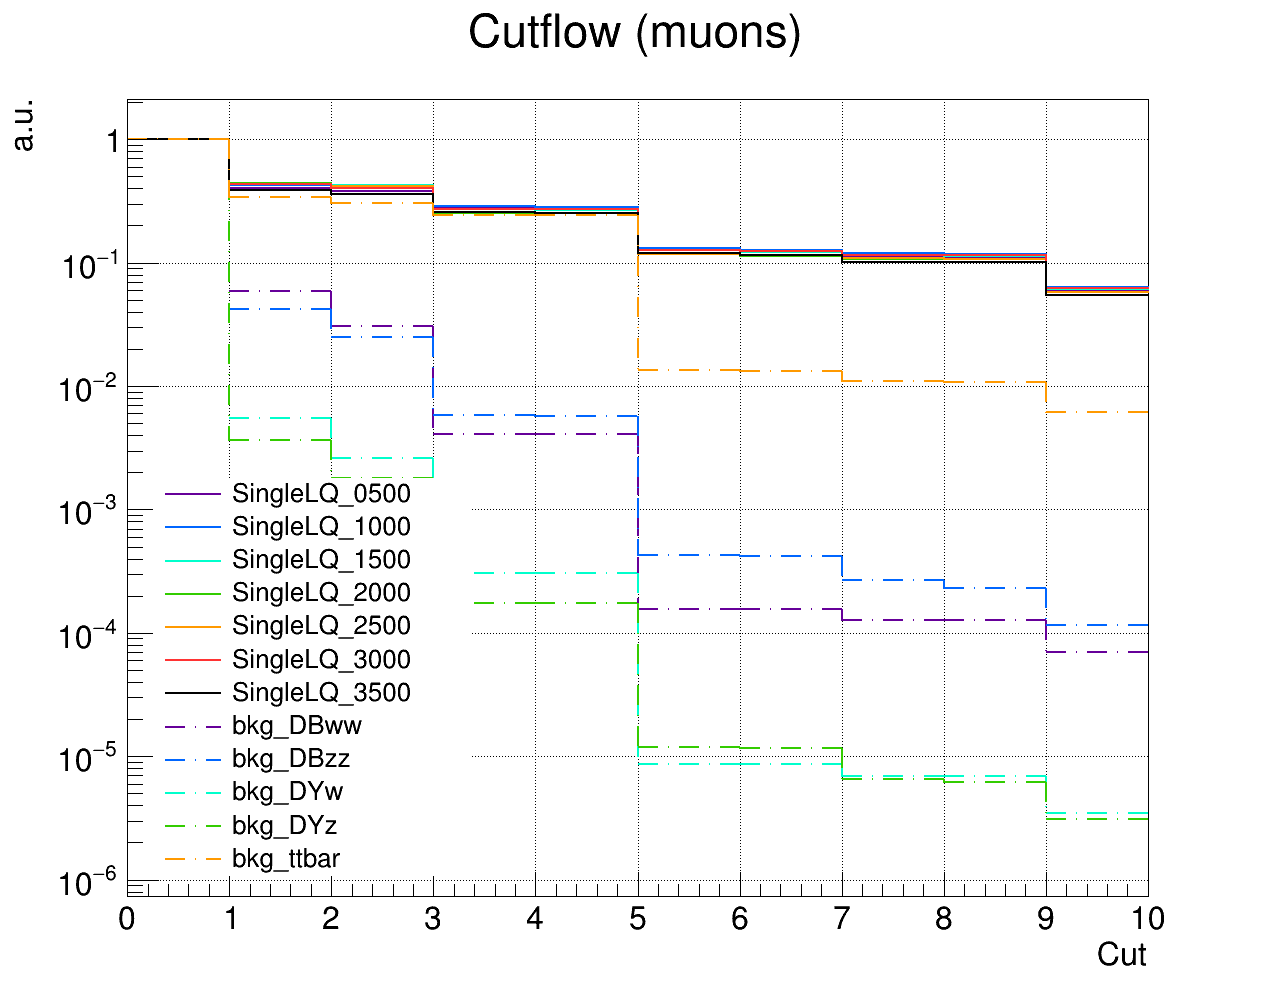

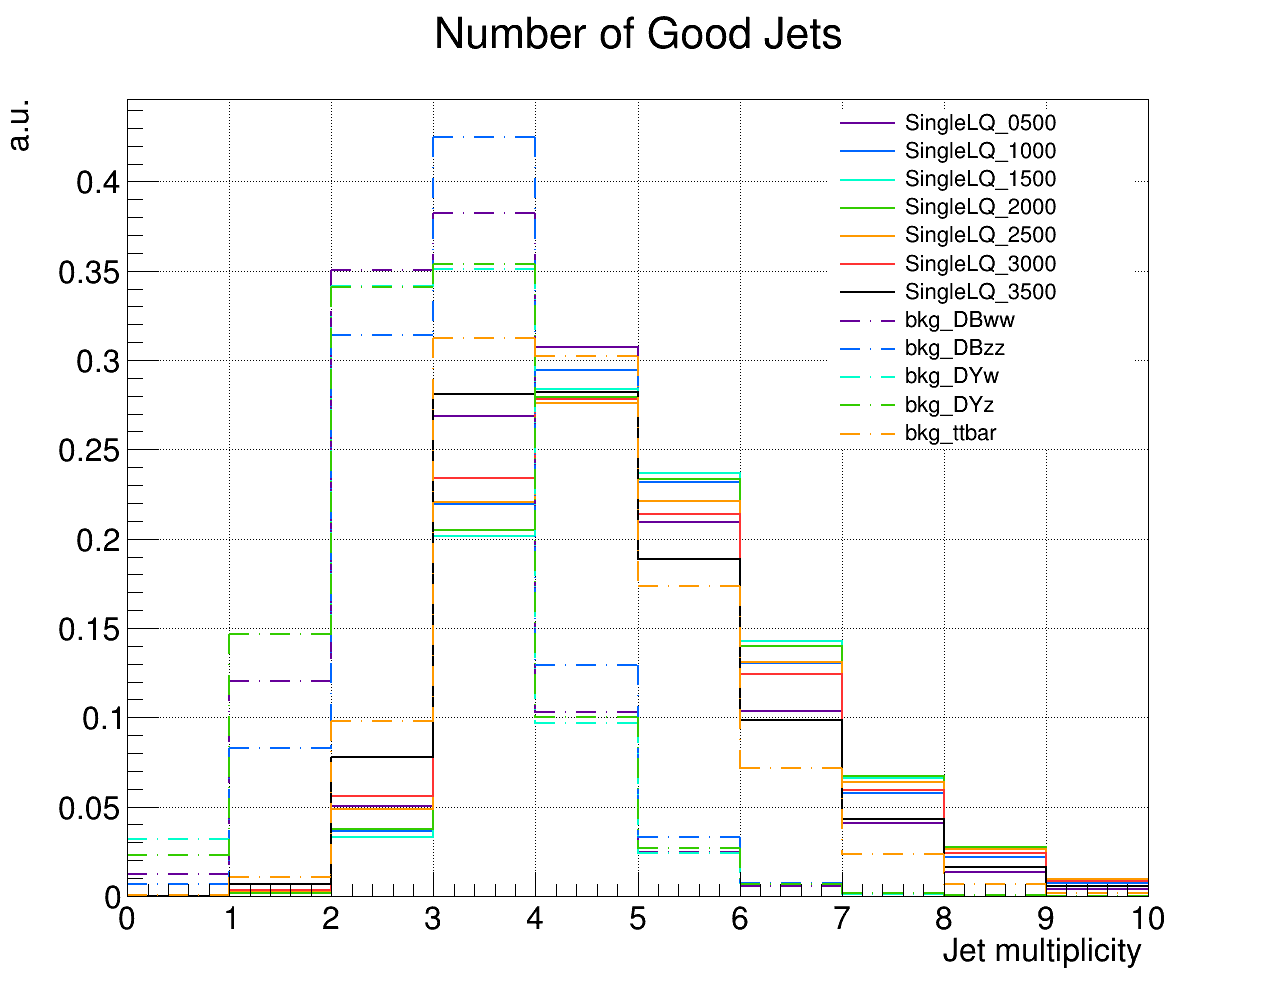

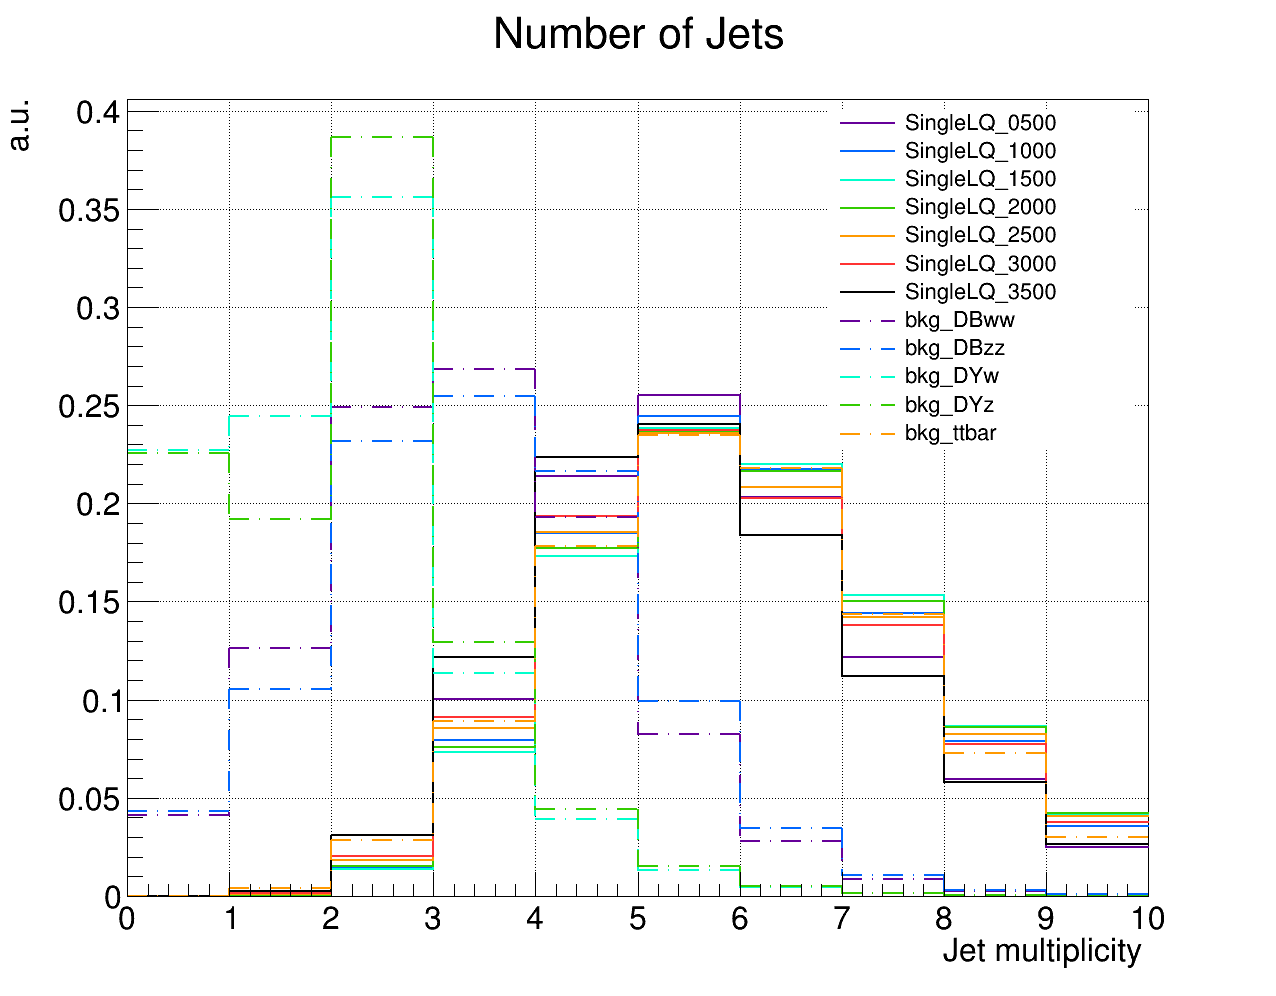

In [11]:
import os
from IPython.display import Image, display

listOfImageNames=[]
current_path = os.getcwd()
current_path+='/Histos/'
files=next(os.walk(current_path))[2]
for file in files:
    if ".png" in file and 'signal' not in file:
        listOfImageNames+=[file]
listOfImageNames.sort()
for imageName in listOfImageNames:
    display(Image(filename='Histos/'+imageName))